In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../retail_store_inventory.csv")
df.head()

Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-01-01     S001      P0003         Toys   West              102   
3  2022-01-01     S001      P0004         Toys  North              469   
4  2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autumn  
1             Sunny                  0               66.16      Autumn  
2             Sunny                  1               31.32      Summer  
3            Cloudy                  1               34.74      Autumn  
4             Sunny                  0               68.95      Summer

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [4]:
# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Convert appropriate columns to category
cat_cols = ["Store ID", "Product ID", "Category", "Region",
            "Weather Condition", "Seasonality"]

df[cat_cols] = df[cat_cols].astype("category")
df["Holiday/Promotion"] = df["Holiday/Promotion"].astype(bool)

#converted discount to categorical since it is only comprised of 5,10,15,20
df["Discount"] = df["Discount"].astype("category")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                73100 non-null  datetime64[ns]
 1   Store ID            73100 non-null  category      
 2   Product ID          73100 non-null  category      
 3   Category            73100 non-null  category      
 4   Region              73100 non-null  category      
 5   Inventory Level     73100 non-null  int64         
 6   Units Sold          73100 non-null  int64         
 7   Units Ordered       73100 non-null  int64         
 8   Demand Forecast     73100 non-null  float64       
 9   Price               73100 non-null  float64       
 10  Discount            73100 non-null  category      
 11  Weather Condition   73100 non-null  category      
 12  Holiday/Promotion   73100 non-null  bool          
 13  Competitor Pricing  73100 non-null  float64   

In [5]:
df.describe()

Date  Inventory Level    Units Sold  \
count                          73100     73100.000000  73100.000000   
mean   2022-12-31 23:59:59.999999744       274.469877    136.464870   
min              2022-01-01 00:00:00        50.000000      0.000000   
25%              2022-07-02 00:00:00       162.000000     49.000000   
50%              2023-01-01 00:00:00       273.000000    107.000000   
75%              2023-07-03 00:00:00       387.000000    203.000000   
max              2024-01-01 00:00:00       500.000000    499.000000   
std                              NaN       129.949514    108.919406   

       Units Ordered  Demand Forecast         Price  Competitor Pricing  
count   73100.000000     73100.000000  73100.000000        73100.000000  
mean      110.004473       141.494720     55.135108           55.146077  
min        20.000000        -9.990000     10.000000            5.030000  
25%        65.000000        53.670000     32.650000           32.680000  
50%       110.000000       113.015000     55.050000           55.010000  
75%       155.000000       208.052500     77.860000           77.820000  
max       200.000000       518.550000    100.000000          104.940000  
std        52.277448       109.254076     26.021945           26.191408

# Numerical Variables (Overall)

These are the numeric cols:  Index(['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Competitor Pricing'],
      dtype='object')


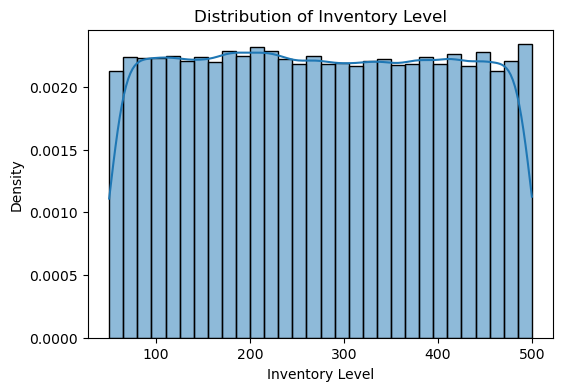

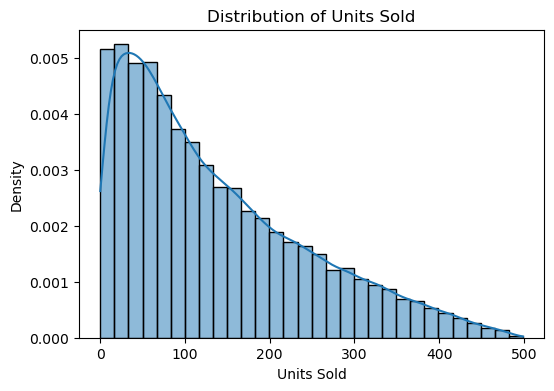

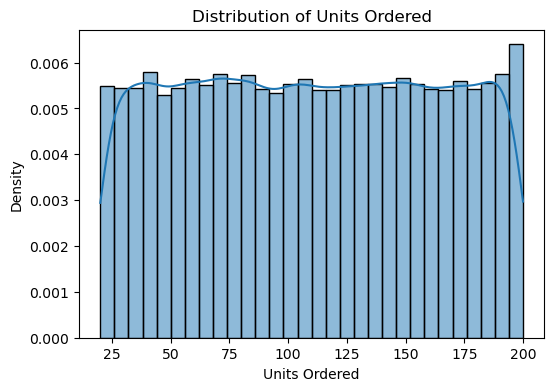

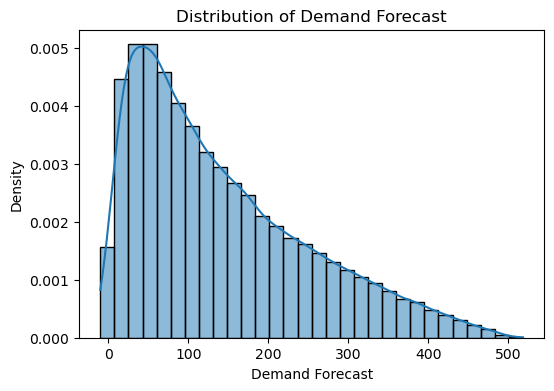

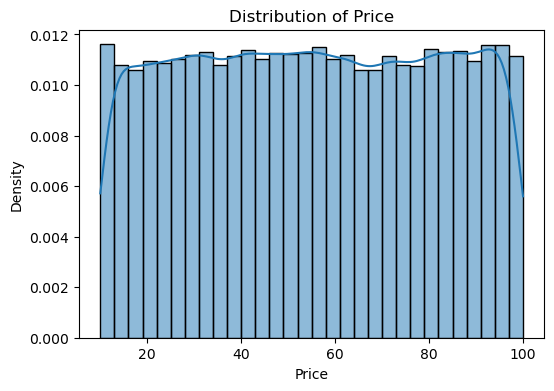

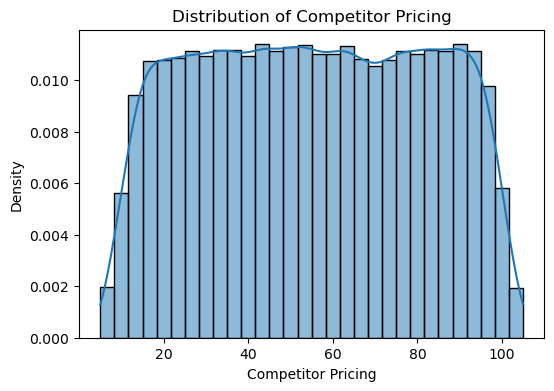

In [6]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
print("These are the numeric cols: ",numeric_cols)
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, stat="density", bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

* Inventory Lvl:
  * Uniform, roughly even spread across stores/products, stocks are evenly managed

* Units Sold:
  * highly skewed, right tail, most values lie btw 0-100
  * most products sell relatively few units, while some products or stores sell very high units
  * bulk of products sell modestly, some very top products exist
  * may benefit from log scale

* Units Ordered:
  * orders placed across products/stores are roughly even.
  * Combined with units sold: may indicate restocking strategy is uniform, even though sales are skewed.
  * possible inefficiency — some products get stocked a lot but sell little, some sell a lot but stock is uniform.

* Demand Forecast:
  * highly skewed, right tail, most between 0–100
* Price:
  * Mostly Uniform, bulk around ~20 and ~90  
  * prices are evenly spread across range, no dominant price point.
  * products are priced across full spectrum; maybe product variety is high.

* Competitor Pricing:
  * mostly uniform, bulk btw ~20 and ~90
  * extreme competitor prices are unusual

                    Inventory Level  Units Sold  Units Ordered  \
Inventory Level            1.000000    0.589995       0.001060   
Units Sold                 0.589995    1.000000      -0.000930   
Units Ordered              0.001060   -0.000930       1.000000   
Demand Forecast            0.588561    0.996853      -0.001102   
Price                      0.009140    0.001082       0.004212   
Competitor Pricing         0.009365    0.001259       0.004596   

                    Demand Forecast     Price  Competitor Pricing  
Inventory Level            0.588561  0.009140            0.009365  
Units Sold                 0.996853  0.001082            0.001259  
Units Ordered             -0.001102  0.004212            0.004596  
Demand Forecast            1.000000  0.000675            0.000844  
Price                      0.000675  1.000000            0.993900  
Competitor Pricing         0.000844  0.993900            1.000000  


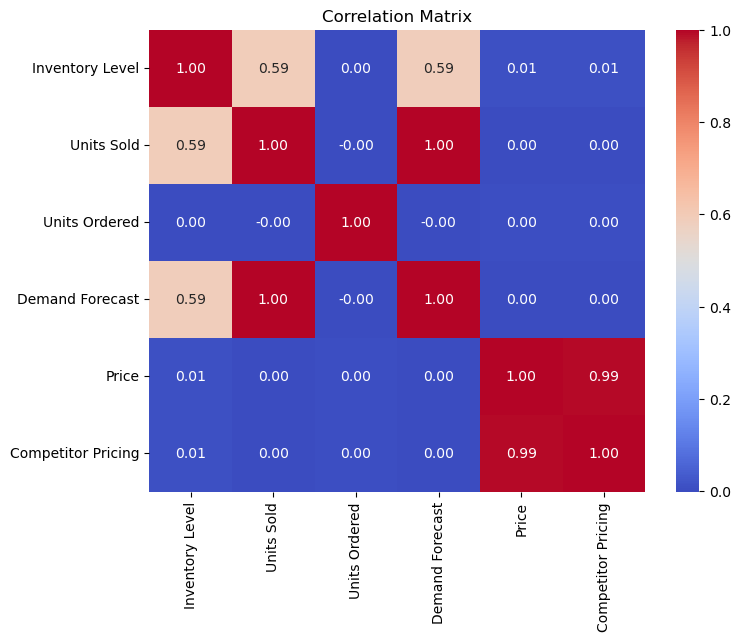

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
# numeric_cols = df.select_dtypes(include=['int64','float64']).columns

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Print correlation matrix
print(corr_matrix)

# Optional: visualize as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


* Demand Forecast identical to actual sales → planning is accurate

* Inventory moderately aligns with sales → higher-stock stores sell more, but there’s room to optimize for under-stocked stores.

* Almost perfect corr btw price and competitor pricing but weak corr with sales -> lowering/raising prices alone doesn't drive sales

* Orders are uncorrelated-> maybe rule-based or fixed across stores

# How well does demand Forecast predict units sold?

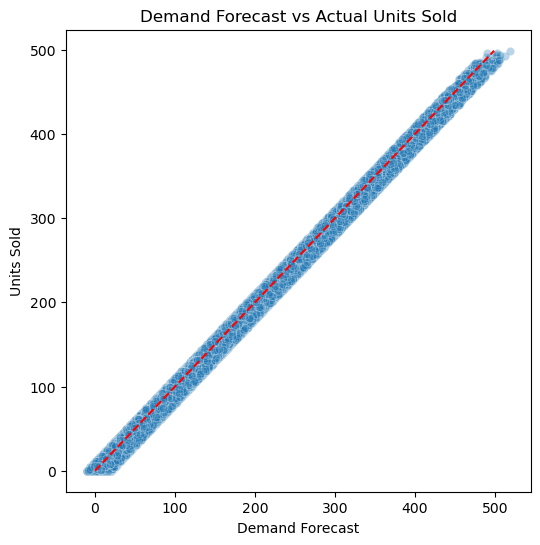

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x='Demand Forecast', y='Units Sold', data=df, alpha=0.3)
plt.plot([0, df['Units Sold'].max()], [0, df['Units Sold'].max()], 'r--')  # 45-degree reference
plt.xlabel("Demand Forecast")
plt.ylabel("Units Sold")
plt.title("Demand Forecast vs Actual Units Sold")
plt.show()


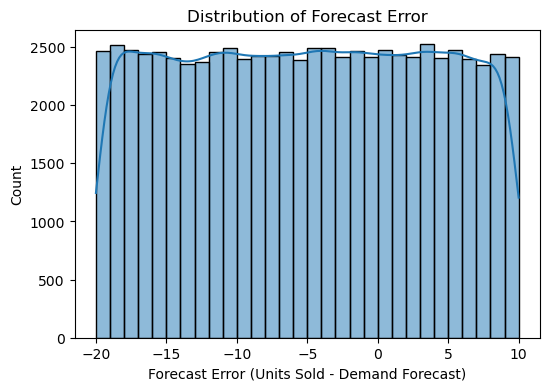

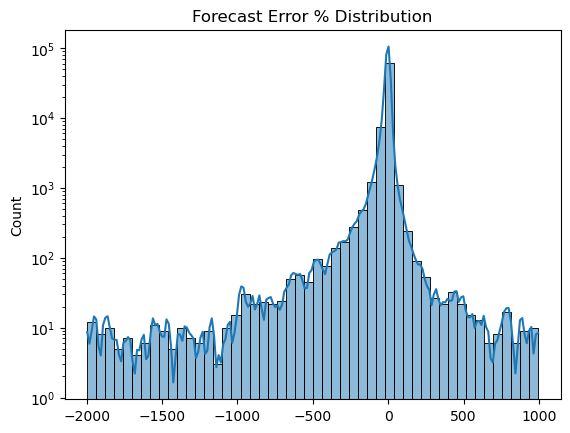

In [9]:
forecast_error = df['Units Sold'] - df['Demand Forecast']

plt.figure(figsize=(6,4))
sns.histplot(forecast_error, bins=30, kde=True)
plt.xlabel("Forecast Error (Units Sold - Demand Forecast)")
plt.title("Distribution of Forecast Error")
plt.show()

forecast_error_pct = forecast_error / df['Units Sold'] * 100

sns.histplot(forecast_error_pct, bins=50, kde=True)
plt.title("Forecast Error % Distribution")
plt.yscale('log')
plt.show()


* Forecast Error (Units Sold - Forecast)
  * Negative center (-5) → on average, your forecast is slightly higher than actual sales → overforecasting by ~5 units
  * More negative values than positive → systematically overestimating demand
  * Spread of -20 → 10 → some large over-predictions, fewer under-predictions
  * Forecast Model is biased high, maybe overstocking by small amounts on avg

* Units Sold vs Demand Forecast Scatter
  * Consistent systematic overprediction, may want to adjust forecast downward slightly

* Forecast Error %
  * Many products/stores have forecast error ≈ 0 → forecast matches actual sales
  * Forecast model is accurate for a large number of cases (even if small)
  * The model tends to produce perfect predictions for low-sales items
  * Most overprediction errors are moderate, not extreme

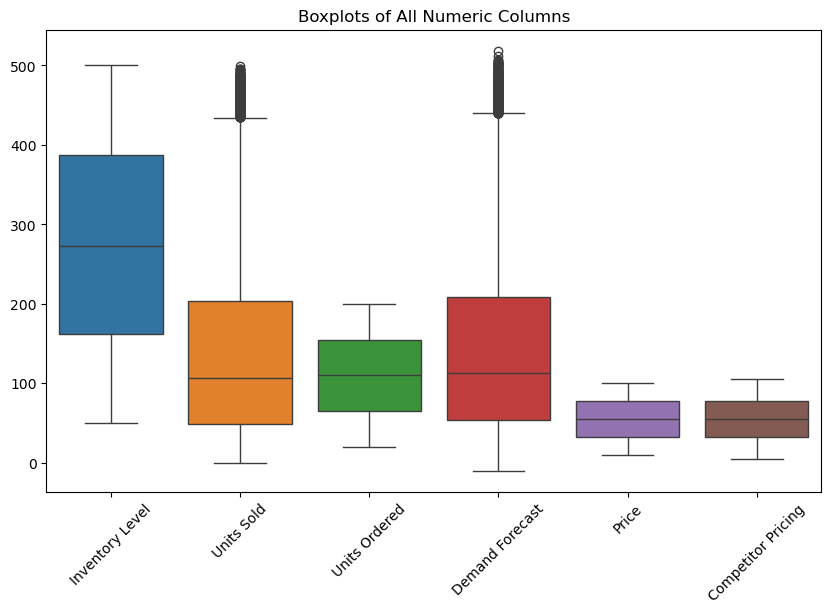

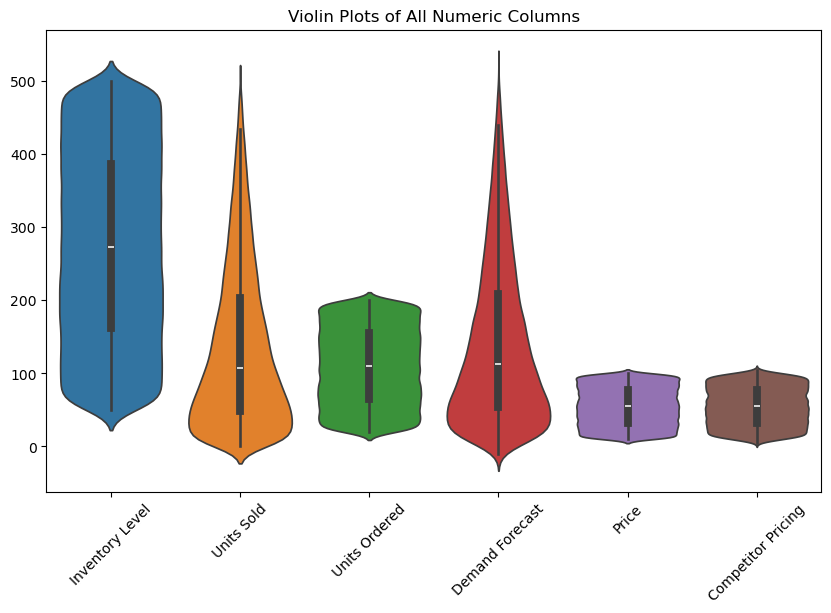

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplots of All Numeric Columns')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(data=df[numeric_cols])
plt.title('Violin Plots of All Numeric Columns')
plt.xticks(rotation=45)
plt.show()


# Categorical Data

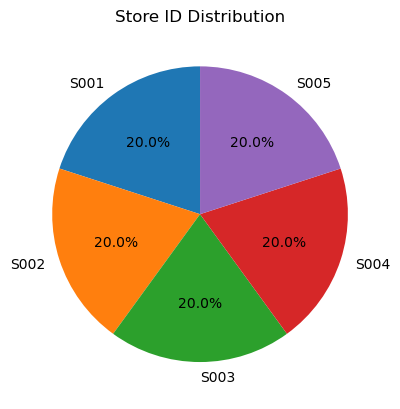

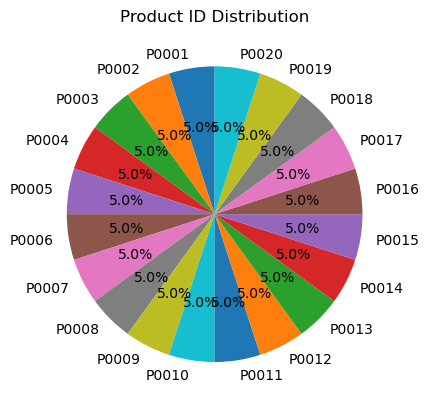

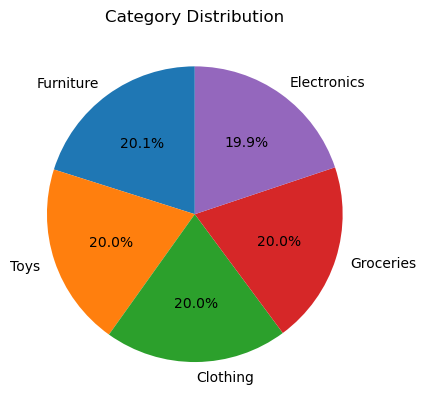

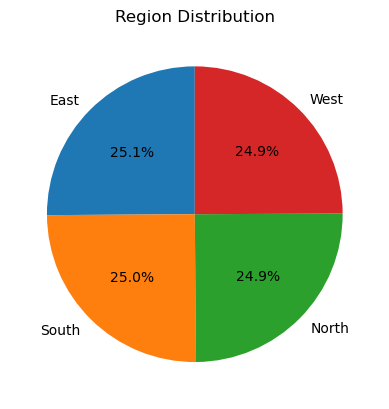

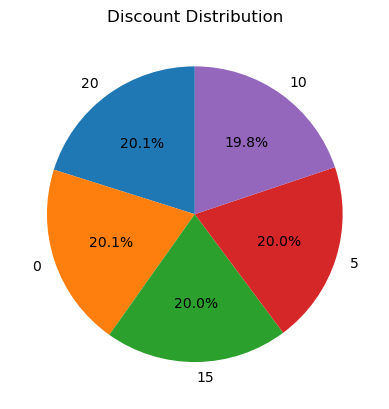

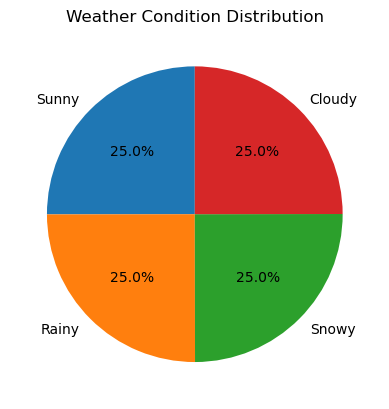

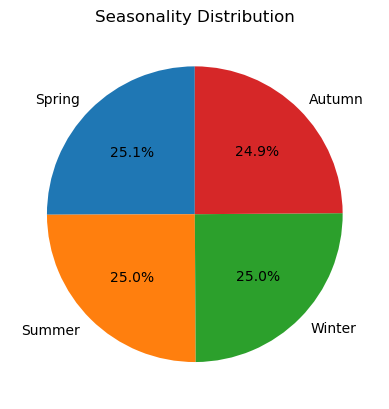

In [11]:
for col in df.select_dtypes("category").columns:
   df[col].value_counts().plot.pie(
    autopct='%1.1f%%',   # show percentages
    startangle=90,       # rotate start angle
    shadow=False,        # no shadow
    ylabel=''            # remove y-label
    )
   plt.title(f"{col} Distribution")
   plt.show()


All classes are balanced. simple crosstab of categorical vars vs categorical vars yielded no significant result probably cuz all classes are balanced

Store ID       S001    S002    S003    S004    S005
Category                                           
Clothing     387595  397144  397273  413914  403240
Electronics  388583  394499  400426  386379  390545
Furniture    400221  406035  409076  394065  415620
Groceries    399022  397720  403261  405543  394936
Toys         400329  392317  412660  379344  405835


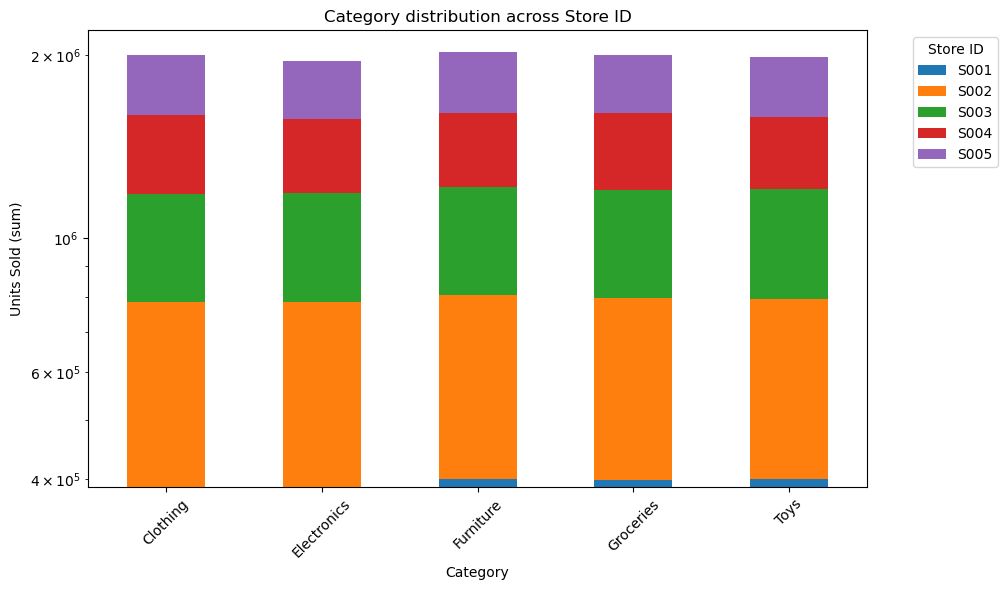

Product ID    P0001   P0002   P0003   P0004   P0005   P0006   P0007   P0008  \
Category                                                                      
Clothing      99221   97469   94037   96489   97826  101595  103373  104517   
Electronics   93595   95072   92656   98568   98310   98144  102439  101782   
Furniture     98454   98991  100272  104246  104085   93062   98498   95337   
Groceries    106199  100626  104530   96752  103063  106967   99147   92340   
Toys         100592   95669  101784   99446  100364   97363   95864   94587   

Product ID    P0009   P0010   P0011   P0012   P0013   P0014   P0015   P0016  \
Category                                                                      
Clothing     107734  100085  102428   98359   91623  102974  100698   96447   
Electronics   90847   98374  102410   95442   96082   97008  100421  101019   
Furniture    105384  100998  101253  102589  103529   99983  112139  102722   
Groceries     98949   97051   93575   95570  106742

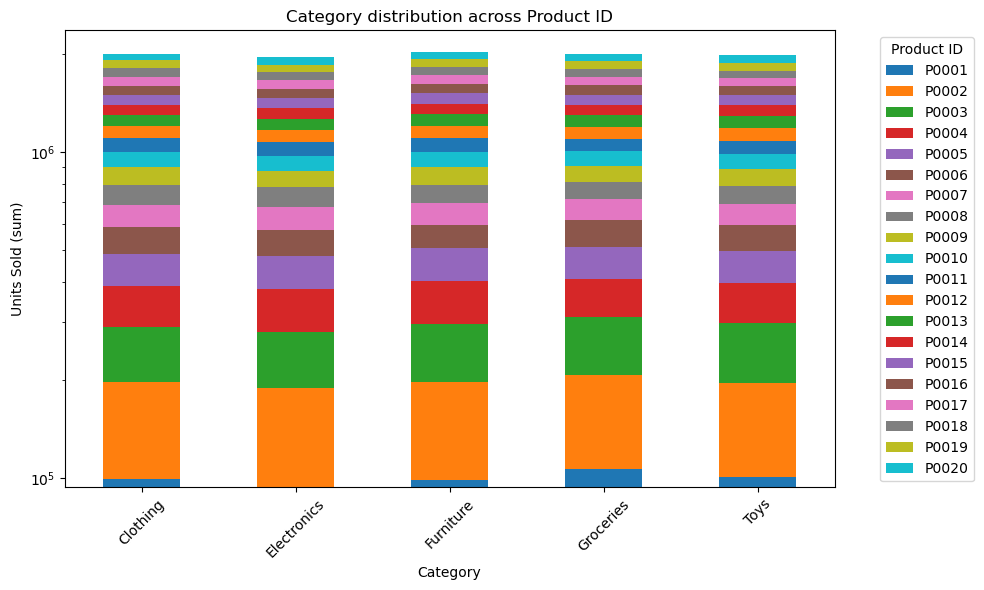

Region         East   North   South    West
Category                                   
Clothing     507229  471608  510882  509447
Electronics  500086  497362  481488  481496
Furniture    500612  514960  513403  496042
Groceries    513781  489323  509235  488143
Toys         489557  511713  492791  496424


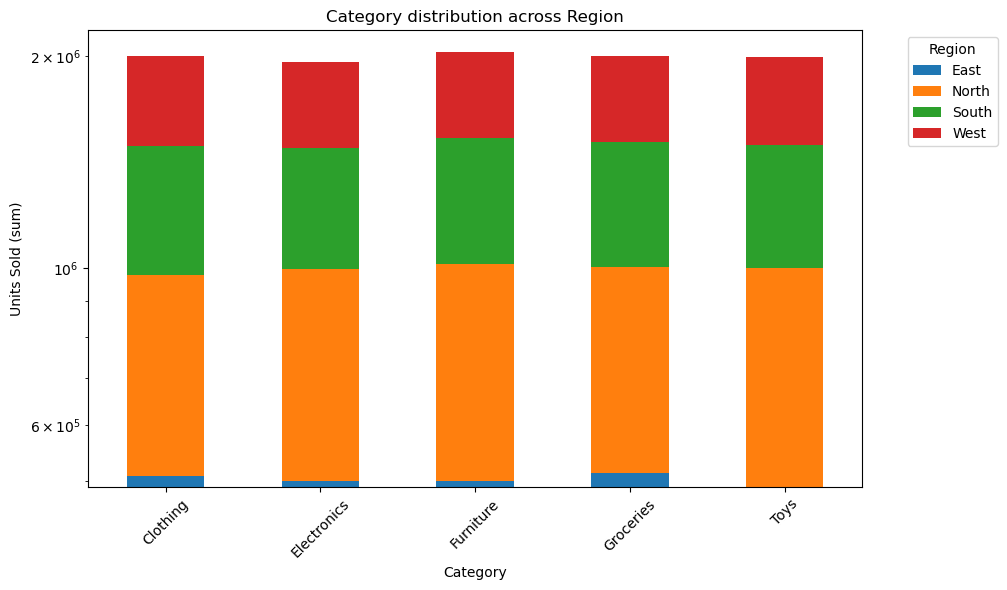

Discount          0       5      10      15      20
Category                                           
Clothing     395941  407282  392874  403613  399456
Electronics  380707  401174  370960  400618  406973
Furniture    398599  392855  421352  405689  406522
Groceries    409594  400260  395523  393896  401209
Toys         404713  391084  403548  394631  396509


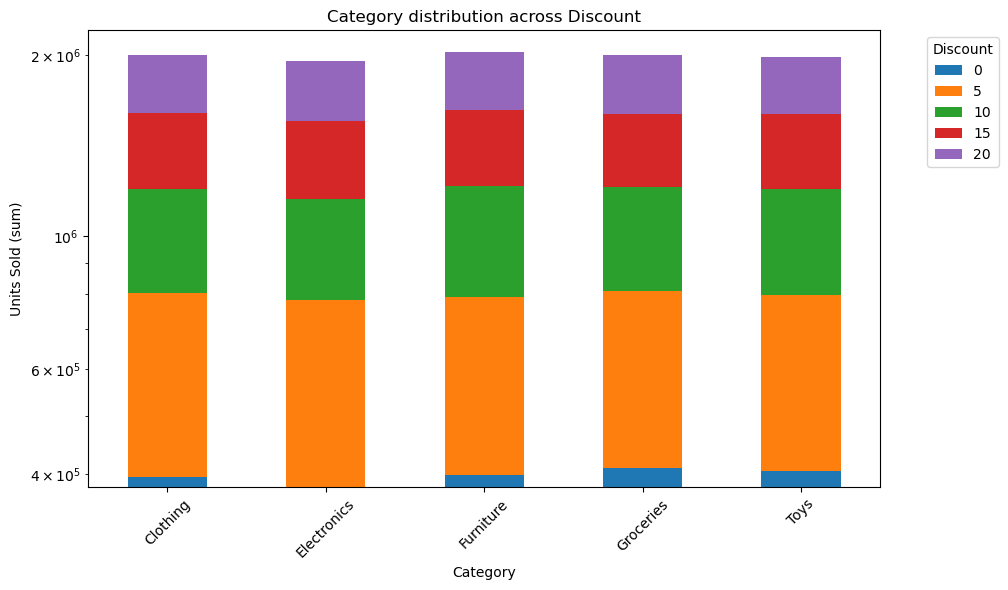

Weather Condition  Cloudy   Rainy   Snowy   Sunny
Category                                         
Clothing           494740  497547  498588  508291
Electronics        495427  478424  478378  508203
Furniture          505870  517316  490518  511313
Groceries          499164  497278  504965  499075
Toys               502006  479890  510927  497662


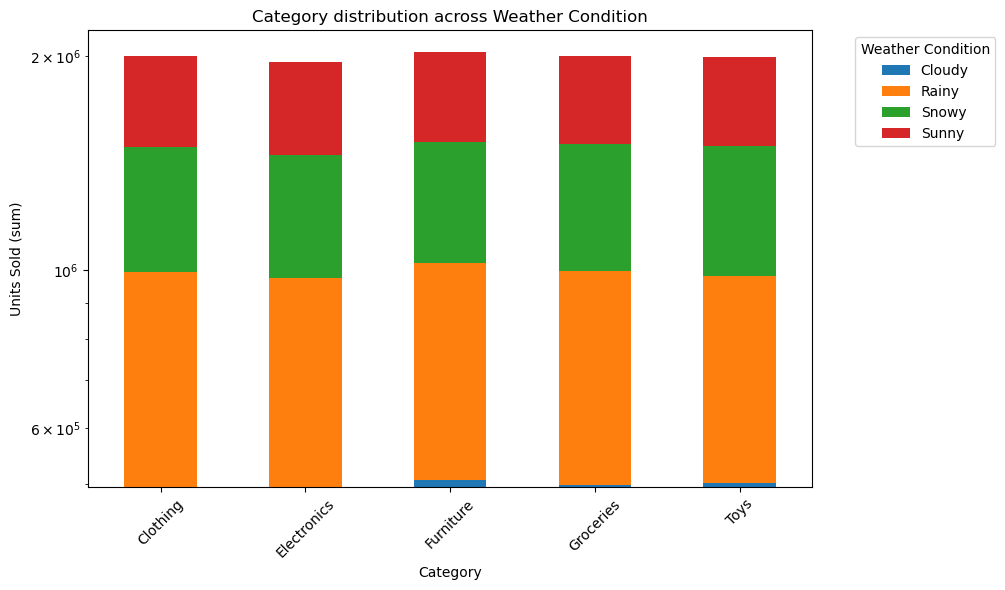

Holiday/Promotion    False    True 
Category                           
Clothing           1007858   991308
Electronics         984078   976354
Furniture          1005719  1019298
Groceries          1001620   998862
Toys               1016888   973597


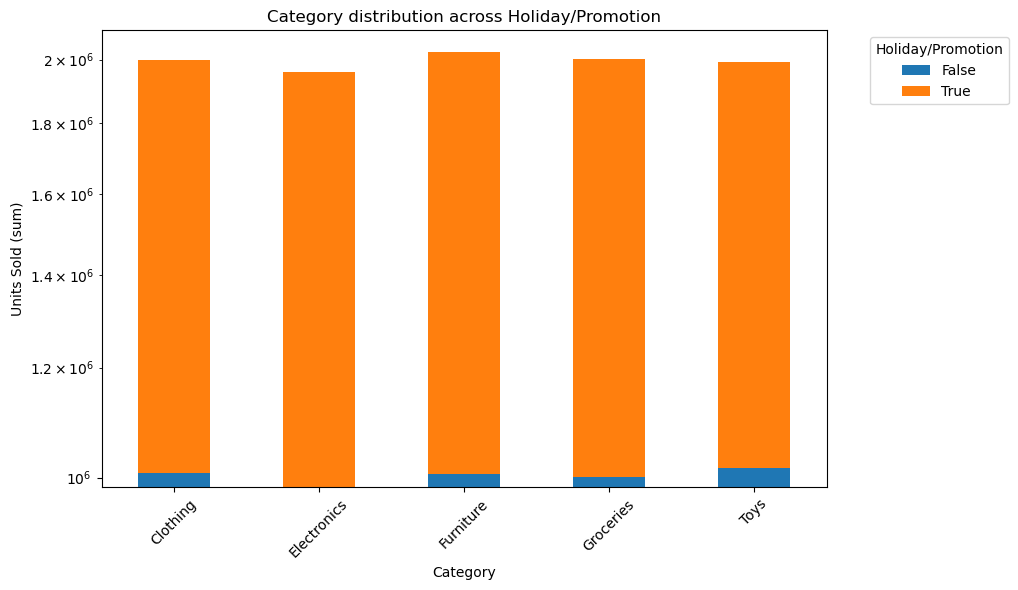

Seasonality  Autumn  Spring  Summer  Winter
Category                                   
Clothing     498364  500879  494951  504972
Electronics  492630  491590  490770  485442
Furniture    504068  520072  492147  508730
Groceries    518131  478586  498738  505027
Toys         493483  496813  502409  497780


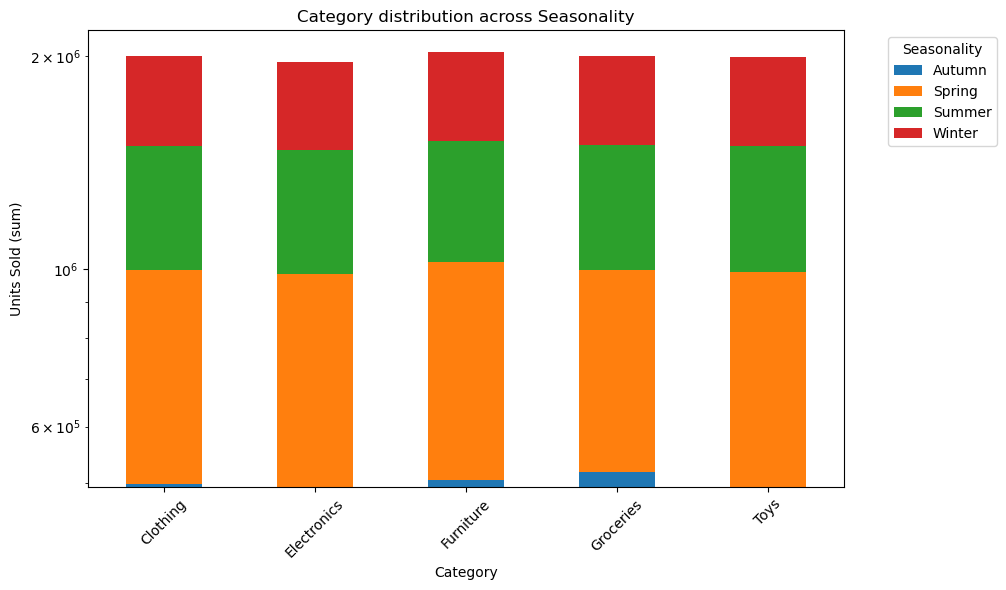

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

categorical_cols = df.select_dtypes(include=['category', 'bool']).columns.tolist()
ref_col = 'Category'

def plot_categorical_interactions(ref_col):
    for col in categorical_cols:
        if col == ref_col:
            continue  # skip the reference column

        # Crosstab with numeric aggregation
        ct = pd.crosstab(df[ref_col], df[col], values=df["Units Sold"], aggfunc="sum")
        print(ct.head())
        # Plot stacked bar
        ct.plot(kind='bar', stacked=True, figsize=(10,6))
        plt.title(f"{ref_col} distribution across {col}")
        plt.ylabel("Units Sold (sum)")
        plt.xlabel(ref_col)
        plt.xticks(rotation=45)
        plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.yscale('log')
        plt.show()

# Call function
plot_categorical_interactions(ref_col)


Very Minor differences, tables more interpretable than charts.
* Category x Store ID
  * Store S004 shows weaker toy sales but stronger clothing/grocery sales.

  * Store S005 consistently performs well across categories (top in 3/5 categories).

  * Variation between stores is small (mostly ±5%).

  * Indicates balanced performance across locations, not highly store-dependent.

* Category x Product ID
  * Each product ID (P0001 – P0020) has totals around 90k–110k per category, with some exceptions.

  * Differences within a category are small (±5–8%).

  * Product performance is consistent across categories, meaning:

    * No product strongly dominates or underperforms.
  * The most variable category is Furniture — some product totals spike higher (e.g., P0015).

* Category × Region
  * Clothing has the largest regional variation (North weaker, South stronger).

  * Electronics varies the least — stable
  demand across all regions.

* Category × Discount Level
  * Discount sensitivity is low overall — totals shift only 3–6%.
  * Electronics may have a nonlinear response (mid discounts perform worse than high).
  * Clothing: Small fluctuations (392k–407k)

  * Electronics: Drops at 10% discount, rises again at 20%

  * Furniture: Highest at 10% (421k)

  * Groceries: Fairly stable

  * Toys: Little variation

* Category × Weather Condition
  * Totals cluster between 480k–520k per category. Differences are small.
  * Weather condition barely affects sales.Snowy/Sunny sometimes peak slightly depending on category, but nothing extreme.

* Category × Holiday / Promotion
  * Promotions/Holidays do NOT strongly boost sales except maybe in Furniture.

  * Toys sees a slight drop, interestingly.


* Category × Seasonality
  * Seasonality almost does not change category performance.

  * Furniture slightly peaks in Spring.

  * Groceries strongest in Autumn.


# Summary:
Most variables do NOT show dramatic differences.

Best differentiators:

  * Store ID (but still mild variation)
  * Region (some differences)
  * Holiday/Promotion (Furniture only)

Weak differentiators:
  * Product ID (very uniform)
  * Weather
  * Season
  * Discount (small effects)

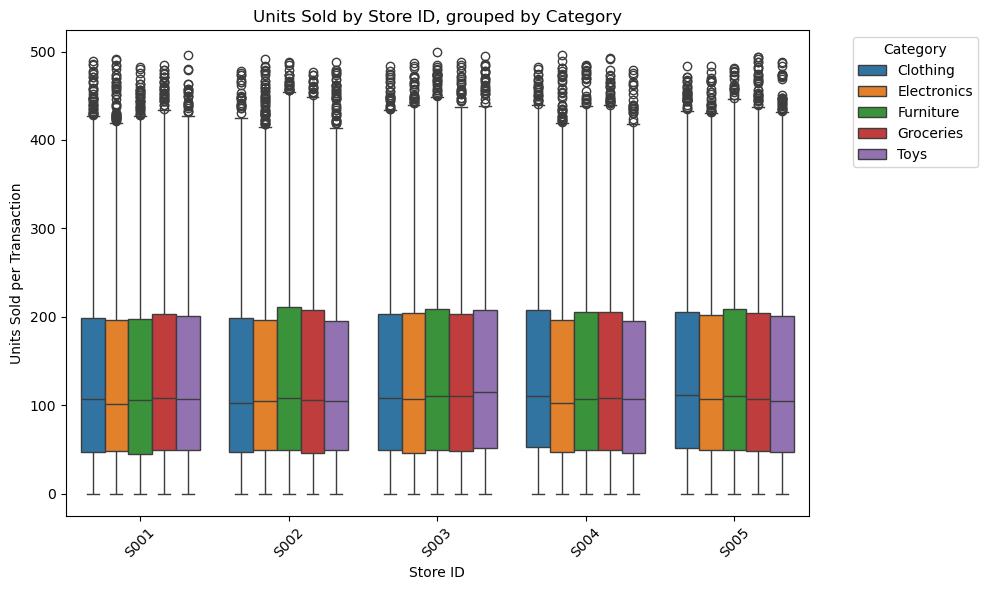

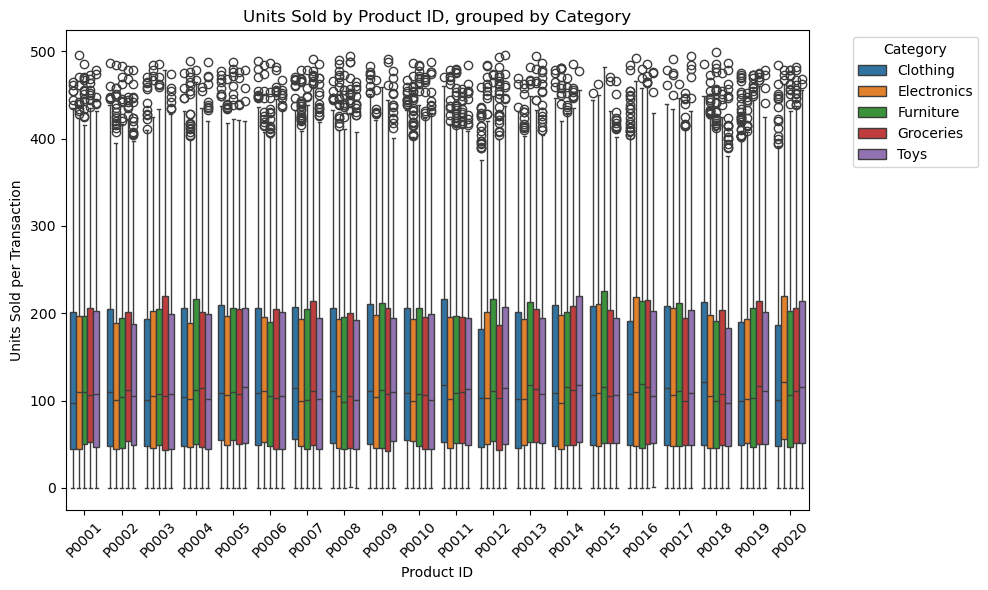

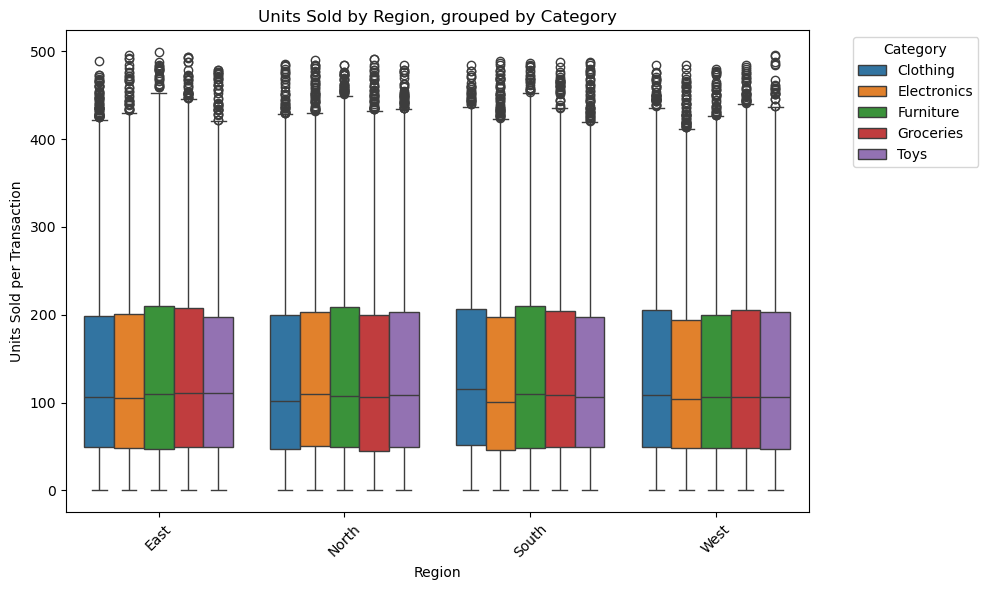

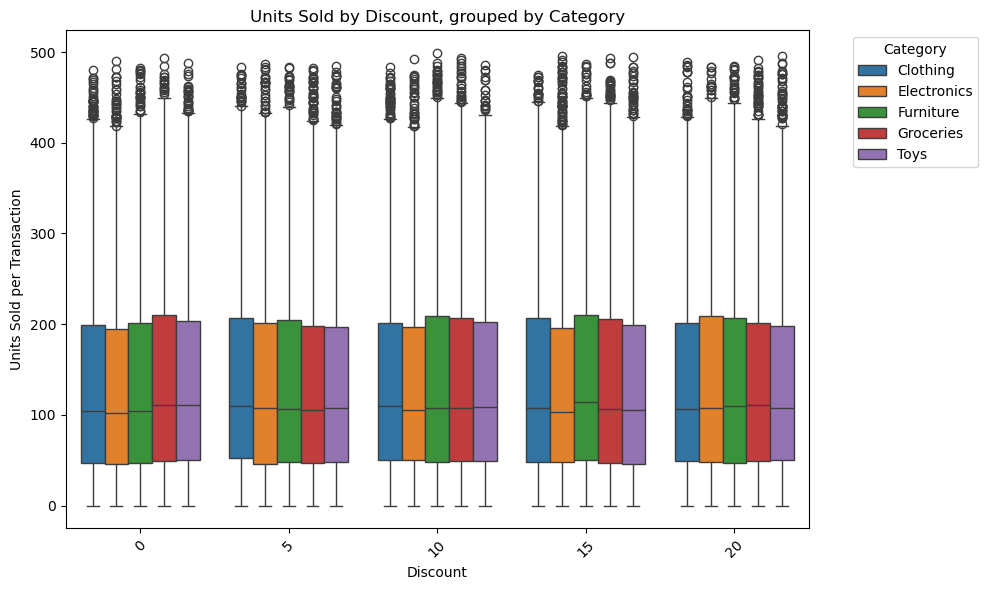

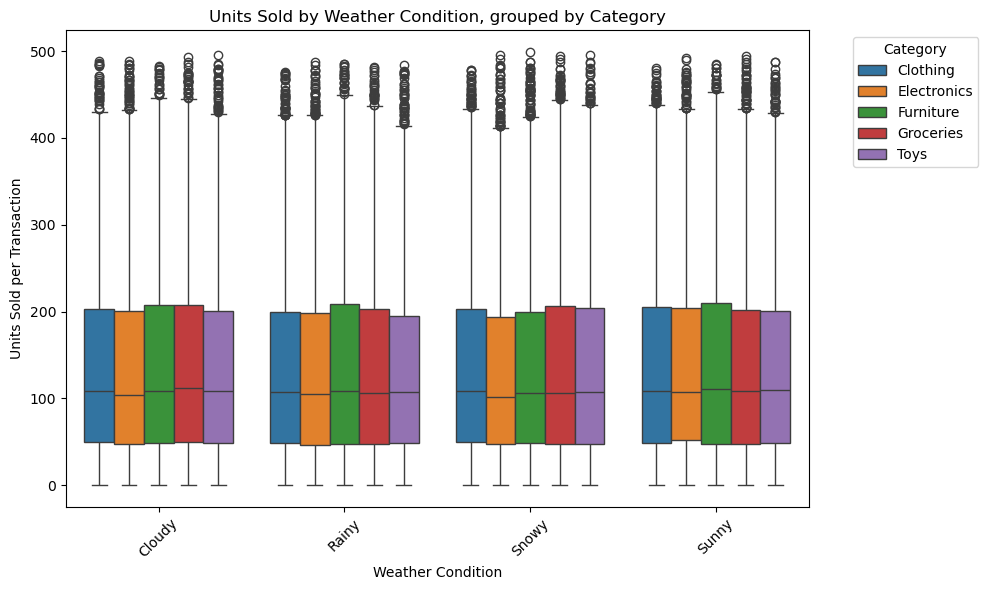

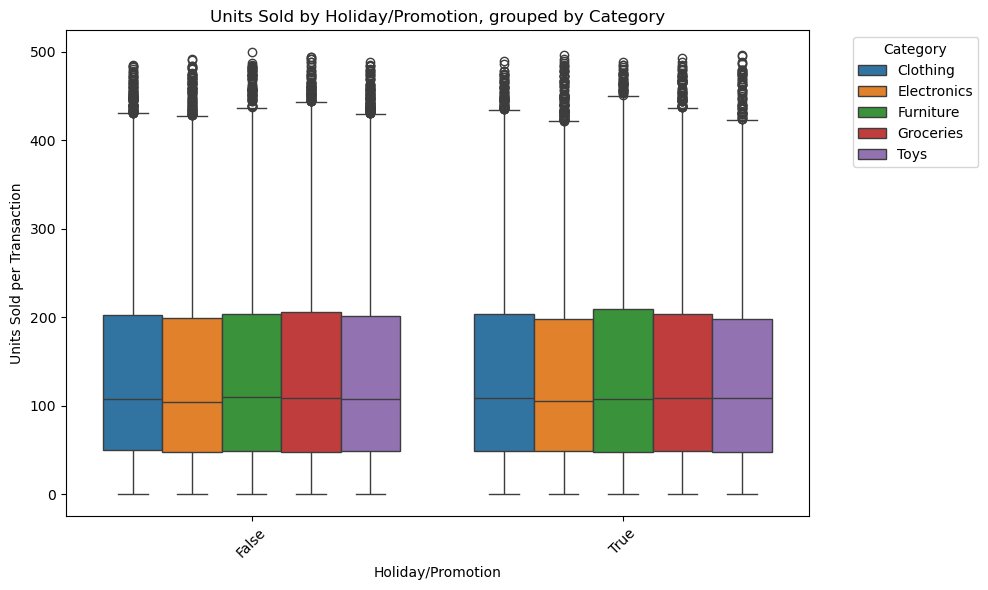

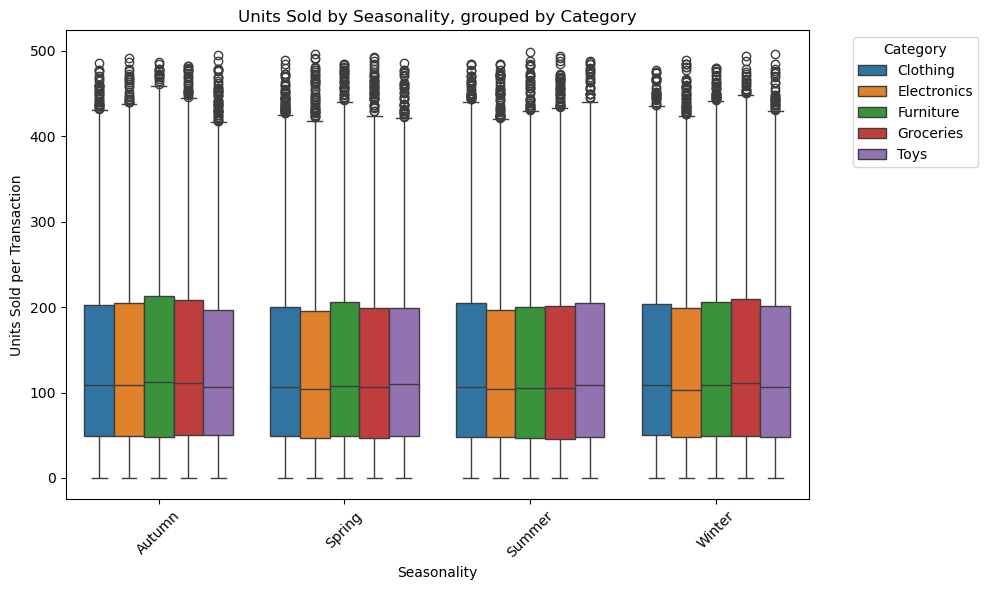

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = df.select_dtypes(include=['category', 'bool']).columns.tolist()
ref_col = 'Category'

for col in categorical_cols:
    if col == ref_col:
        continue

    plt.figure(figsize=(10,6))
    sns.boxplot(x=col, y='Units Sold', hue=ref_col, data=df)
    plt.title(f'Units Sold by {col}, grouped by {ref_col}')
    plt.ylabel("Units Sold per Transaction")
    plt.xticks(rotation=45)
    plt.legend(title=ref_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [14]:
def plot_categorical_interactions(ref_col):
    for col in categorical_cols:
        if col == ref_col:
            continue  # skip the reference column

        # Crosstab with sum aggregation
        ctSum = pd.crosstab(df[ref_col], df[col], values=df["Units Sold"], aggfunc="sum")
        print(f"{ref_col} x {col} (sum)")
        print(ctSum, "\n")

        # Crosstab with mean aggregation
        ctMean = pd.crosstab(df[ref_col], df[col], values=df["Units Sold"], aggfunc="mean")
        print(f"{ref_col} x {col} (mean)")
        print(ctMean, "\n")

        # Row-wise deviation from mean
        ct_dev = ctMean - ctMean.mean(axis=1).values[:, None]
        print(f"{ref_col} x {col} deviation from row mean")
        print(ct_dev, "\n")


plot_categorical_interactions("Category")

Category x Store ID (sum)
Store ID       S001    S002    S003    S004    S005
Category                                           
Clothing     387595  397144  397273  413914  403240
Electronics  388583  394499  400426  386379  390545
Furniture    400221  406035  409076  394065  415620
Groceries    399022  397720  403261  405543  394936
Toys         400329  392317  412660  379344  405835 

Category x Store ID (mean)
Store ID           S001        S002        S003        S004        S005
Category                                                               
Clothing     134.348354  134.260987  136.754905  138.943941  139.096240
Electronics  133.258916  134.917579  137.840275  133.280097  135.747306
Furniture    135.576220  139.387230  139.331063  134.907566  139.610346
Groceries    136.838820  137.050310  136.698644  137.007770  136.987860
Toys         135.658760  134.217243  141.128591  132.591402  136.003686 

Category x Store ID deviation from row mean
Store ID         S001      S002

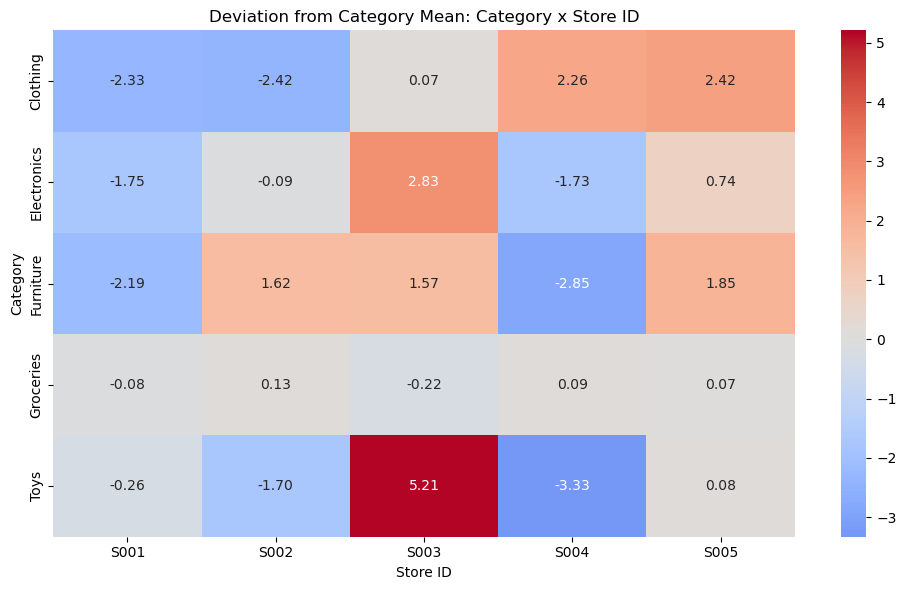

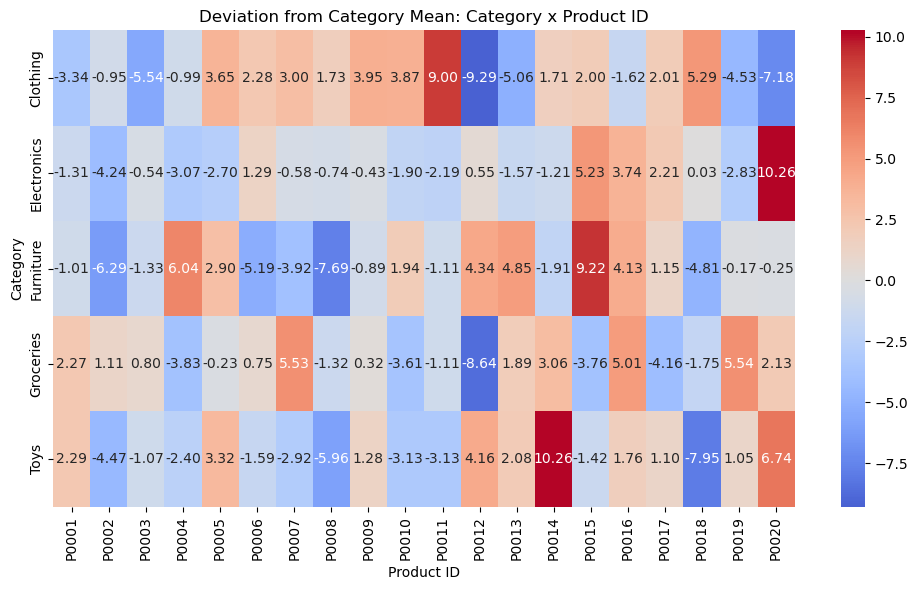

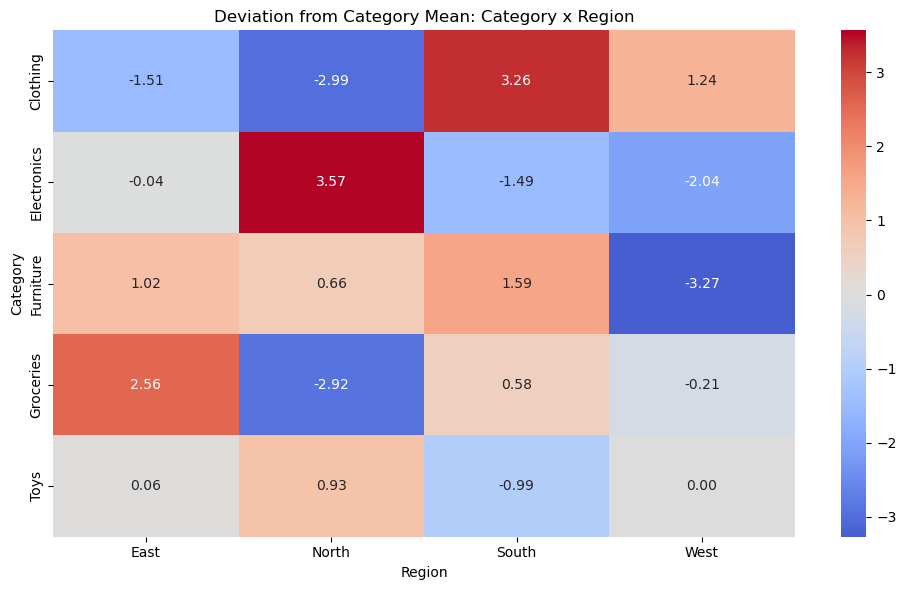

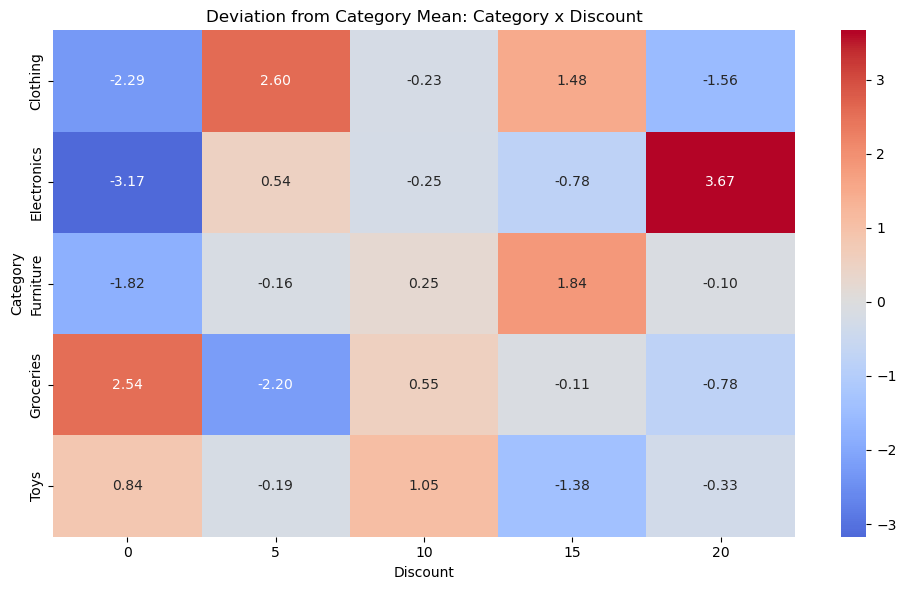

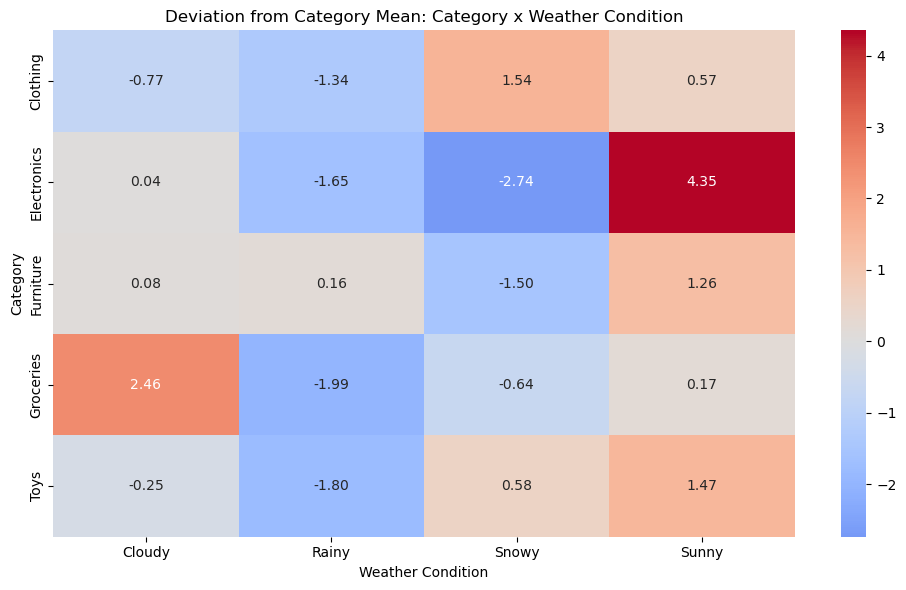

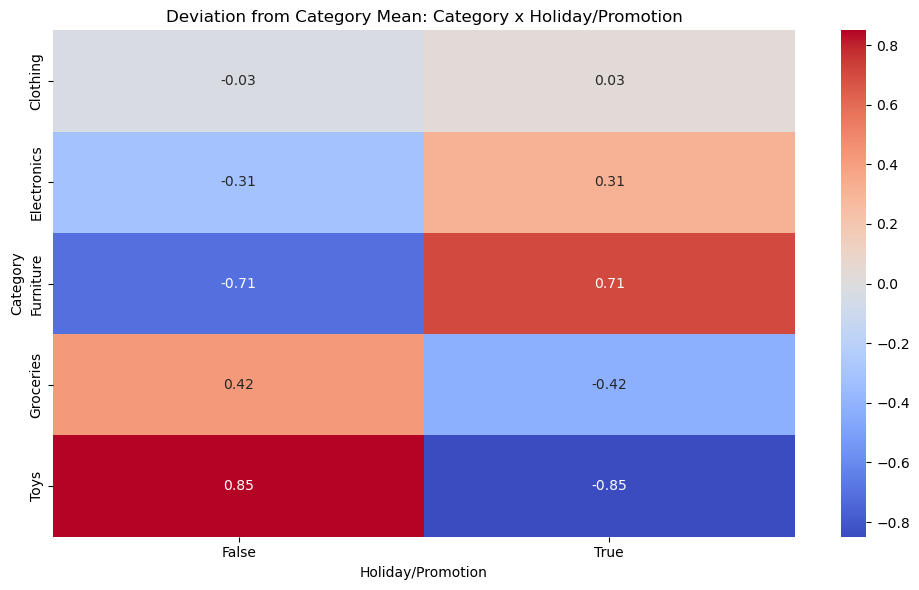

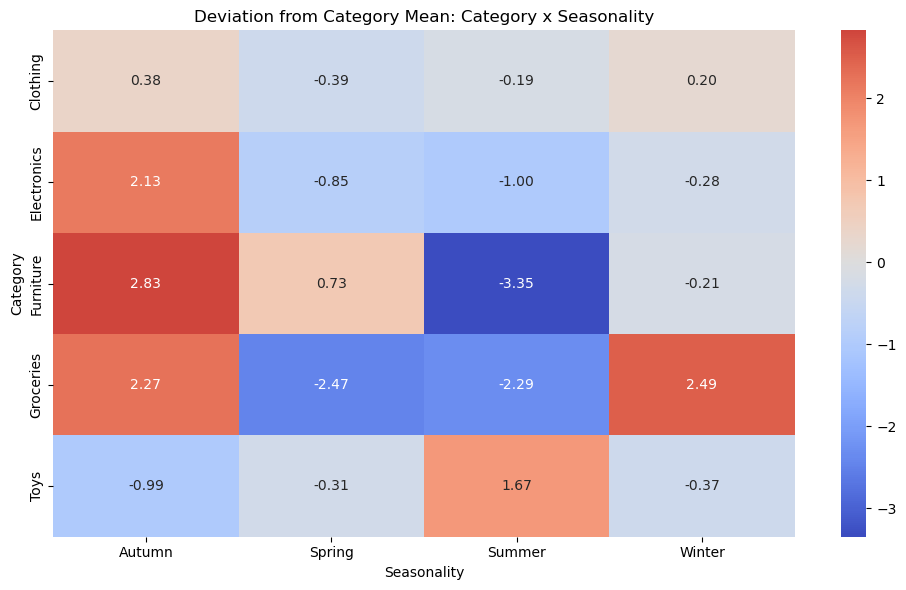

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = df.select_dtypes(include=['category', 'bool']).columns.tolist()
ref_col = 'Category'

# Function to plot deviation heatmaps
def plot_deviation_heatmaps(ref_col):
    for col in categorical_cols:
        if col == ref_col:
            continue

        # Compute mean crosstab
        ct_mean = pd.crosstab(df[ref_col], df[col], values=df["Units Sold"], aggfunc="mean")
        # Compute deviation from row mean
        ct_dev = ct_mean - ct_mean.mean(axis=1).values[:, None]

        # Plot heatmap
        plt.figure(figsize=(10,6))
        sns.heatmap(ct_dev, annot=True, fmt=".2f", cmap="coolwarm", center=0)
        plt.title(f"Deviation from Category Mean: {ref_col} x {col}")
        plt.ylabel(ref_col)
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()

plot_deviation_heatmaps(ref_col)


## 1. **Category × Store ID**

**Sum:**

| Category    | Observations                                                  |
| ----------- | ------------------------------------------------------------- |
| Clothing    | Highest sales at S004 (413k), lowest S001 (387k)              |
| Electronics | Fairly even, slight peak at S003 (400k)                       |
| Furniture   | Peaks at S005 (415k), dips at S004 (394k)                     |
| Groceries   | Slightly higher at S004 (405k), lowest at S002 (397k)         |
| Toys        | Strongly variable, highest at S003 (412k), lowest S004 (379k) |

**Mean/Deviation:**

* Deviations highlight **relative strength per store** within each category.
* For example, **Toys** sold **~5 units above category mean at S003**, while S004 is ~3 units below.
* Groceries are **very stable across stores** (-0.2 to 0.1 deviation).
* **Interpretation:** Some categories are concentrated in certain stores (Toys, Furniture), while essentials (Groceries, Clothing) are more evenly distributed.

---

## 2. **Category × Product ID**

**Sum:**

* Sales are generally consistent within categories, but some products stand out.
* E.g., **Groceries P0001** (106k) and **Furniture P0015** (112k) are high contributors.
* Some products underperform consistently, e.g., Electronics P0003 (92k), Toys P0018 (87k).

**Mean/Deviation:**

* Deviations emphasize **top/bottom performers per category**.
* Example: **Toys P0014** is +10 units above category mean; P0018 is -8 units below.
* **Interpretation:** Identifies **key products driving category performance**, useful for inventory prioritization or forecasting.

---

## 3. **Category × Region**

**Sum/Mean:**

* Groceries perform best in **East**, Clothing and Toys peak in **South/West**, Electronics highest in **North**.
* Deviation table confirms relative regional strengths:

  * **Groceries +2.5 units** above mean in East, -2.9 in North.
  * Electronics strongly underperform in West (-2 units).

**Interpretation:** Region impacts category demand; region-specific promotions or stocking may improve sales.

---

## 4. **Category × Discount**

**Mean/Deviation:**

* Slight positive impact of moderate discounts for most categories:

  * Clothing +2.6 units at 5% discount, Electronics +3.7 units at 20% discount.
* Some categories are less sensitive: Groceries show small deviations (<3 units).

**Interpretation:** Discounts **modestly increase mean units sold**; sensitivity varies by category.

---

## 5. **Category × Weather Condition**

**Mean/Deviation:**

* Weather influences some categories:

  * Electronics spike during **Sunny** (+4.3 units), drop in Rainy/Snowy (-2.7 units).
  * Groceries stronger during Cloudy (+2.4 units), weaker in Rain (-1.9).
* Clothing and Toys show smaller deviations (~±1.5 units).

**Interpretation:** Weather impacts **non-essential/impulse categories** more (Electronics, Toys) than staples.

---

## 6. **Category × Holiday/Promotion**

**Mean/Deviation:**

* Minor effect overall. Deviations are mostly ±1 unit:

  * Furniture +0.7 during promotions, Toys -0.8.
* **Interpretation:** Promotions have a **small but category-specific impact**, suggesting that some items are already in steady demand (Clothing, Groceries).

---

## 7. **Category × Seasonality**

**Mean/Deviation:**

* Strong seasonal patterns for some categories:

  * Furniture +2.8 units in Autumn, -3.3 in Summer.
  * Groceries dips in Spring/Summer (-2.4, -2.3), peaks Winter (+2.4).
* Toys show smaller deviations (~±1.7 units).

**Interpretation:** Seasonality is **critical for categories like Furniture and Groceries**, less so for Toys or Clothing.

---

## **Overall Insights**

1. **Mean-based deviations are most informative** for your dataset because:

   * Transaction-level variation is small; absolute sums are dominated by category size.
   * Deviations highlight **relative differences per store, product, region, or condition**, which are actionable.

2. **Key drivers of Units Sold:**

   * **Store/Product:** Some stores/products outperform consistently → consider stocking or promotions.
   * **Region/Season/Weather:** Non-essential categories (Electronics, Toys) sensitive to regional, seasonal, and weather effects.
   * **Discounts/Promotions:** Minor influence overall; moderate for some categories.

3. **Forecasting implication (KF-ready):**

   * Use **mean-based features (or deviations)** for Kalman Filter input: captures relative performance without being dominated by category size.
   * Consider **region, store, season, and product IDs** as explanatory variables; promotions/weather can be secondary inputs.


# Time Series

Missing dates: DatetimeIndex([], dtype='datetime64[ns]', freq='D')
Daily Units Sold summary:
count      731.000000
mean     13646.487004
std       1031.958966
min      10642.000000
25%      12981.000000
50%      13673.000000
75%      14323.500000
max      17239.000000
Name: Units Sold, dtype: float64


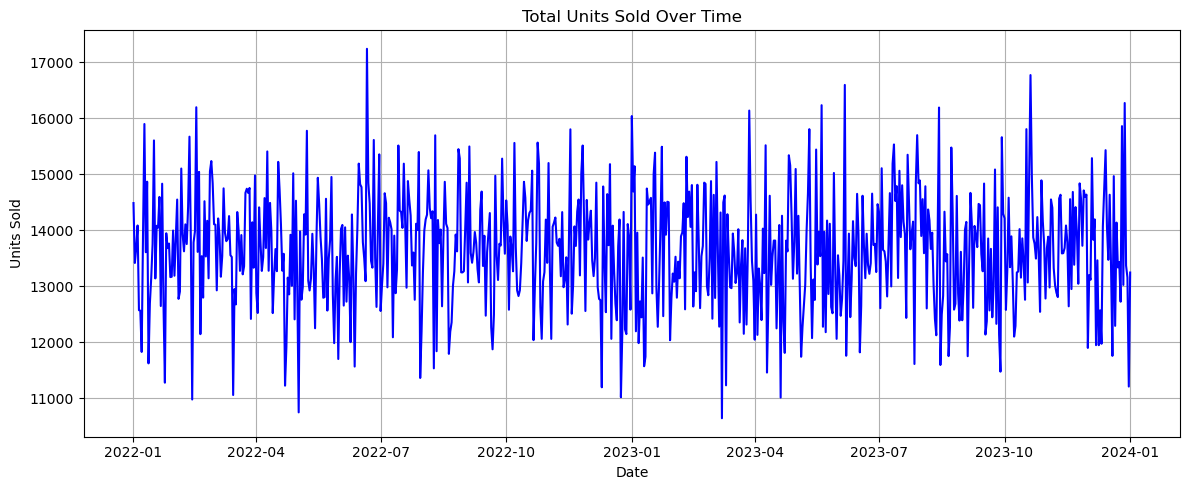

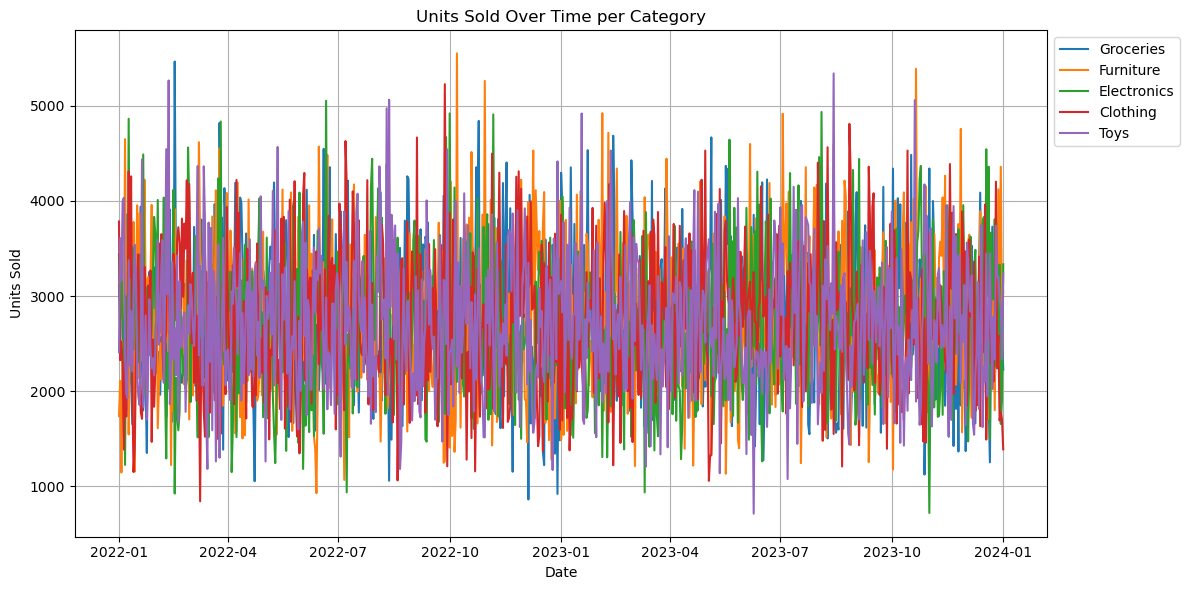

C:\Users\Cybertronia\AppData\Local\Temp\ipykernel_16908\1187434770.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_stores = df.groupby('Store ID')['Units Sold'].sum().sort_values(ascending=False).head(5).index


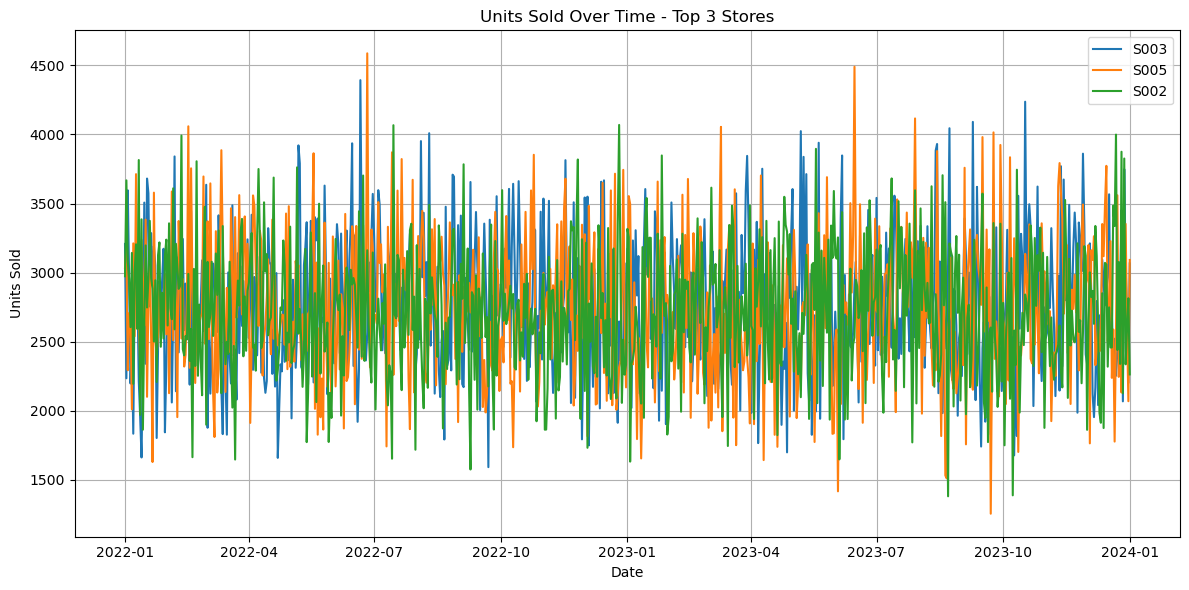

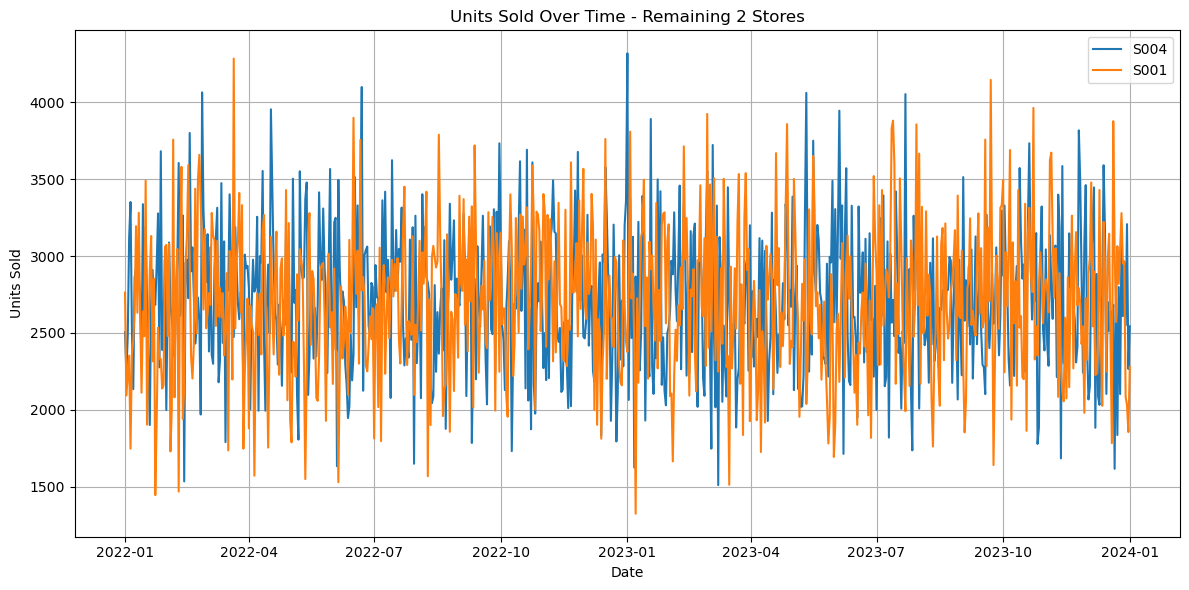

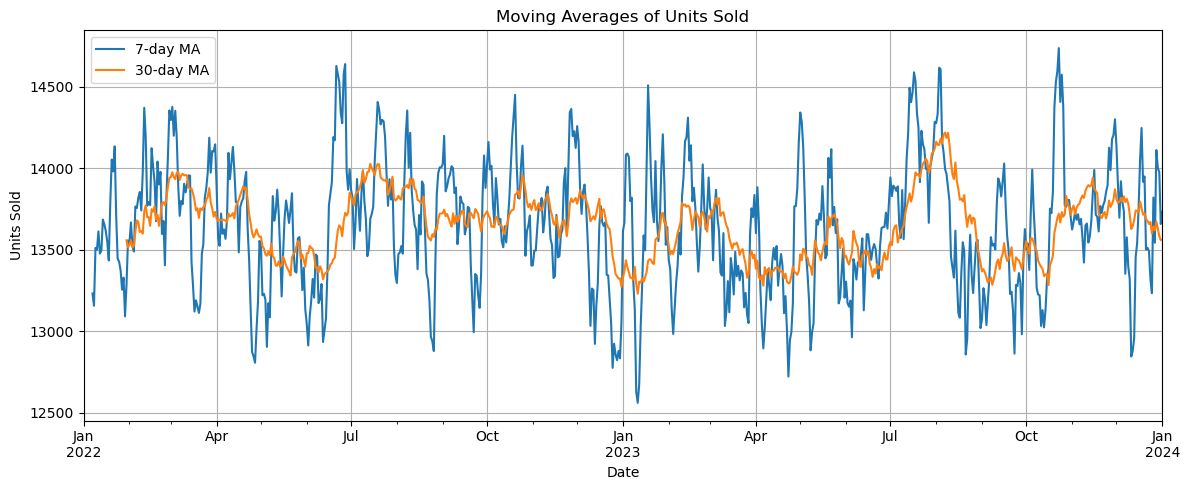

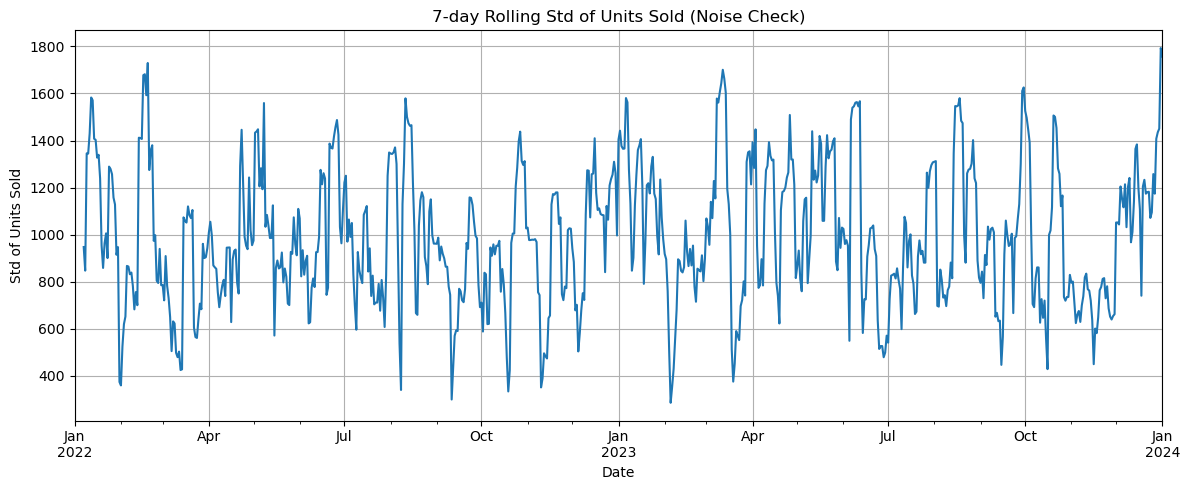

Rolling std summary (7-day):
count     725.000000
mean      989.484082
std       292.637619
min       286.062597
25%       779.367356
50%       960.474164
75%      1210.262349
max      1792.754996
Name: Units Sold, dtype: float64


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# -----------------------------
# 1. Prepare time index
# -----------------------------
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# Check for missing dates
date_range = pd.date_range(df['Date'].min(), df['Date'].max())
missing_dates = date_range.difference(df['Date'].unique())
print(f"Missing dates: {missing_dates}")

# -----------------------------
# 2. Aggregation level
# -----------------------------
# Use daily sums for now
daily_units = df.groupby('Date')['Units Sold'].sum()
print("Daily Units Sold summary:")
print(daily_units.describe())

# -----------------------------
# 3. Plot Units Sold over time
# -----------------------------

# Overall trend
plt.figure(figsize=(12,5))
plt.plot(daily_units.index, daily_units.values, color='blue')
plt.title("Total Units Sold Over Time")
plt.ylabel("Units Sold")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

# By Category (smarter plotting to avoid overlaps)
categories = df['Category'].unique()
plt.figure(figsize=(12,6))
for category in categories:
    ts = df[df['Category']==category].groupby('Date')['Units Sold'].sum()
    plt.plot(ts.index, ts.values, label=category)

plt.title("Units Sold Over Time per Category")
plt.ylabel("Units Sold")
plt.xlabel("Date")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))  # move legend outside
plt.grid(True)
plt.tight_layout()
plt.show()

# By Store (optional if many stores, show top 5 busiest stores)
# -----------------------------
# By Store - split into two plots to avoid clutter
# -----------------------------
top_stores = df.groupby('Store ID')['Units Sold'].sum().sort_values(ascending=False).head(5).index

# First 3 stores
plt.figure(figsize=(12,6))
for store in top_stores[:3]:
    ts = df[df['Store ID']==store].groupby('Date')['Units Sold'].sum()
    plt.plot(ts.index, ts.values, label=store)
plt.title("Units Sold Over Time - Top 3 Stores")
plt.ylabel("Units Sold")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Remaining 2 stores
plt.figure(figsize=(12,6))
for store in top_stores[3:]:
    ts = df[df['Store ID']==store].groupby('Date')['Units Sold'].sum()
    plt.plot(ts.index, ts.values, label=store)
plt.title("Units Sold Over Time - Remaining 2 Stores")
plt.ylabel("Units Sold")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# -----------------------------
# 4. Moving averages for seasonality
# -----------------------------
plt.figure(figsize=(12,5))
daily_units.rolling(window=7).mean().plot(label='7-day MA')
daily_units.rolling(window=30).mean().plot(label='30-day MA')
plt.title("Moving Averages of Units Sold")
plt.ylabel("Units Sold")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------
# 5. Variability / noise
# -----------------------------
# Compute rolling standard deviation
plt.figure(figsize=(12,5))
daily_units.rolling(window=7).std().plot(label='7-day rolling std')
plt.title("7-day Rolling Std of Units Sold (Noise Check)")
plt.ylabel("Std of Units Sold")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

print("Rolling std summary (7-day):")
print(daily_units.rolling(window=7).std().describe())




C:\Users\Cybertronia\AppData\Local\Temp\ipykernel_16908\3779172204.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_stores = df.groupby('Store ID')['Units Sold'].sum().sort_values(ascending=False).head(5).index


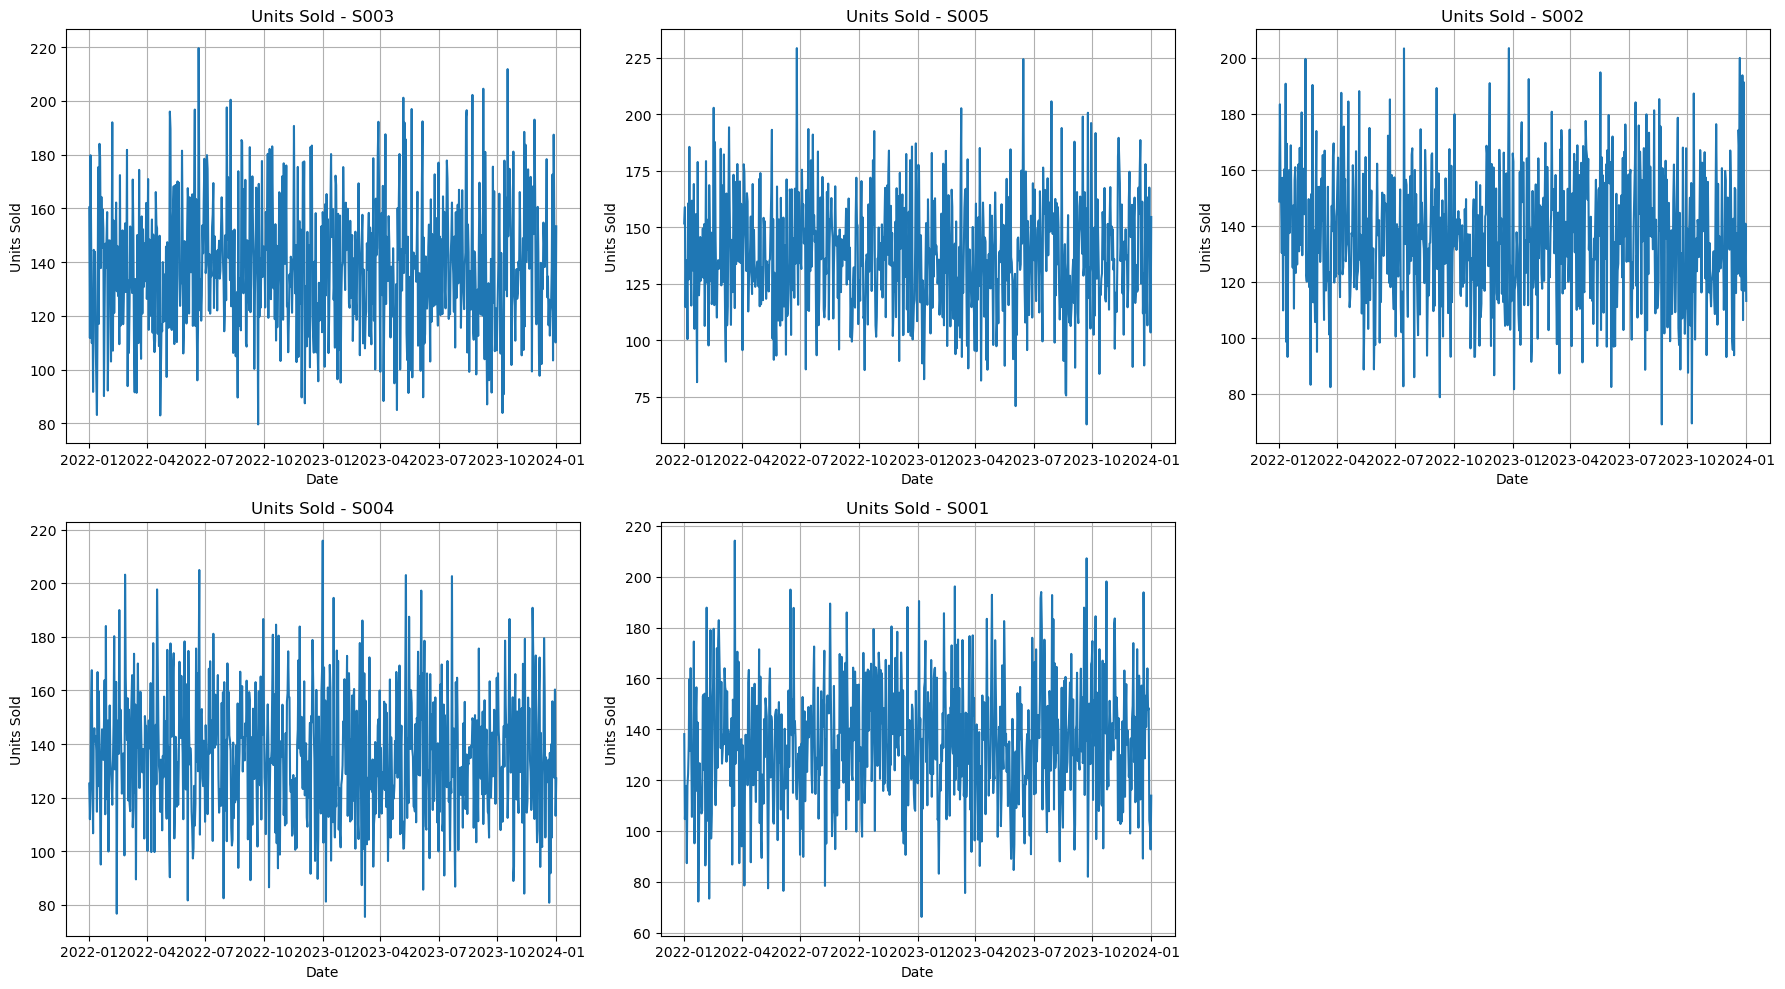

In [17]:
import matplotlib.pyplot as plt

top_stores = df.groupby('Store ID')['Units Sold'].sum().sort_values(ascending=False).head(5).index

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 cols
axes = axes.flatten()  # easier indexing

for i, store in enumerate(top_stores):
    ts = df[df['Store ID']==store].groupby('Date')['Units Sold'].mean()
    axes[i].plot(ts.index, ts.values, label=store, color='tab:blue')
    axes[i].set_title(f"Units Sold - {store}")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Units Sold")
    axes[i].grid(True)

# If there are empty subplots, hide them
for j in range(len(top_stores), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


S005 has highest consisten sales, then its S003.
S005>S003>S002>S004>S001

C:\Users\Cybertronia\AppData\Local\Temp\ipykernel_16908\2544730052.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_stores = df.groupby('Store ID')['Units Sold'].sum().sort_values(ascending=False).head(5).index


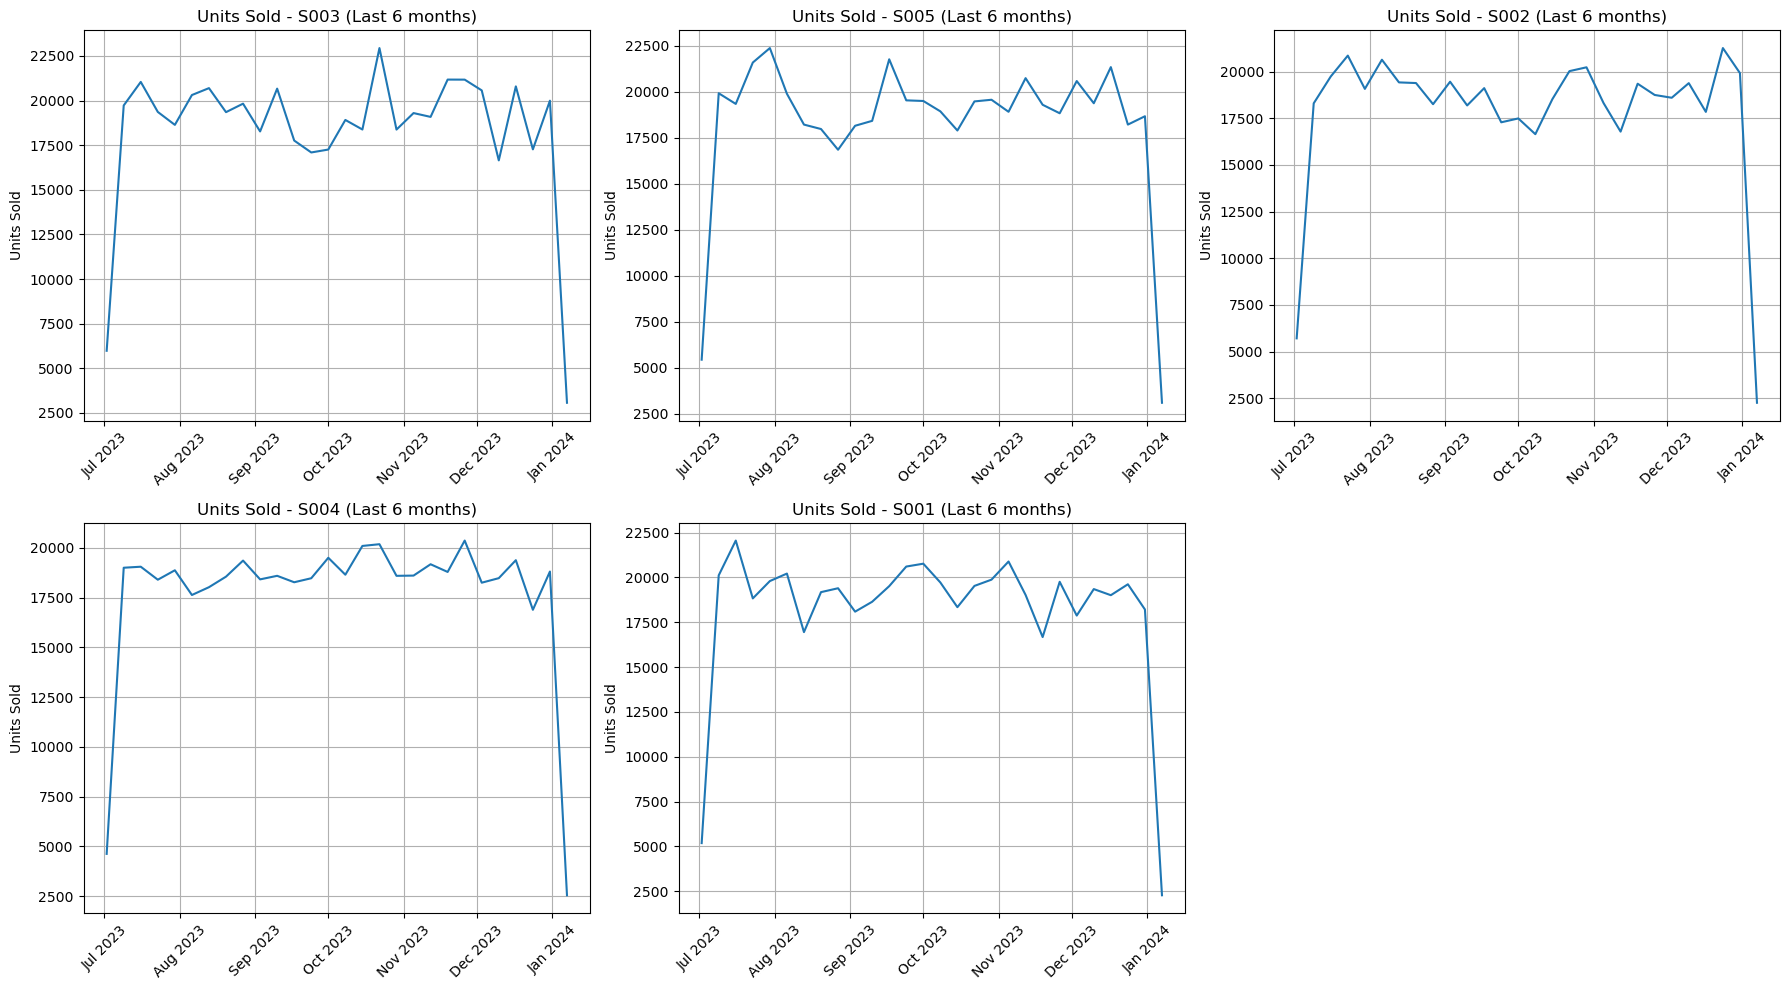

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define last 6 months
last_date = df['Date'].max()
first_date = last_date - pd.DateOffset(months=6)

top_stores = df.groupby('Store ID')['Units Sold'].sum().sort_values(ascending=False).head(5).index

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # flatten for easy indexing

for i, store in enumerate(top_stores):
    # Filter for last 6 months
    ts = df[(df['Store ID']==store) & (df['Date'] >= first_date) & (df['Date'] <= last_date)]
    ts = ts.groupby('Date')['Units Sold'].sum()  # sum per day

    # Resample weekly to reduce noise
    ts_weekly = ts.resample('W').sum()

    axes[i].plot(ts_weekly.index, ts_weekly.values, label=store, color='tab:blue')
    axes[i].set_title(f"Units Sold - {store} (Last 6 months)")
    axes[i].set_ylabel("Units Sold")
    axes[i].grid(True)

    # Format x-axis: show every month
    axes[i].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    axes[i].tick_params(axis='x', rotation=45)

# Hide empty subplot
for j in range(len(top_stores), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


S005>S001>S003>S004>S002

C:\Users\Cybertronia\AppData\Local\Temp\ipykernel_16908\1393609856.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_stores = df.groupby('Store ID')['Units Sold'].sum().sort_values(ascending=False).head(5).index



store S003
ts_weekly Date
2022-01-02     5444
2022-01-09    18866
2022-01-16    16949
2022-01-23    22449
2022-01-30    17916
              ...  
2023-12-10    16650
2023-12-17    20797
2023-12-24    17268
2023-12-31    19996
2024-01-07     3067
Freq: W-SUN, Name: Units Sold, Length: 106, dtype: int64
ts_ma7 Date
2022-01-02             NaN
2022-01-09             NaN
2022-01-16             NaN
2022-01-23    17239.714286
2022-01-30    19195.571429
                  ...     
2023-12-10    19662.285714
2023-12-17    17075.000000
2023-12-24             NaN
2023-12-31             NaN
2024-01-07             NaN
Freq: W-SUN, Name: Units Sold, Length: 106, dtype: float64


store S005
ts_weekly Date
2022-01-02     6214
2022-01-09    19148
2022-01-16    19856
2022-01-23    18262
2022-01-30    18957
              ...  
2023-12-10    19378
2023-12-17    21343
2023-12-24    18218
2023-12-31    18671
2024-01-07     3092
Freq: W-SUN, Name: Units Sold, Length: 106, dtype: int64
ts_ma7 Date
2022-01-02 

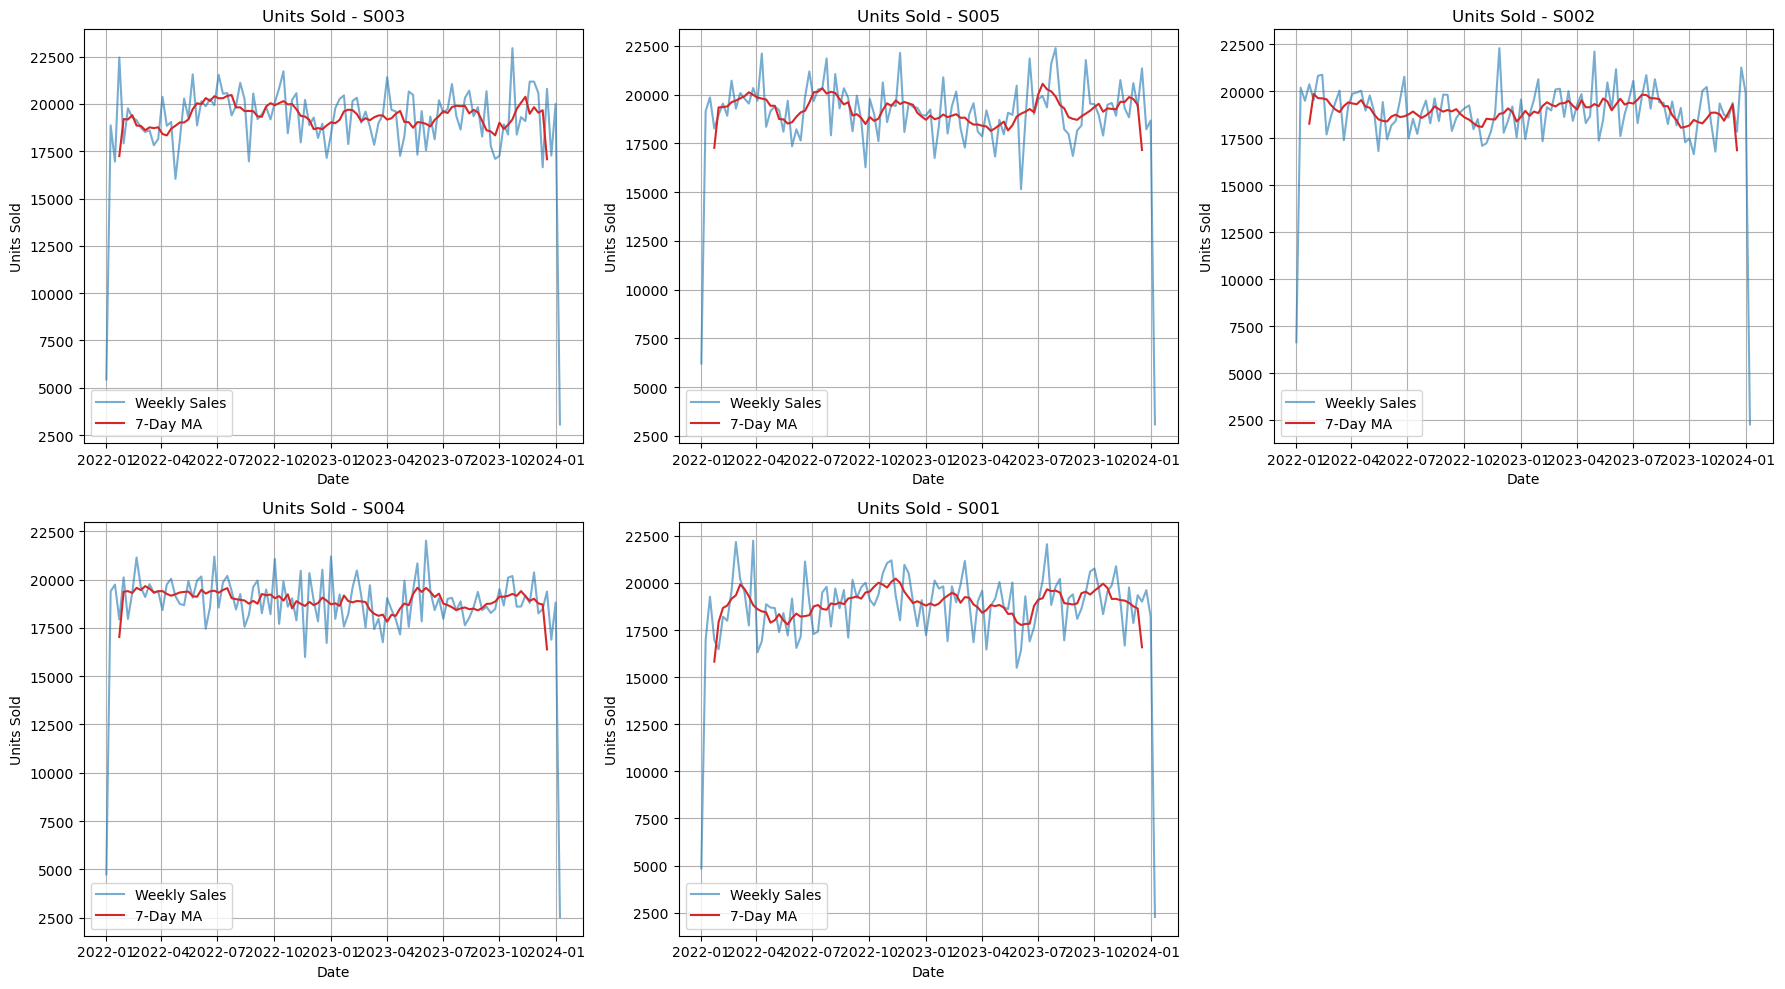

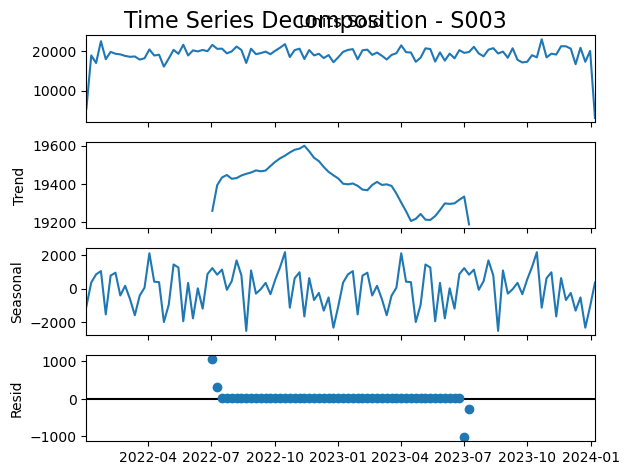

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Top 5 stores by total units sold
top_stores = df.groupby('Store ID')['Units Sold'].sum().sort_values(ascending=False).head(5).index

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, store in enumerate(top_stores):
    # Filter store data
    store_data = df[df['Store ID']==store]

    # Weekly aggregation of units sold
    ts_weekly = store_data.resample('W', on='Date')['Units Sold'].sum()

    # 7-day moving average (centered)
    ts_ma7 = ts_weekly.rolling(window=7, center=True).mean()
    print("\n","="*50)
    print("store",store)
    print("ts_weekly",ts_weekly)
    print("ts_ma7",ts_ma7)
    print("="*50,"\n")
    # Plot weekly sales
    axes[i].plot(ts_weekly.index, ts_weekly.values, label='Weekly Sales', color='tab:blue', alpha=0.6)
    # Plot 7-day MA
    axes[i].plot(ts_ma7.index, ts_ma7.values, label='7-Day MA', color='tab:red')

    axes[i].set_title(f"Units Sold - {store}")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Units Sold")
    axes[i].legend()
    axes[i].grid(True)

# Hide empty subplot if less than 6 stores
for j in range(len(top_stores), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# --- Optional: Time series decomposition for the first store ---
store = top_stores[0]
store_data = df[df['Store ID']==store]
ts_weekly = store_data.resample('W', on='Date')['Units Sold'].sum()

decomposition = seasonal_decompose(ts_weekly, model='additive')
decomposition.plot()
plt.suptitle(f'Time Series Decomposition - {store}', fontsize=16)
plt.show()


In [20]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

# Top 5 stores by total sales
top_stores = df.groupby('Store ID')['Units Sold'].sum().sort_values(ascending=False).head(5).index

summary_list = []

for store in top_stores:
    store_data = df[df['Store ID'] == store].copy()

    # Weekly aggregation
    ts_weekly = store_data.resample('W', on='Date')['Units Sold'].sum()

    # 7-day moving average
    ts_ma7 = ts_weekly.rolling(window=7, center=True).mean()

    # Time series decomposition (additive)
    decomposition = seasonal_decompose(ts_weekly, model='additive', period=52)  # weekly data, yearly seasonality approx
    trend = decomposition.trend.dropna()  # drop NaNs at edges
    seasonal = decomposition.seasonal
    resid = decomposition.resid

    # Descriptive stats
    avg_sales = ts_weekly.mean()
    avg_ma7 = ts_ma7.mean()

    # Trend start/end after dropping NaNs
    trend_start = trend.iloc[0]
    trend_end = trend.iloc[-1]

    # Seasonality amplitude
    season_amp = seasonal.max() - seasonal.min()

    # Detect anomalies: deviation from trend + seasonal > 2*std of residuals
    resid_std = resid.std()
    anomalies = ts_weekly[(ts_weekly - (trend + seasonal)).abs() > 2*resid_std]

    summary_list.append({
        "Store": store,
        "Avg Weekly Sales": round(avg_sales, 2),
        "Avg 7-Day MA": round(avg_ma7, 2),
        "Trend Start": round(trend_start, 2),
        "Trend End": round(trend_end, 2),
        "Seasonality Amplitude": round(season_amp, 2),
        "Num Anomalies": len(anomalies),
        "Anomaly Weeks": list(anomalies.index.date)
    })

summary_df = pd.DataFrame(summary_list)
print(summary_df)


  Store  Avg Weekly Sales  Avg 7-Day MA  Trend Start  Trend End  \
0  S003          19082.04      19339.17     19260.06   19189.05   
1  S005          18963.92      19197.72     19275.26   18925.58   
2  S002          18752.03      18950.30     18831.43   18952.42   
3  S004          18672.12      18925.88     19013.06   18602.67   
4  S001          18639.15      18914.68     18736.78   18844.27   

   Seasonality Amplitude  Num Anomalies  \
0                4660.62              2   
1                6978.46              3   
2                5139.32              2   
3                6086.79              4   
4                5696.45              4   

                                      Anomaly Weeks  
0                          [2022-07-03, 2023-07-02]  
1              [2022-07-03, 2022-07-10, 2023-07-02]  
2                          [2022-07-03, 2023-07-02]  
3  [2022-07-03, 2022-07-10, 2023-07-02, 2023-07-09]  
4  [2022-07-03, 2022-07-10, 2023-07-02, 2023-07-09]  


C:\Users\Cybertronia\AppData\Local\Temp\ipykernel_16908\3272351753.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_stores = df.groupby('Store ID')['Units Sold'].sum().sort_values(ascending=False).head(5).index


### **Store S003**

* **Average weekly sales:** ~19,082 units
* **Sales trend:** Mostly stable with a slight decrease from ~19,260 → ~19,189 units/week
* **Seasonality:** Moderate (~4,661 units swing), meaning sales vary somewhat with predictable seasonal effects
* **Anomalies:** 2 unusual weeks (early July 2022 and 2023)
* **Summary:** S003 is a strong, consistent performer. Seasonal patterns are moderate, and anomalies are limited, making it fairly predictable.

---

### **Store S005**

* **Average weekly sales:** ~18,964 units
* **Sales trend:** Slight decline over time (~19,275 → ~18,926 units/week)
* **Seasonality:** Strong (~6,978 units swing), indicating large peaks and troughs depending on the time of year
* **Anomalies:** 3 unusual weeks (mostly early July 2022 & 2023)
* **Summary:** S005 shows strong seasonal fluctuations. While overall sales are high, the store is trending slightly downward, and early July consistently produces anomalies.

---

### **Store S002**

* **Average weekly sales:** ~18,752 units
* **Sales trend:** Slight upward movement (~18,831 → ~18,952 units/week)
* **Seasonality:** Moderate (~5,139 units swing)
* **Anomalies:** 2 unusual weeks (early July 2022 & 2023)
* **Summary:** S002 is stable with a small positive trend. Seasonal effects are noticeable but not extreme, and anomalies are limited, making sales relatively predictable.

---

### **Store S004**

* **Average weekly sales:** ~18,672 units
* **Sales trend:** Declining (~19,013 → ~18,603 units/week)
* **Seasonality:** Significant (~6,086 units swing)
* **Anomalies:** 4 unusual weeks (early/mid-July 2022 & 2023)
* **Summary:** S004 faces moderate decline in sales and strong seasonal swings. Early/mid-July repeatedly produces unusual activity, which may need operational attention.

---

### **Store S001**

* **Average weekly sales:** ~18,639 units
* **Sales trend:** Slight upward (~18,737 → ~18,844 units/week)
* **Seasonality:** Moderate (~5,697 units swing)
* **Anomalies:** 4 unusual weeks (early/mid-July 2022 & 2023)
* **Summary:** S001 shows a small positive trend and moderate seasonality. Early/mid-July anomalies are consistent, suggesting recurring events impacting sales.

---

### **Overall Observations**

1. **Trend patterns:** S004 and S005 are slightly declining; S001 and S002 slightly rising; S003 stable.
2. **Seasonality impact:** S005 and S004 experience the largest seasonal swings; S003 the smallest.
3. **Anomalies:** Early July is consistently unusual across all stores—likely due to recurring events, promotions, or inventory issues.
4. **Predictability:** S003 and S002 are the most stable; S005 and S004 require attention to manage seasonal spikes/dips.

# Store 5

Store ID     S001  S002  S003  S004    S005
Category                                   
Clothing        0     0     0     0  403240
Electronics     0     0     0     0  390545
Furniture       0     0     0     0  415620
Groceries       0     0     0     0  394936
Toys            0     0     0     0  405835


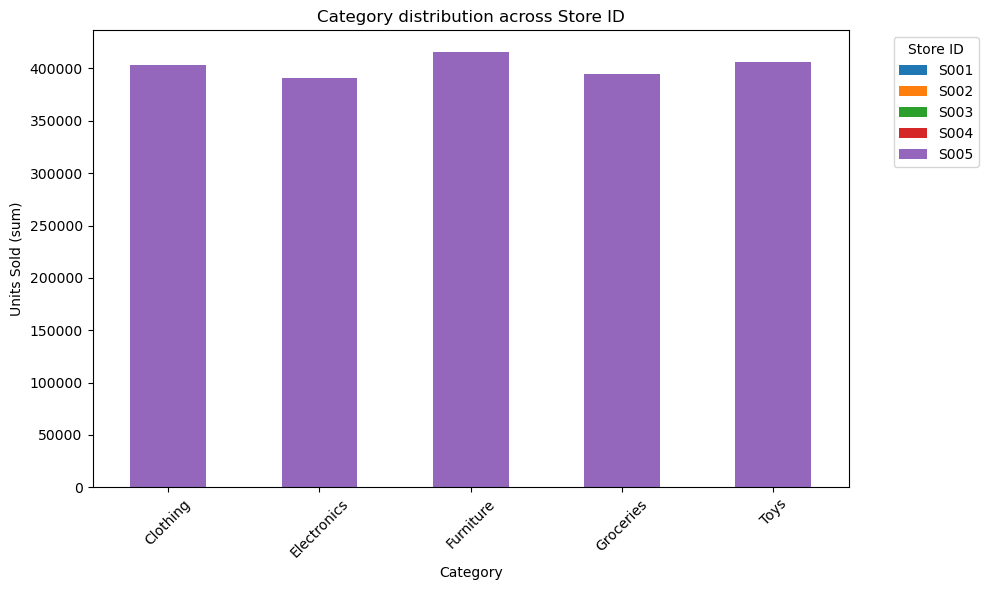

Product ID   P0001  P0002  P0003  P0004  P0005  P0006  P0007  P0008  P0009  \
Category                                                                     
Clothing     17601  22712  15861  18632  21542  18506  21408  22323  24045   
Electronics  17124  16221  21614  20389  22305  21496  19203  19973  18603   
Furniture    21256  20555  20152  21814  19418  17524  20318  19560  22339   
Groceries    17933  18293  23288  16899  17929  22825  18583  20098  17738   
Toys         21887  20406  24752  21102  22509  18520  21686  15905  16833   

Product ID   P0010  P0011  P0012  P0013  P0014  P0015  P0016  P0017  P0018  \
Category                                                                     
Clothing     21116  19045  22215  16977  20692  18559  18799  21121  20906   
Electronics  19485  19597  19672  20889  18811  21341  16731  18555  19419   
Furniture    20338  20788  21090  21344  20718  23705  23365  21598  19212   
Groceries    21778  20870  16368  20752  18655  21683  23747  1

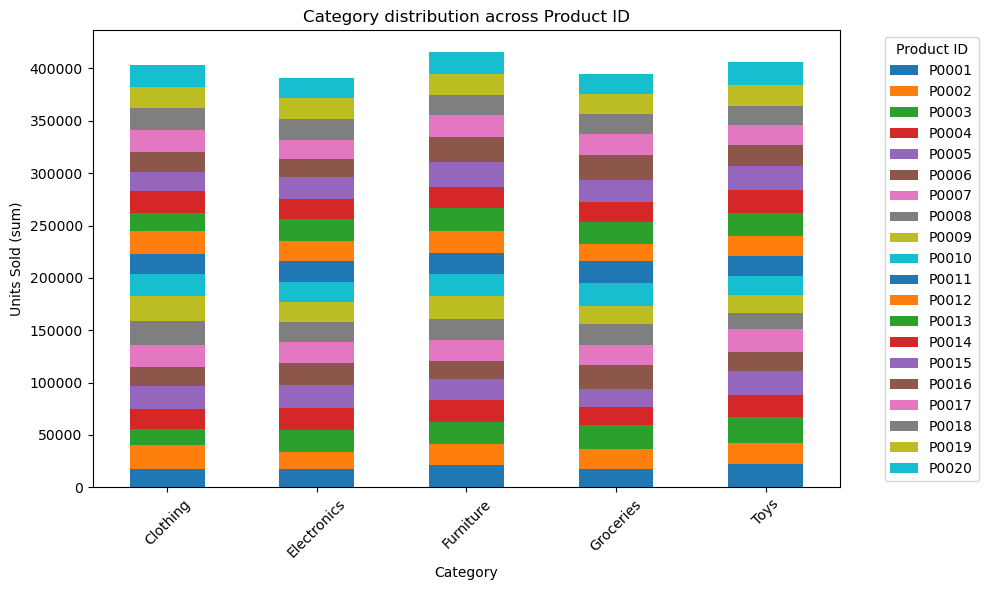

Region         East   North   South   West
Category                                  
Clothing     108849   95043  100802  98546
Electronics   98183  101898   96815  93649
Furniture    106617  106573  102638  99792
Groceries    101675   94422  103368  95471
Toys          97966  103305  104633  99931


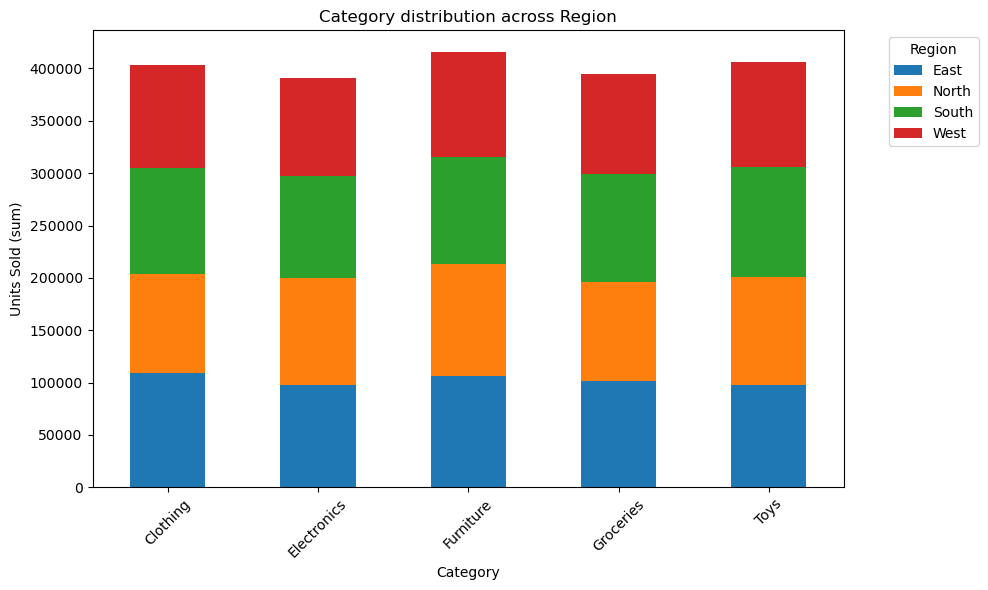

Discount         0      5     10     15     20
Category                                      
Clothing     77462  81576  76656  85057  82489
Electronics  78958  79558  67366  80292  84371
Furniture    83547  76384  90919  78708  86062
Groceries    82481  78210  81770  73587  78888
Toys         91009  74349  81055  76063  83359


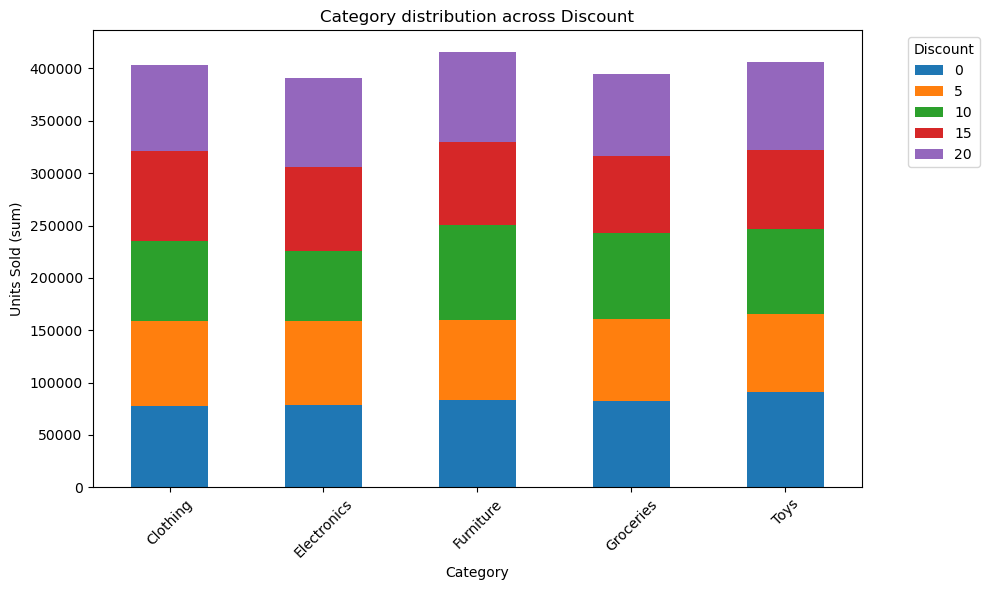

Weather Condition  Cloudy   Rainy   Snowy   Sunny
Category                                         
Clothing           101050  100730   97458  104002
Electronics         98629   93916  100463   97537
Furniture           98653  110246  100013  106708
Groceries          102693  100611  100516   91116
Toys                91863   97270  105707  110995


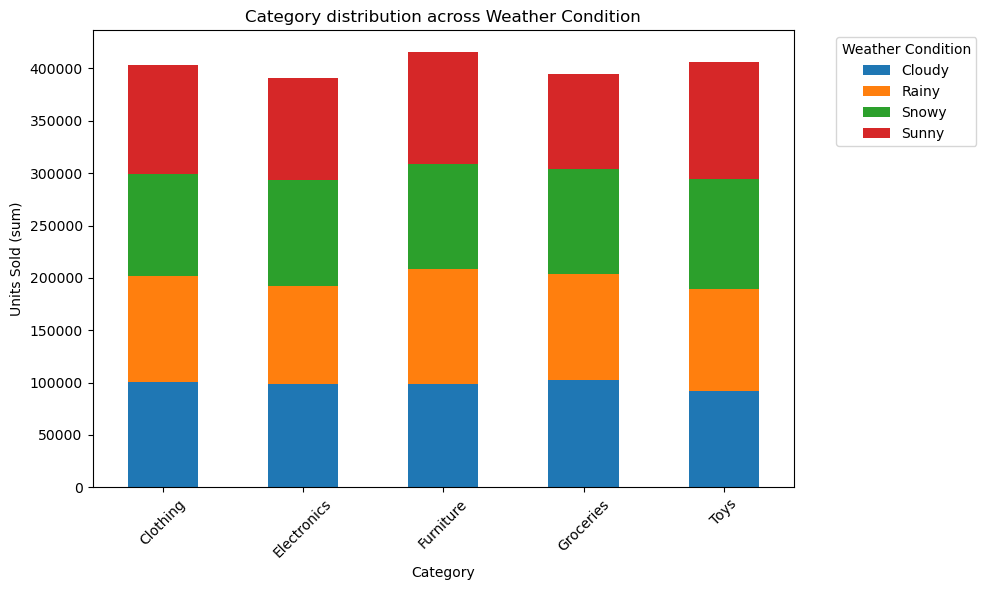

Holiday/Promotion   False   True 
Category                         
Clothing           203334  199906
Electronics        196039  194506
Furniture          208396  207224
Groceries          197009  197927
Toys               206179  199656


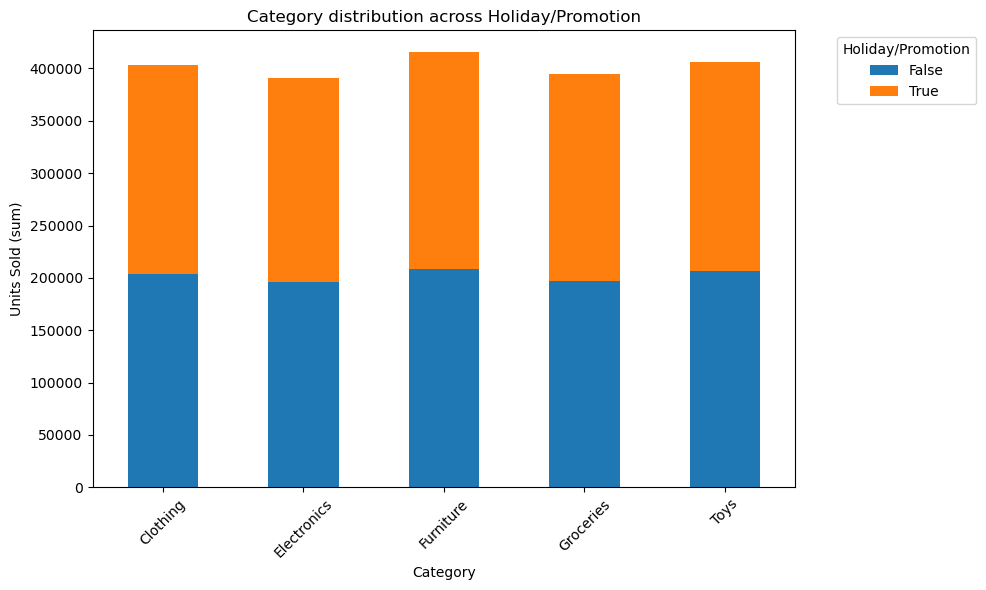

Seasonality  Autumn  Spring  Summer  Winter
Category                                   
Clothing     102667   98026  100235  102312
Electronics  104423   95050   91263   99809
Furniture    103835  104966  101546  105273
Groceries    104487   92396  100369   97684
Toys         101169  101202   99040  104424


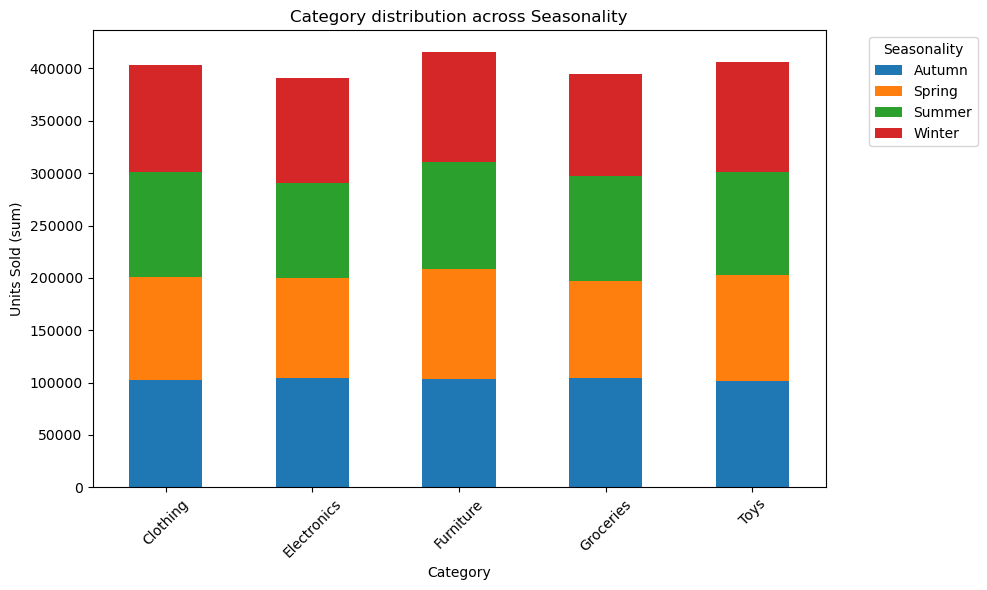

In [21]:
store5_df = df[df["Store ID"] == "S005"].copy()

categorical_cols = store5_df.select_dtypes(include=['category', 'bool']).columns.tolist()
ref_col = 'Category'

def plot_categorical_interactions(ref_col):
    for col in categorical_cols:
        if col == ref_col:
            continue  # skip the reference column

        # Crosstab with numeric aggregation
        ct = pd.crosstab(store5_df[ref_col], store5_df[col], values=store5_df["Units Sold"], aggfunc="sum")
        print(ct.head())
        # Plot stacked bar
        ct.plot(kind='bar', stacked=True, figsize=(10,6))
        plt.title(f"{ref_col} distribution across {col}")
        plt.ylabel("Units Sold (sum)")
        plt.xlabel(ref_col)
        plt.xticks(rotation=45)
        plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        #plt.yscale('log')
        plt.show()

# Call function
plot_categorical_interactions(ref_col)


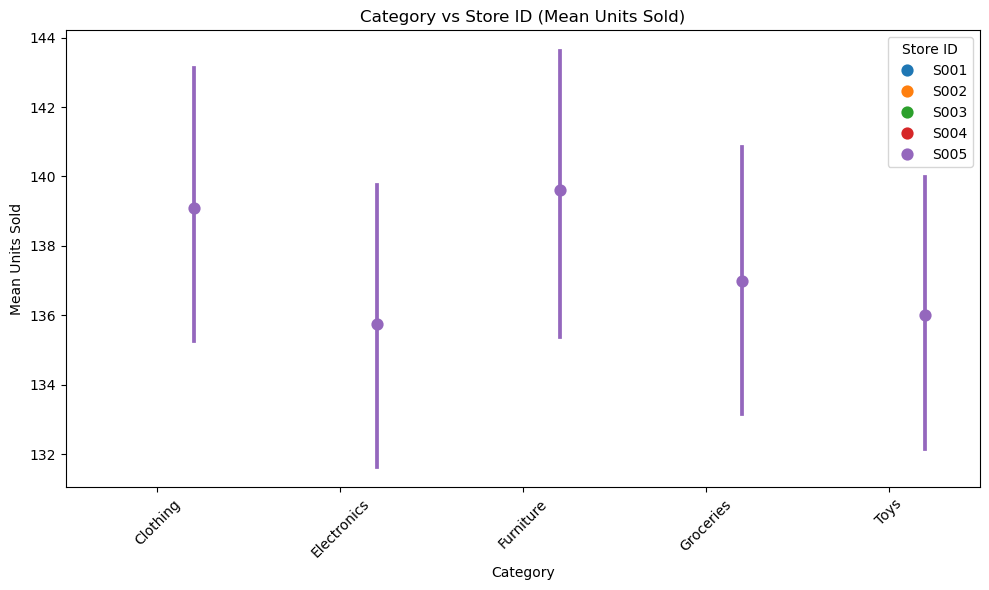

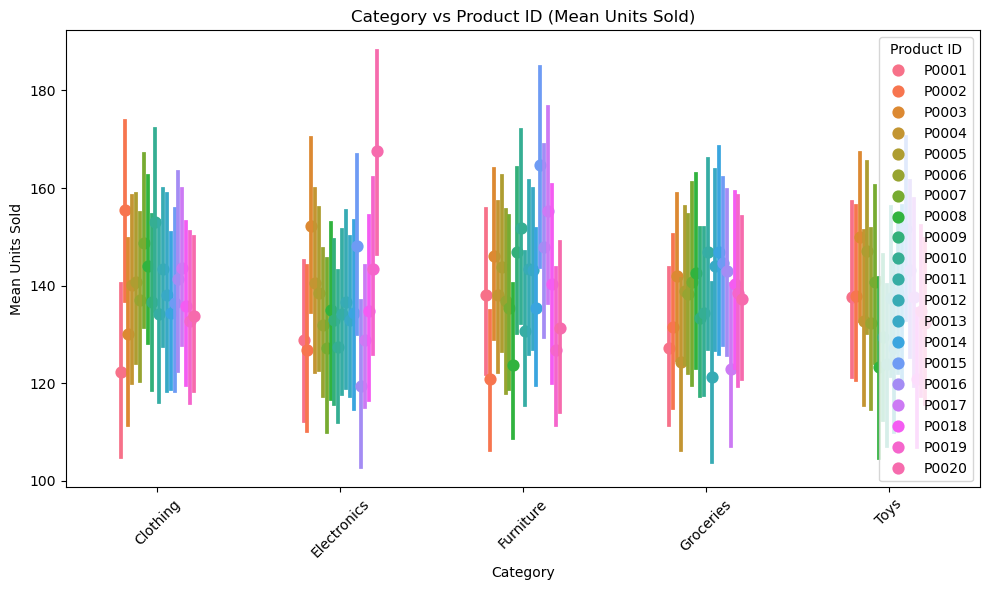

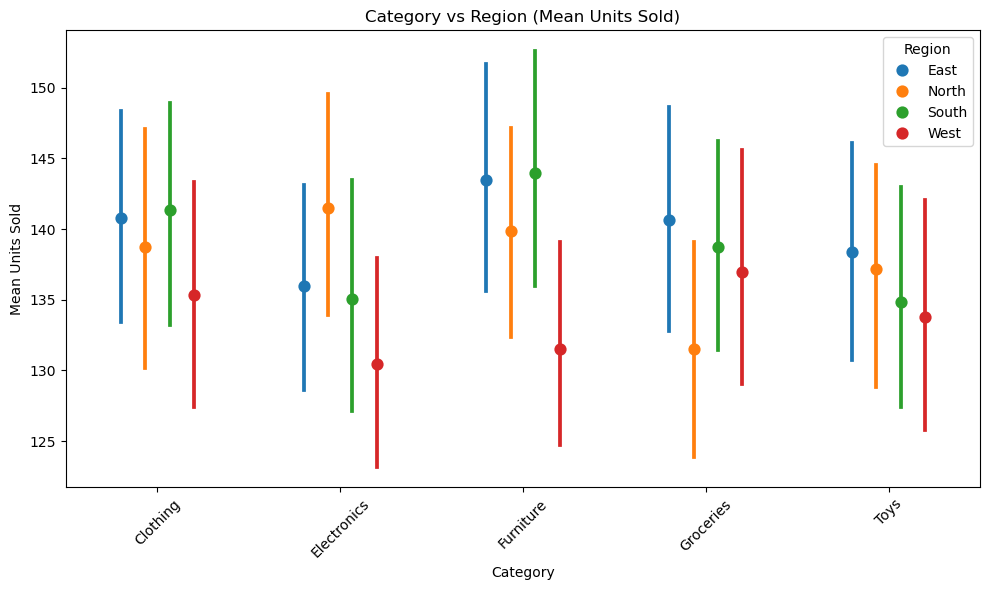

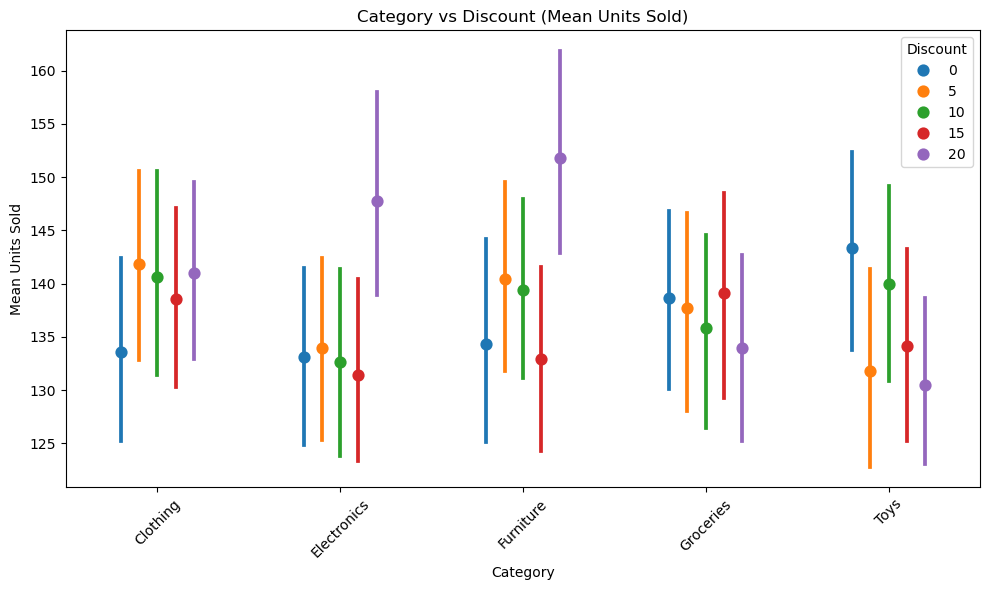

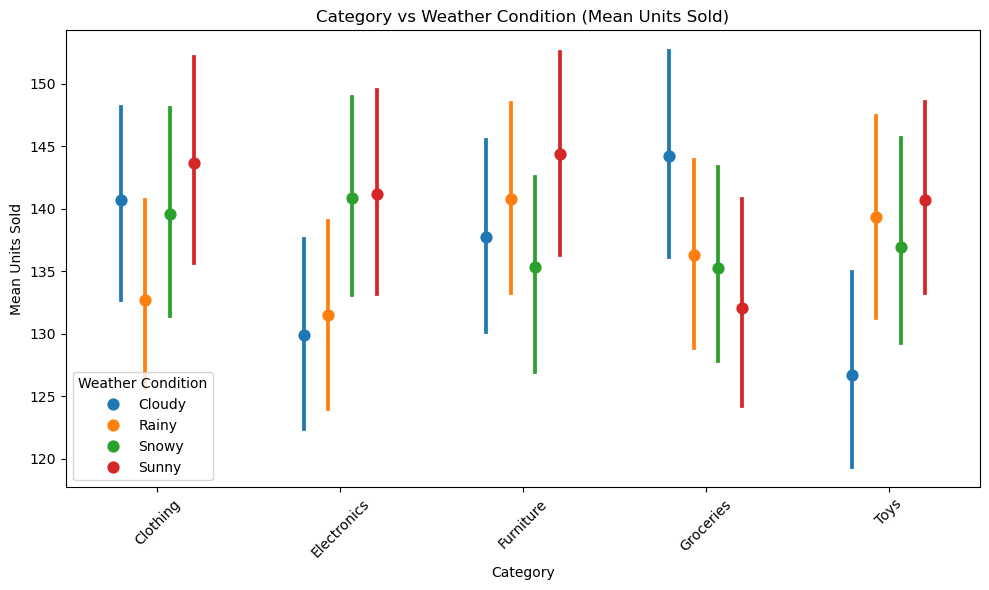

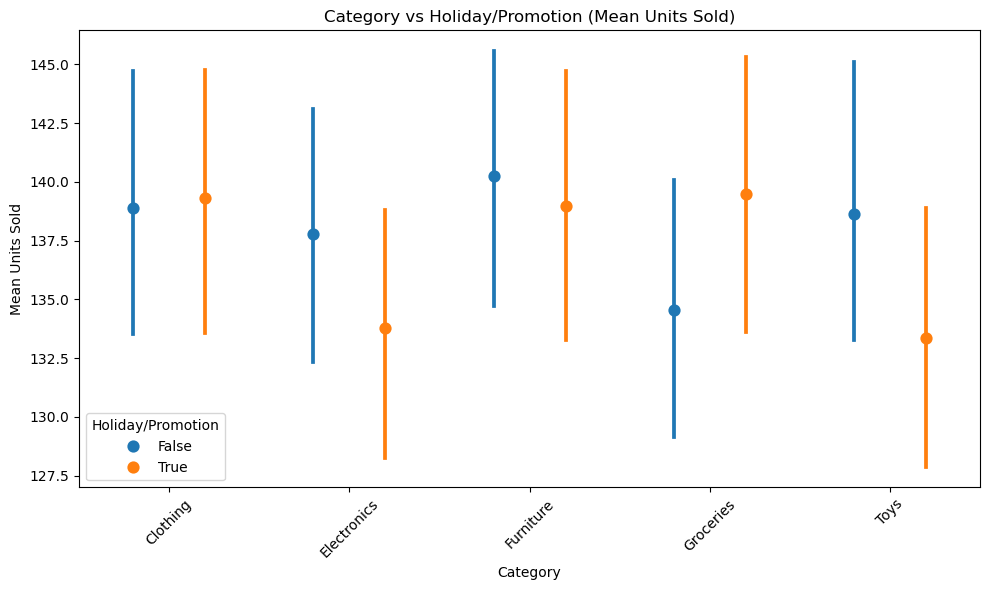

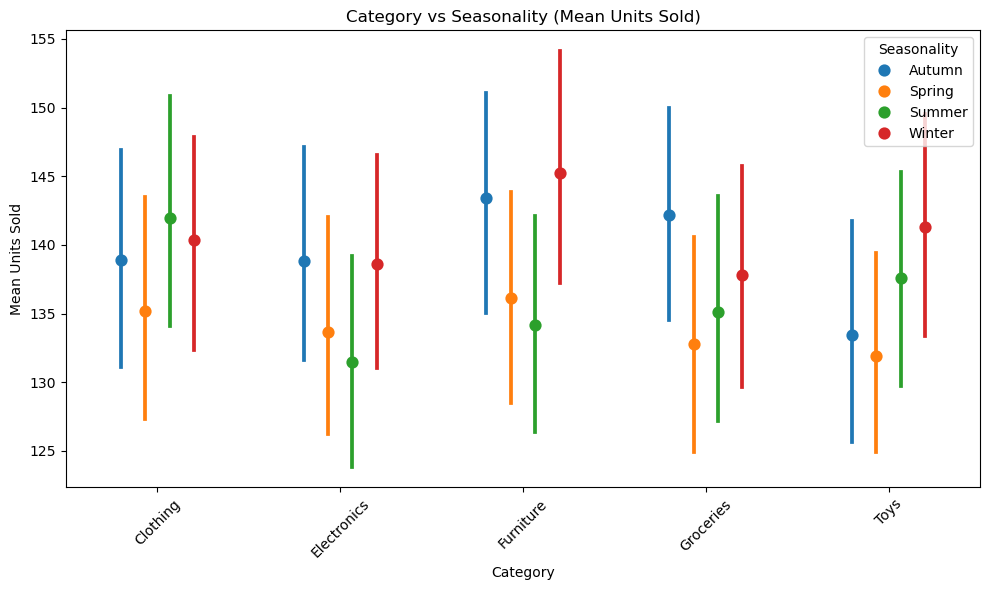

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

store5_df = df[df["Store ID"] == "S005"].copy()
categorical_cols = store5_df.select_dtypes(include=['category', 'bool']).columns.tolist()
ref_col = 'Category'

def plot_categorical_interactions(ref_col):
    for col in categorical_cols:
        if col == ref_col:
            continue  # skip the reference column

        plt.figure(figsize=(10,6))
        sns.pointplot(
            data=store5_df,
            x=ref_col,
            y="Units Sold",
            hue=col,
            dodge=0.4, 
            linestyle="none", # no lines between categories
            errorbar="ci"   # confidence interval
        )

        plt.title(f"{ref_col} vs {col} (Mean Units Sold)")
        plt.ylabel("Mean Units Sold")
        plt.xlabel(ref_col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

plot_categorical_interactions(ref_col)


C:\Users\Cybertronia\AppData\Local\Temp\ipykernel_16908\3335502947.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=store5_df, x="Category", y="Units Sold", palette="Set2")


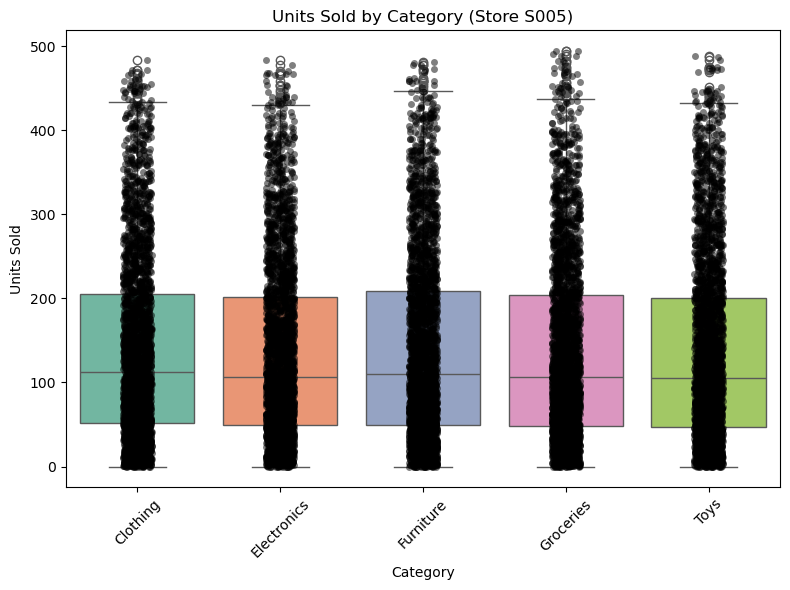

ANOVA F-stat: 0.7696561181722216 p-value: 0.5447738438888269


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

store5_df = df[df["Store ID"] == "S005"].copy()

plt.figure(figsize=(8,6))
sns.boxplot(data=store5_df, x="Category", y="Units Sold", palette="Set2")
sns.stripplot(data=store5_df, x="Category", y="Units Sold", color="black", alpha=0.5, jitter=True)

plt.title("Units Sold by Category (Store S005)")
plt.ylabel("Units Sold")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from scipy.stats import f_oneway

groups = [store5_df.loc[store5_df["Category"]==cat, "Units Sold"] for cat in store5_df["Category"].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA F-stat:", f_stat, "p-value:", p_val)


**Analysis of Units Sold by Category (Store S005)**

- A visual inspection using a sina/strip plot suggests that *Clothing* occasionally achieves higher units sold compared to other categories.
- However, numerical analysis shows minimal deviation from category means, and ANOVA confirms this:
  - F-statistic = 0.77
  - p-value = 0.545
- **Interpretation:** There is no statistically significant effect of category on units sold. Differences observed in plots are due to random variation rather than systematic category influence.


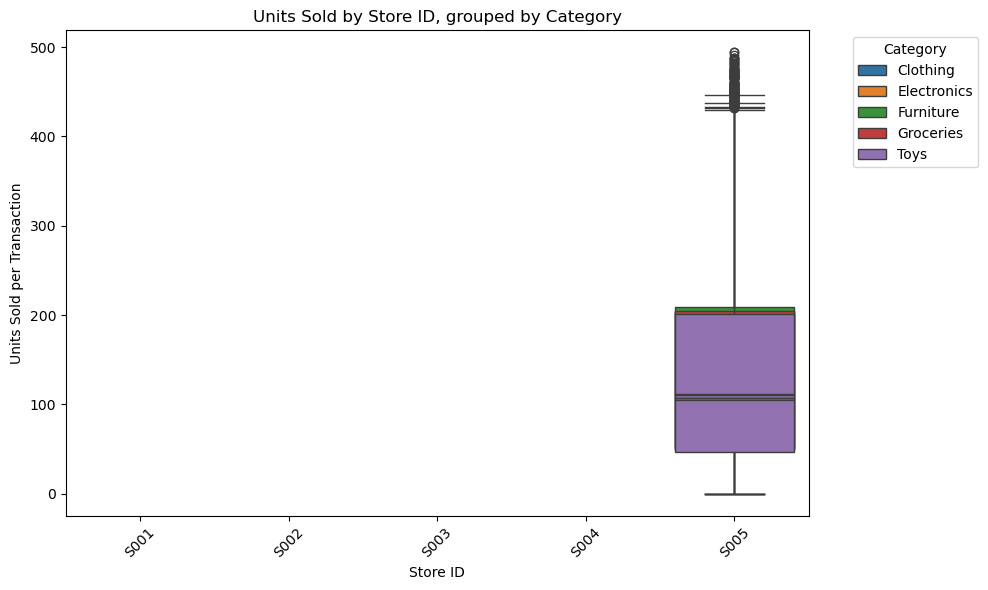

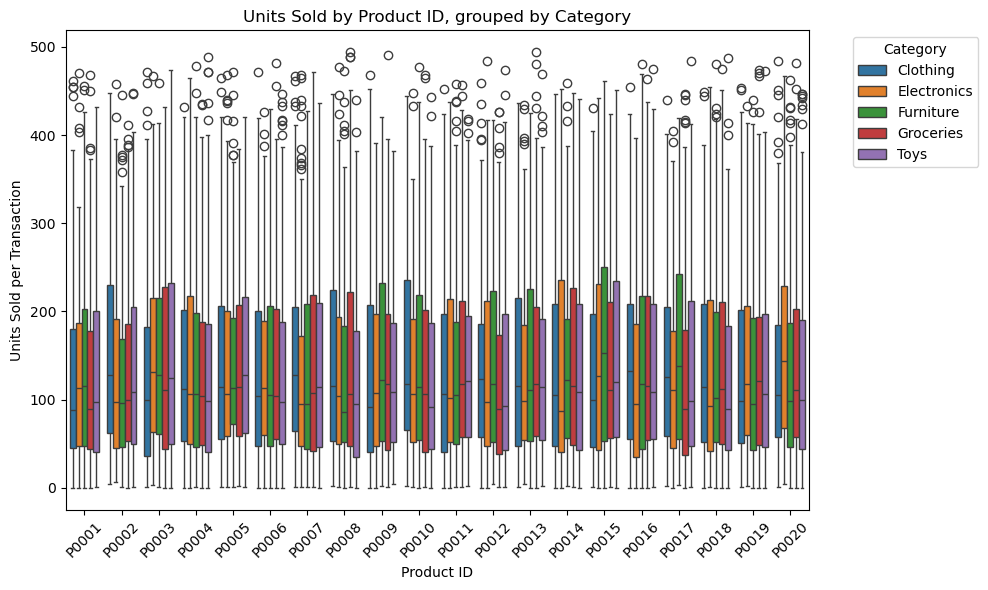

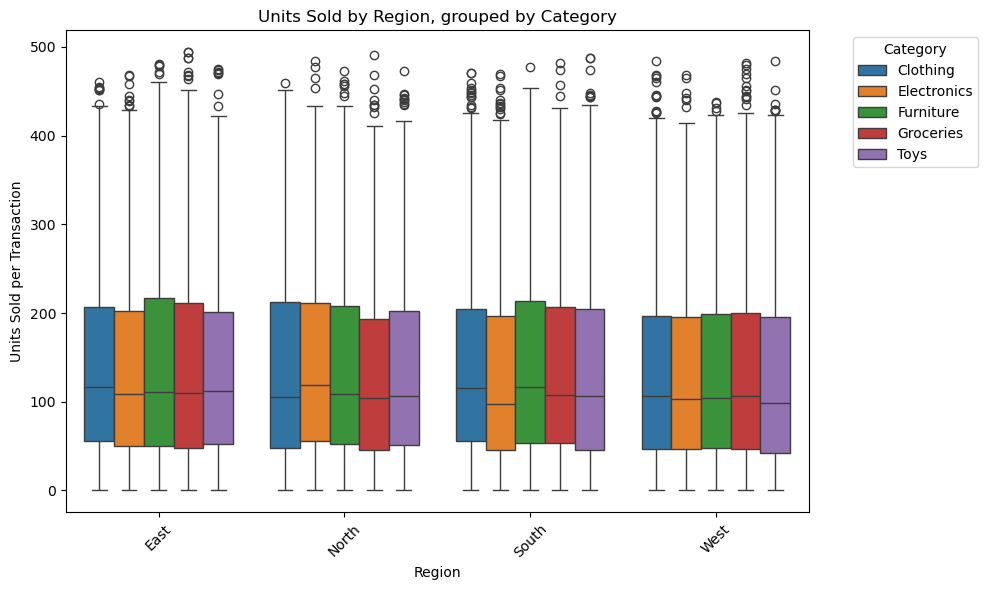

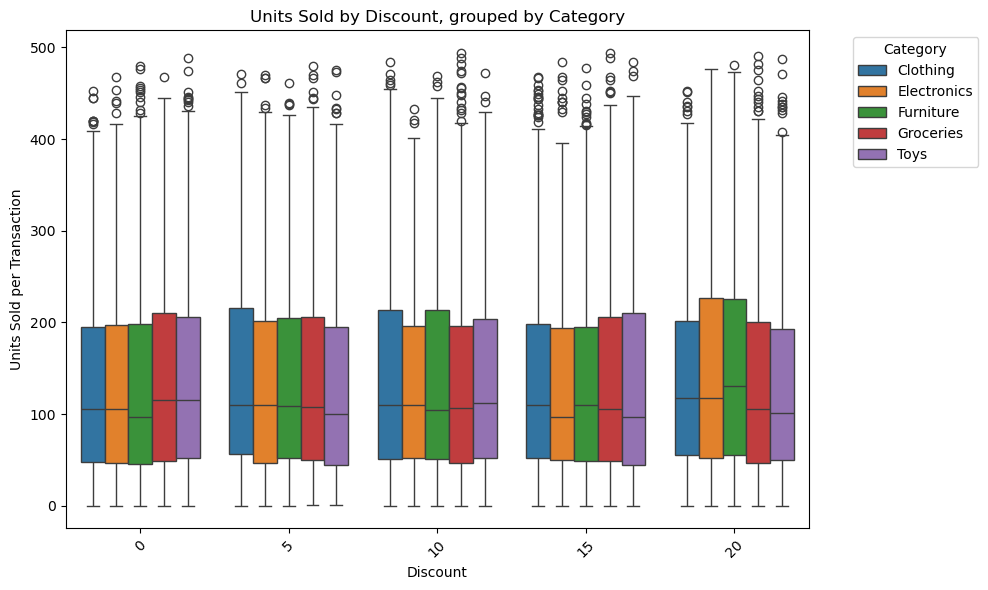

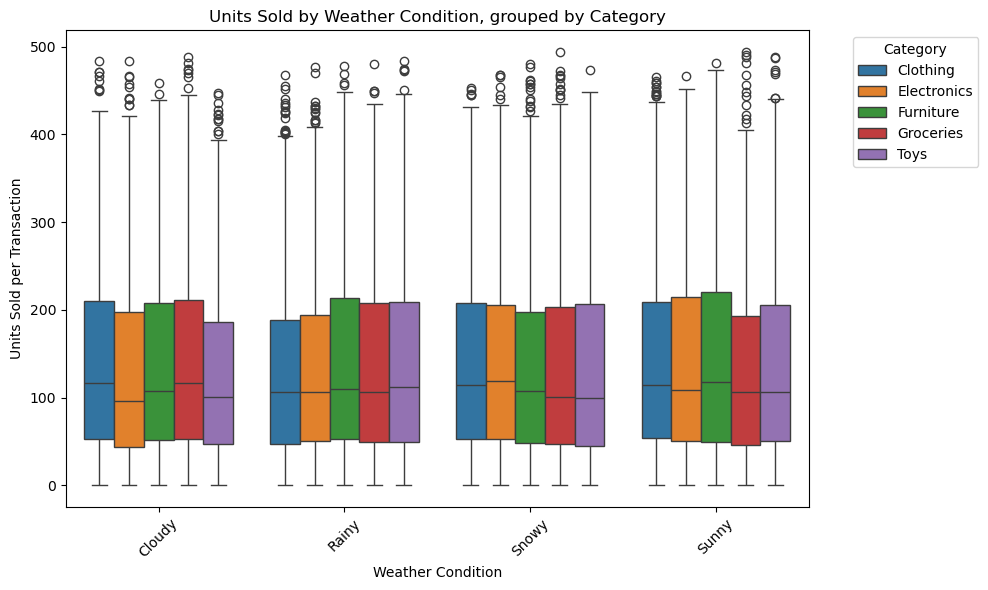

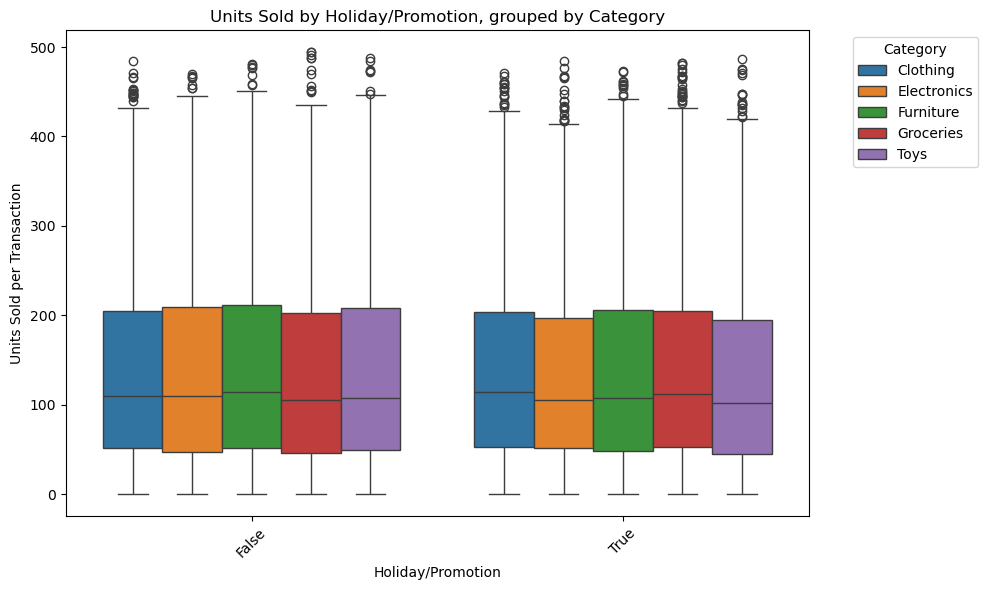

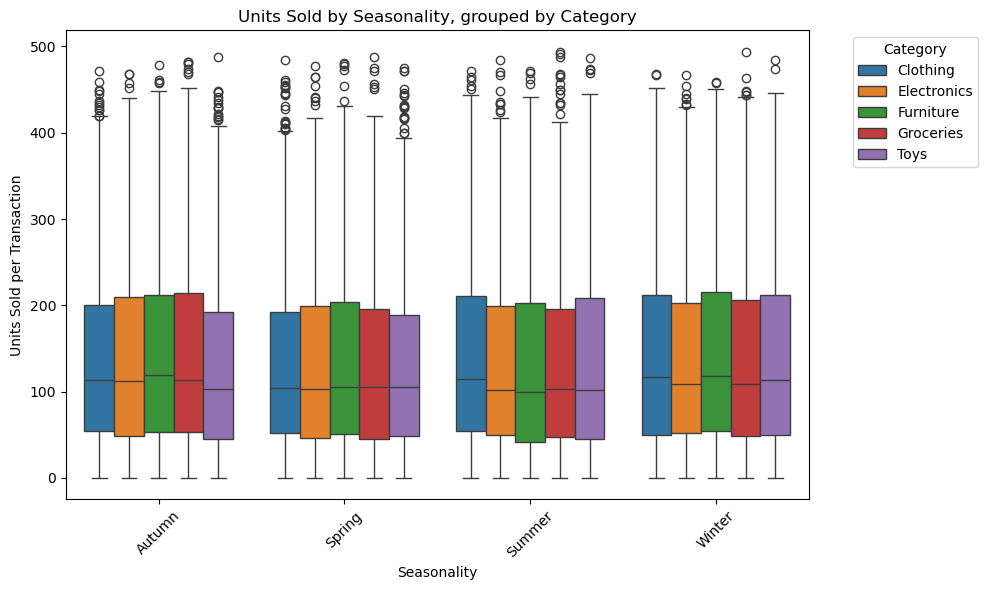

In [24]:
categorical_cols = store5_df.select_dtypes(include=['category', 'bool']).columns.tolist()
ref_col = 'Category'

for col in categorical_cols:
    if col == ref_col:
        continue

    plt.figure(figsize=(10,6))
    sns.boxplot(x=col, y='Units Sold', hue=ref_col, data=store5_df)
    plt.title(f'Units Sold by {col}, grouped by {ref_col}')
    plt.ylabel("Units Sold per Transaction")
    plt.xticks(rotation=45)
    plt.legend(title=ref_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


ct_mean Category x Store ID aggfunc=mean Store ID     S005
Category         
Clothing      0.0
Electronics   0.0
Furniture     0.0
Groceries     0.0
Toys          0.0


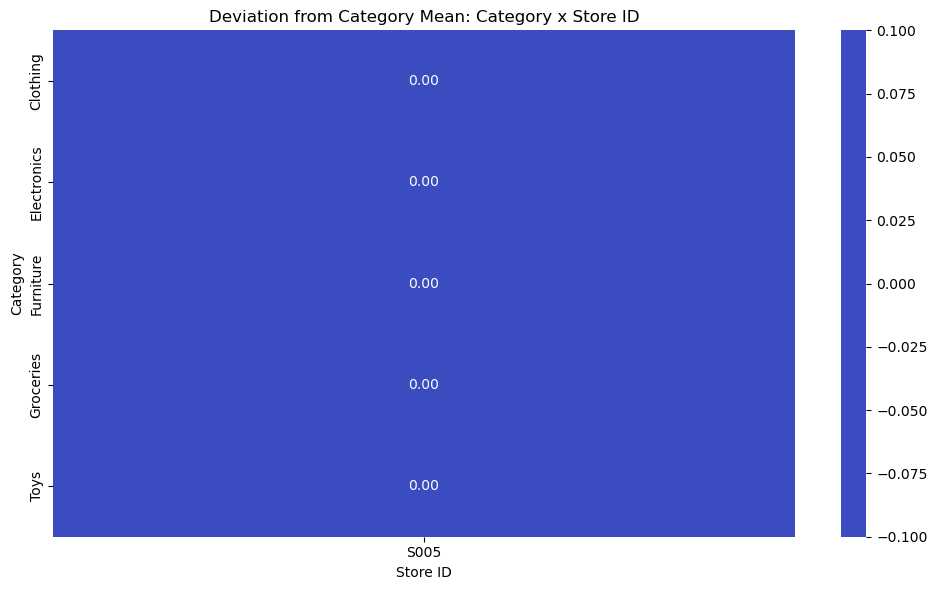

ct_mean Category x Product ID aggfunc=mean Product ID       P0001      P0002      P0003      P0004      P0005     P0006  \
Category                                                                       
Clothing    -16.855048  16.477429  -9.076018   1.006011   1.713171 -2.002734   
Electronics  -7.338019  -9.363336  16.121369   4.523894   2.450474 -4.212598   
Furniture    -2.015129 -19.129338   5.987883  -1.977812   3.795934 -3.134853   
Groceries    -9.779127  -5.359208   5.036476 -12.706171   2.020972  1.369809   
Toys          1.861974   2.086264  14.220007  -3.075133  11.325533 -3.506400   

Product ID      P0007      P0008     P0009      P0010      P0011      P0012  \
Category                                                                      
Clothing     9.582452   4.935140 -2.464897  13.930278  -4.964497   4.238366   
Electronics -8.917713  -1.137196 -3.211327  -8.736958  -1.863871   0.521212   
Furniture   -4.587769 -16.243634  6.926002  11.735017  -9.298964   3.428285   
G

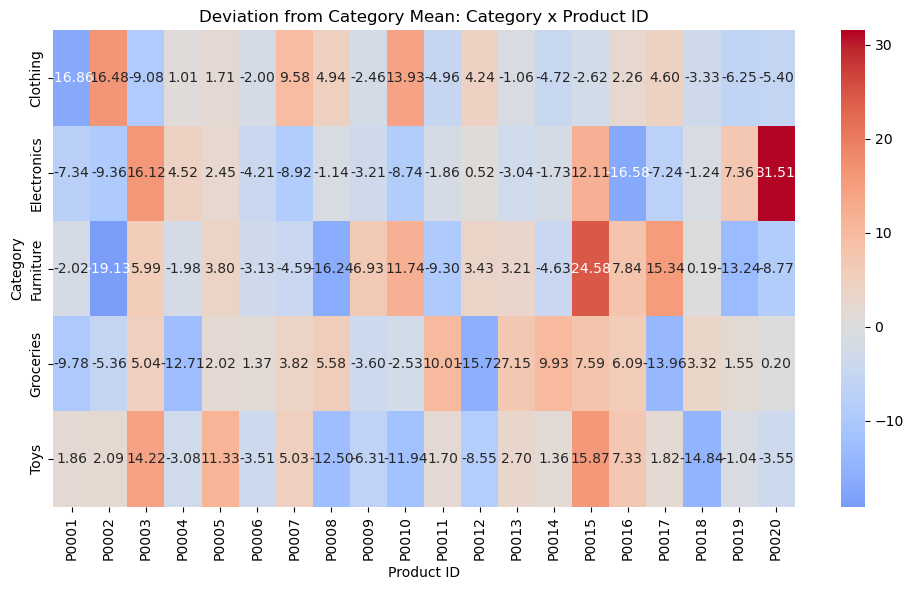

ct_mean Category x Region aggfunc=mean Region           East     North     South      West
Category                                           
Clothing     1.737392 -0.327415  2.300959 -3.710936
Electronics  0.244837  5.782302 -0.714804 -5.312336
Furniture    3.798928  0.163219  4.255953 -8.218100
Groceries    3.664459 -5.457900  1.784130  0.009311
Toys         2.326539  1.147717 -1.207178 -2.267079


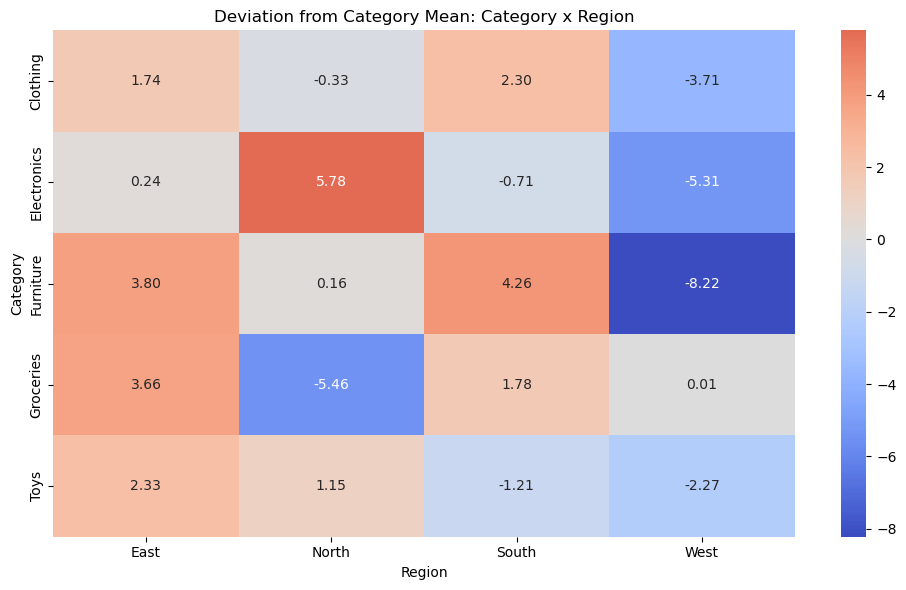

ct_mean Category x Discount aggfunc=mean Discount            0         5        10        15         20
Category                                                      
Clothing    -5.567996  2.748136  1.530043 -0.593852   1.883669
Electronics -2.623360 -1.837417 -3.163208 -4.362642  11.986626
Furniture   -5.463175  0.628654 -0.336792 -6.830408  12.001722
Groceries    1.585709  0.655842 -1.207255  2.068040  -3.102336
Toys         7.373405 -4.123387  4.043510 -1.797943  -5.495585


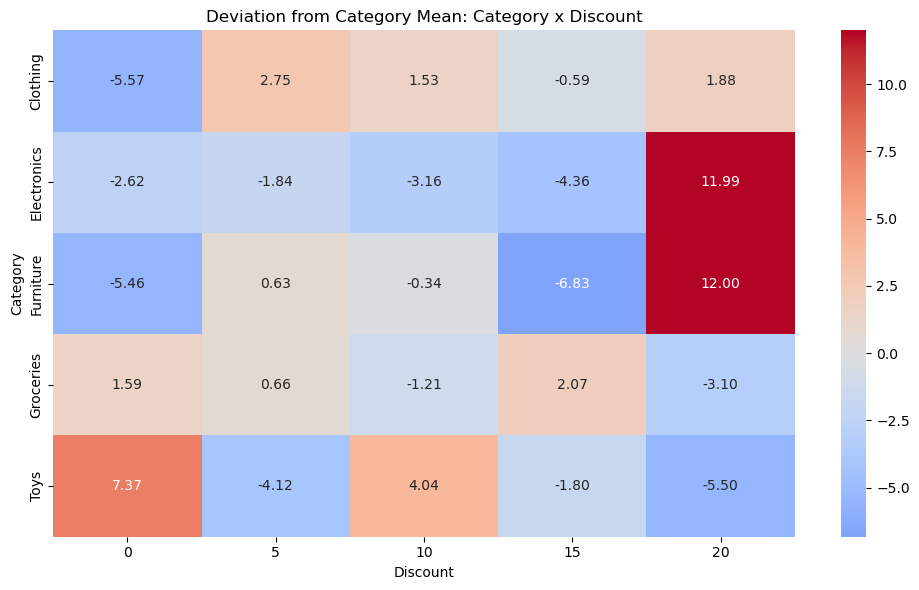

ct_mean Category x Weather Condition aggfunc=mean Weather Condition    Cloudy     Rainy     Snowy     Sunny
Category                                                 
Clothing           1.556644 -6.467421  0.443124  4.467653
Electronics       -5.938073 -4.349041  5.017768  5.269346
Furniture         -1.794912  1.221058 -4.242843  4.816697
Groceries          7.257450 -0.645024 -1.690308 -4.922118
Toys              -9.209195  3.438519  1.009384  4.761292


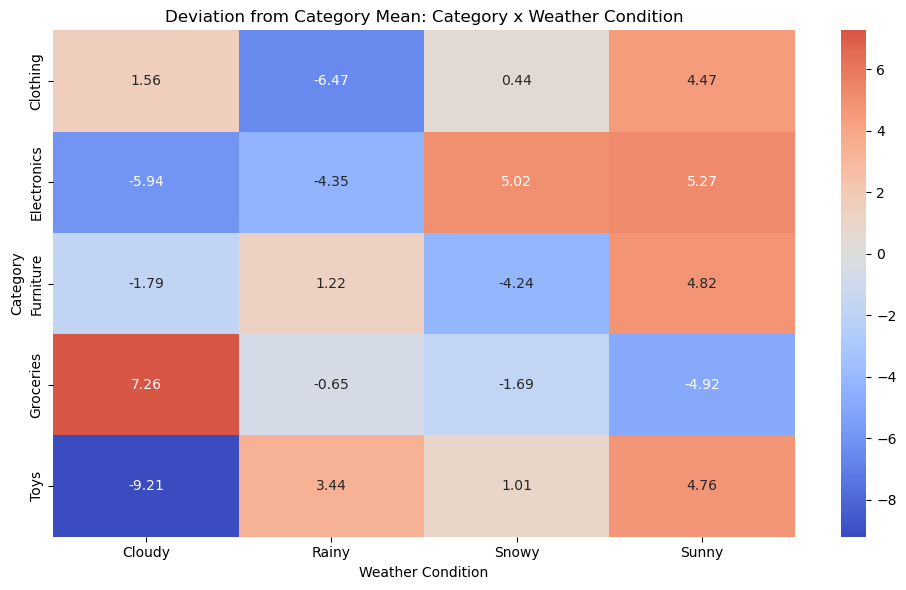

ct_mean Category x Holiday/Promotion aggfunc=mean Holiday/Promotion     False     True 
Category                             
Clothing          -0.208986  0.208986
Electronics        1.995771 -1.995771
Furniture          0.628168 -0.628168
Groceries         -2.457225  2.457225
Toys               2.641798 -2.641798


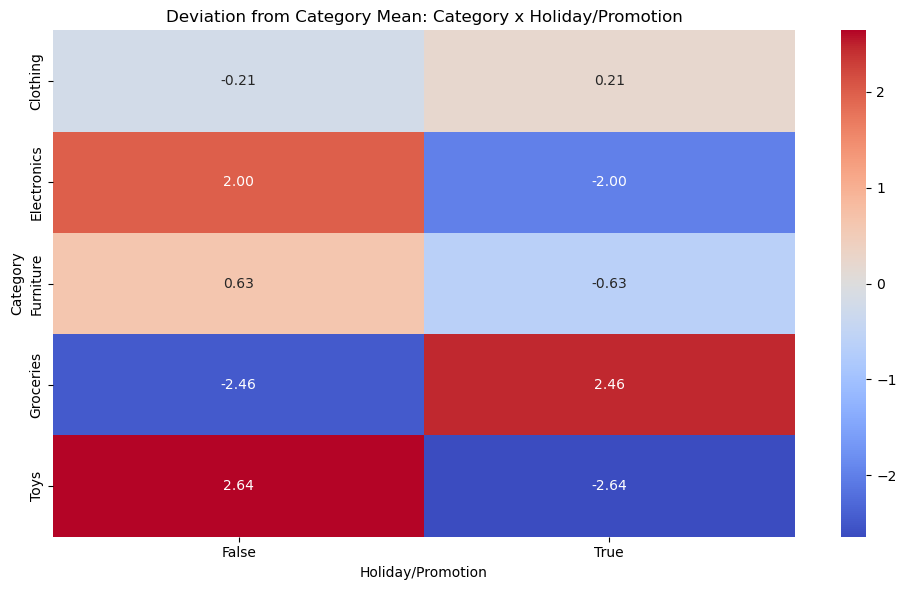

ct_mean Category x Seasonality aggfunc=mean Seasonality    Autumn    Spring    Summer    Winter
Category                                           
Clothing    -0.187273 -3.905925  2.861720  1.231478
Electronics  3.192418 -1.983003 -4.165072  2.955657
Furniture    3.691512 -3.584325 -5.584328  5.477141
Groceries    5.215347 -4.190963 -1.857699  0.833315
Toys        -2.600062 -4.123159  1.487156  5.236065


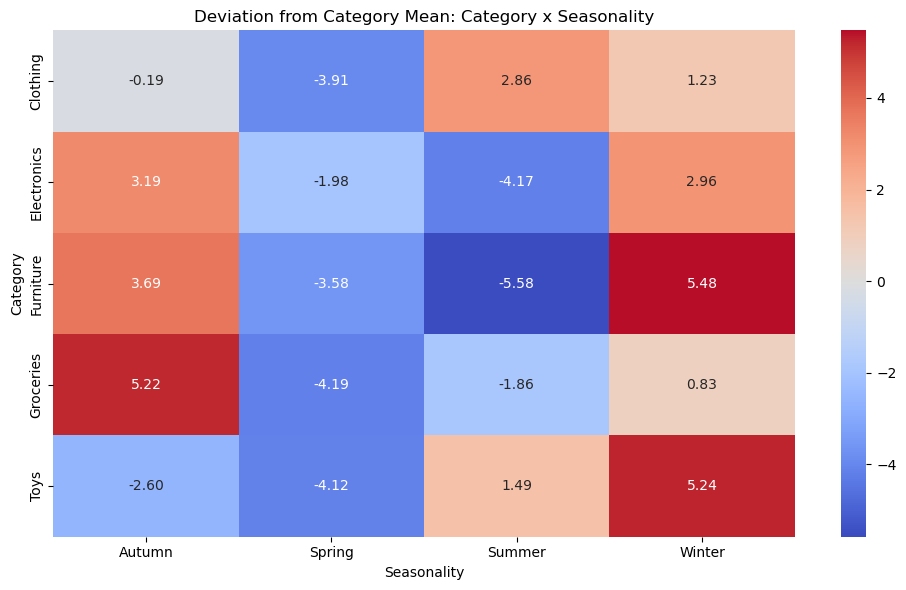

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = store5_df.select_dtypes(include=['category', 'bool']).columns.tolist()
ref_col = 'Category'

# Function to plot deviation heatmaps
def plot_deviation_heatmaps(ref_col):
    for col in categorical_cols:
        if col == ref_col:
            continue

        # Compute mean crosstab
        ct_mean = pd.crosstab(store5_df[ref_col], store5_df[col], values=store5_df["Units Sold"], aggfunc="mean")
        # Compute deviation from row mean
        ct_dev = ct_mean - ct_mean.mean(axis=1).values[:, None]
        print("ct_mean",ref_col,"x",col,"aggfunc=mean",ct_dev)
        # Plot heatmap
        plt.figure(figsize=(10,6))
        sns.heatmap(ct_dev, annot=True, fmt=".2f", cmap="coolwarm", center=0)
        plt.title(f"Deviation from Category Mean: {ref_col} x {col}")
        plt.ylabel(ref_col)
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()

plot_deviation_heatmaps(ref_col)


In [26]:
def plot_categorical_interactions(ref_col):
    for col in categorical_cols:
        if col == ref_col:
            continue  # skip the reference column

        # Crosstab with sum aggregation
        ctSum = pd.crosstab(store5_df[ref_col], store5_df[col], values=store5_df["Units Sold"], aggfunc="sum")
        print(f"{ref_col} x {col} (sum)")
        print(ctSum, "\n")

        # Crosstab with mean aggregation
        ctMean = pd.crosstab(store5_df[ref_col], store5_df[col], values=store5_df["Units Sold"], aggfunc="mean")
        print(f"{ref_col} x {col} (mean)")
        print(ctMean, "\n")

        # Row-wise deviation from mean
        ct_dev = ctMean - ctMean.mean(axis=1).values[:, None]
        print(f"{ref_col} x {col} deviation from row mean")
        print(ct_dev, "\n")


plot_categorical_interactions("Category")

Category x Store ID (sum)
Store ID     S001  S002  S003  S004    S005
Category                                   
Clothing        0     0     0     0  403240
Electronics     0     0     0     0  390545
Furniture       0     0     0     0  415620
Groceries       0     0     0     0  394936
Toys            0     0     0     0  405835 

Category x Store ID (mean)
Store ID           S005
Category               
Clothing     139.096240
Electronics  135.747306
Furniture    139.610346
Groceries    136.987860
Toys         136.003686 

Category x Store ID deviation from row mean
Store ID     S005
Category         
Clothing      0.0
Electronics   0.0
Furniture     0.0
Groceries     0.0
Toys          0.0 

Category x Product ID (sum)
Product ID   P0001  P0002  P0003  P0004  P0005  P0006  P0007  P0008  P0009  \
Category                                                                     
Clothing     17601  22712  15861  18632  21542  18506  21408  22323  24045   
Electronics  17124  16221  21614 

# 📊 Analysis Summary of Category-Level Cross-Tab Aggregations

Below is an analytical interpretation of the provided cross-tabulations, focusing on **Category × Store**, **Product**, **Region**, **Discount**, **Weather**, **Holiday/Promotion**, and **Seasonality** interactions.

---

## 🏪 1. Category × Store ID

### **Key Observations**

* **Store S005 is the only store with non-zero sales across all categories**.
  All other stores show zeros, suggesting:

  * either **S005 is the only active store** in the subset,
  * or the dataset is **filtered**, and S005 is the only relevant segment.
* Category averages for S005 are tightly clustered (~135–140 units), indicating:

  * **uniform performance across categories**
  * no extreme outliers at the category level.

---

## 📦 2. Category × Product

### **Key Observations**

* When examining deviation from row means:

  * Each category shows **strong variation across Product IDs**, meaning product-level behavior matters significantly more than category-level behavior.
  * Some products consistently perform above/below their category averages—for example:

    * Electronics: **P0020** is significantly above mean (+31.5).
    * Furniture: **P0015** is strongly above mean (+24.6).
    * Groceries: some products like **P0012** drop far below mean (–15.7).
* This implies:

  * **Product-specific demand patterns dominate category-level demand.**
  * Category alone is not sufficient to explain variability; product granularity is essential.

---

## 🌍 3. Category × Region

### **Key Observations**

* Deviation matrices show:

  * Clothing performs slightly better in **East** and **South**, slightly worse in **West**.
  * Electronics spike in **North**, decline in **West**.
  * Furniture shows the **strongest regional contrast**, performing comparatively low in West.
* Overall pattern:

  * **Geography meaningfully influences demand**, and its effect differs by category.

---

## 💸 4. Category × Discount

### **Key Observations**

* Discount responsiveness varies dramatically by category:

  * **Electronics and Furniture** show **large positive deviations at 20% discount**, implying they respond strongly to larger promotions.
  * **Groceries and Clothing** show mixed/noisy patterns—discounts have **less consistent impact**.
  * Toys show a **negative deviation** at higher discount levels.
* Takeaway:

  * **Promotions are not universally effective**; category-specific discount strategies are necessary.

---

## ☀️ 5. Category × Weather

### **Key Observations**

* Clothing: stronger on **Sunny** days, weaker on **Rainy** days.
* Electronics: performs best in **Sunny** and **Snowy** conditions.
* Groceries: highest in **Cloudy**, lowest in **Sunny**.
* Toys: weakest in **Cloudy** but better in **Sunny** and **Rainy**.
* Interpretation:

  * **Weather is a non-negligible driver**, especially for Clothing and Groceries.

---

## 🎉 6. Category × Holiday/Promotion

### **Key Observations**

* Categories flip direction between holiday vs non-holiday consistently:

  * Clothing slightly ↑ during holidays.
  * Electronics ↓ during holidays.
  * Groceries ↑ during holidays.
  * Toys ↓ during holidays.
* Consistent sign flips show:

  * **Holiday periods systematically shift demand patterns**, but the direction differs by category.

---

## ❄️ 7. Category × Seasonality

### **Key Observations**

* Clothing: peaks in **Summer**, dips in **Spring**.
* Electronics: peaks in **Autumn/Winter**, lowest in **Summer**.
* Furniture: highest in **Winter**, lowest in **Summer**.
* Groceries: strongest in **Autumn**, weakest in **Spring**.
* Toys: strongest in **Winter** (holiday effect), lowest in **Spring**.
* Conclusion:

  * **Seasonality is one of the strongest macro-level drivers** across all categories.

---

# ✅ Overall Insights

1. **Store S005 dominates the dataset**—the behavior of this store drives all category trends.
2. **Product-level variance is significantly larger than category-level variance**, indicating forecasting should be done at the product level.
3. **Regional, seasonal, and weather factors all show structured patterns**, making them valuable features for modeling.
4. **Discounts work very differently by category**—some categories respond, others do not.
5. **Holiday effects flip sign predictably**, suggesting clear behavioral differences between festive and regular periods.


# 1D Kalman Filter

# Linear Regression, Multivariable LR, L1,L2

Could use F from Linear Regression coeff or simply initialize it with 1

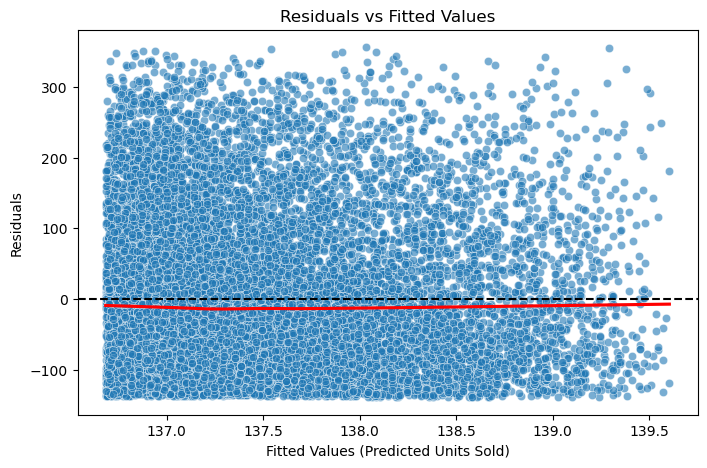

F = [[0.00590705]] Intercept = [136.68519248]
R² = 3.489004188084177e-05


In [27]:
store5_df = df[df["Store ID"] == "S005"]
import numpy as np
from sklearn.linear_model import LinearRegression


# Previous day's demand as predictor
X_prev = store5_df['Units Sold'].shift(1).dropna().values.reshape(-1,1)
# Current day's demand as response
X_now = store5_df['Units Sold'].iloc[1:].values.reshape(-1,1)

reg = LinearRegression().fit(X_prev, X_now)

# Fitted values
y_pred = reg.predict(X_prev)

# Residuals (wt)
residuals = X_now - y_pred

# Plot residuals vs fitted values
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred.flatten(), y=residuals.flatten(), alpha=0.6)
sns.regplot(x=y_pred.flatten(), y=residuals.flatten(), lowess=True, color='red', scatter=False)

plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Fitted Values (Predicted Units Sold)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

print("F =", reg.coef_, "Intercept =", reg.intercept_)
print("R² =", reg.score(X_prev, X_now))

In [28]:
corr = np.corrcoef(X_prev.flatten(), residuals.flatten())[0,1]
print("Correlation between lagged units sold and residuals:", corr)

# 2) scale/variance checks
units = store5_df['Units Sold'].values
print("Var(units):", np.var(units))
print("Std(units):", np.std(units))
print("Var(diff):", np.var(np.diff(units)))
print("Std(diff):", np.std(np.diff(units)))

Correlation between lagged units sold and residuals: -7.429895401917076e-18
Var(units): 11990.678702150793
Std(units): 109.50195752657024
Var(diff): 23840.06911434795
Std(diff): 154.4022963376774


* Corr is 0, lagged sales don't help predict the residual, no need to tweak KF's F using regression, just initialize it with 1
*  std(diff)>std(units) -> series of changes is more volatile than the original units sold

ACF of diffs nlag20 (first 10): [ 1.         -0.49790827 -0.00468002  0.00144644  0.00216761  0.0055514
 -0.01854204  0.01983998 -0.00412325 -0.00676256]


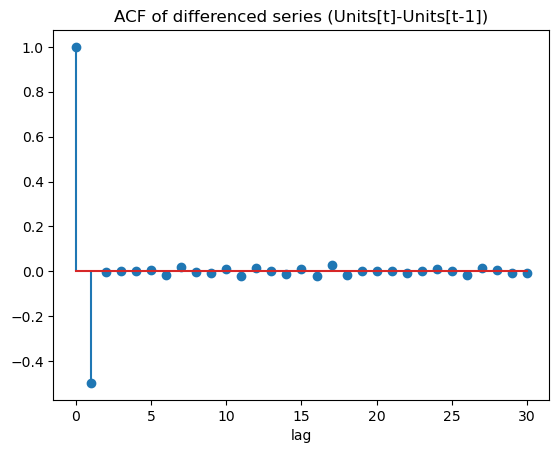

ACF of diffs nlag20 (first 10): [ 1.         -0.49790827 -0.00468002  0.00144644  0.00216761  0.0055514
 -0.01854204  0.01983998 -0.00412325 -0.00676256]


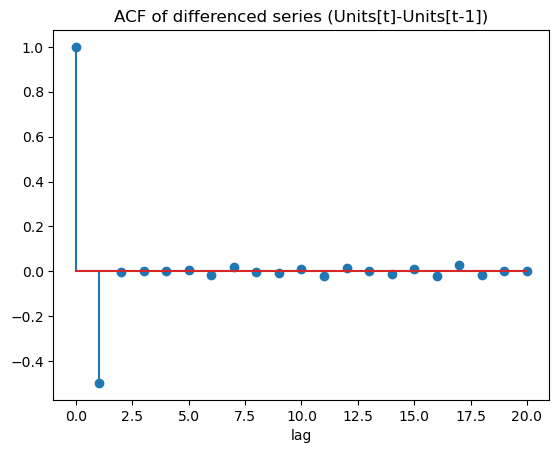

ACF of diffs nlag7 (first 10): [ 1.         -0.49790827 -0.00468002  0.00144644  0.00216761  0.0055514
 -0.01854204  0.01983998]


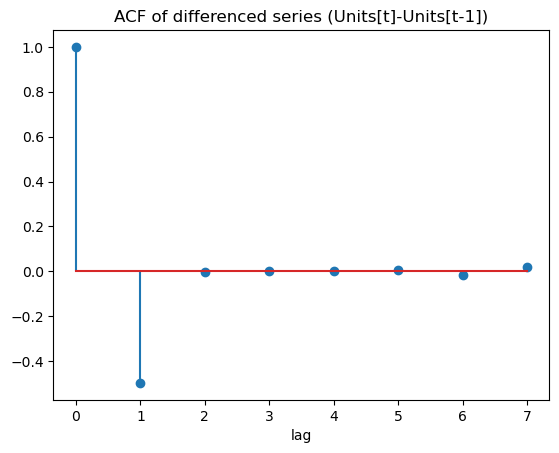

ACF of diffs nlag1 (first 10): [ 1.         -0.49790827]


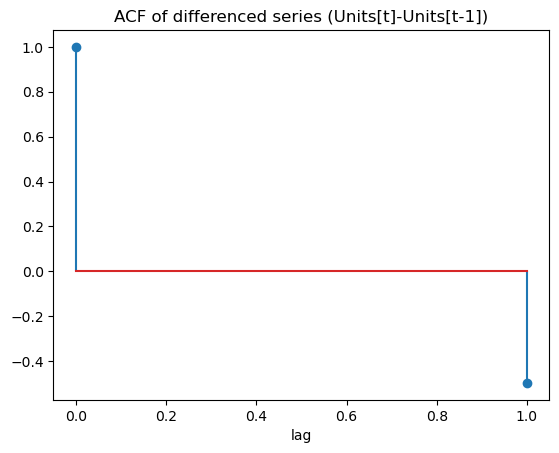

In [29]:
from statsmodels.tsa.stattools import acf
# 3) ACF of diffs (helps check whiteness)
lag_acf = acf(np.diff(units), nlags=30, fft=True)
print("ACF of diffs nlag20 (first 10):", lag_acf[:10])
plt.figure()
plt.stem(lag_acf)
plt.title('ACF of differenced series (Units[t]-Units[t-1])')
plt.xlabel('lag')
plt.show()

lag_acf = acf(np.diff(units), nlags=20, fft=True)
print("ACF of diffs nlag20 (first 10):", lag_acf[:10])
plt.figure()
plt.stem(lag_acf)
plt.title('ACF of differenced series (Units[t]-Units[t-1])')
plt.xlabel('lag')
plt.show()
lag_acf = acf(np.diff(units), nlags=7, fft=True)
print("ACF of diffs nlag7 (first 10):", lag_acf[:10])
plt.figure()
plt.stem(lag_acf)
plt.title('ACF of differenced series (Units[t]-Units[t-1])')
plt.xlabel('lag')
plt.show()
lag_acf = acf(np.diff(units), nlags=1, fft=True)
print("ACF of diffs nlag1 (first 10):", lag_acf[:10])
plt.figure()
plt.stem(lag_acf)
plt.title('ACF of differenced series (Units[t]-Units[t-1])')
plt.xlabel('lag')
plt.show()

For a 1-day ahead forecast, only yesterday’s change matters.

Longer lags do not improve prediction — adding them just adds noise.

# Baseline KF



In [30]:
from filterpy.kalman import KalmanFilter
# simple KF params (random-walk F=1 recommended baseline)
#units = store5_df['Units Sold'].values
H = np.array([[1]])
F = np.array([[1.0]])
# sensible initial choices from data:
P0 = np.array([[np.var(units)]])
Q0 = np.array([[np.var(np.diff(units))]])    # process noise approx day-to-day
R0 = np.array([[np.var(units - store5_df['Demand Forecast'].values) ]]) 
z_meas = units.reshape(-1,1)

kf = KalmanFilter(dim_x=1, dim_z=1)
kf.x = np.array([[z_meas[0,0]]])
kf.P = P0.copy()
kf.F = F
kf.H = H
kf.Q = Q0
kf.R = R0

innovations = []
S_list = []
x_prior_list = []
x_post_list = []
P_values = []
K_values = []
x_estimates = []

for z in z_meas:
    kf.predict()
    x_prior = kf.x.copy() #xt|t-1
    P_prior = kf.P.copy() #Pt|t-1
    P_values.append(kf.P[0,0]) #diagonal entries (variance of predicted state estimate (i.e latent demand)
    innov = z.reshape(-1,1) - (kf.H @ x_prior) # residual y=z-xt|t-1, how far off the predicted measurement is from actual measurement
    S = (kf.H @ P_prior @ kf.H.T) + kf.R #uncertainity in residual, how confident we are about the difference
    kf.update(z)
    x_estimates.append(kf.x[0,0]) #xt|t
    K_values.append(kf.K[0,0]) # kalman gain
    innovations.append(innov.item()) #innovations
    S_list.append(S.item()) #innov cov
    x_prior_list.append(x_prior.item()) ##xt|t-1
    x_post_list.append(kf.x.item()) #xt|t

x_estimates = np.array(x_estimates)
K_values = np.array(K_values)
innovations = np.array(innovations)
S_arr = np.array(S_list)
NIS = (innovations**2) / S_arr
P_values = np.array(P_values)

print("R",kf.R,"Q",kf.Q)
print("Kalman Gain",K_values)
print("P ",P_values)
print("Mean innovation:", innovations.mean())
print("Std innovation:", innovations.std())
# should be as close to 1 as possible
print("Mean NIS:", NIS.mean())
# should be as close to sqroot(2)/1.414 as possible
print("STD NIS:",NIS.std())
errors = x_estimates - units  # difference at each time step

# Mean Squared Error
mse = np.mean(errors**2)
print("MSE:", mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("RMSE:", rmse)

R [[74.48979937]] Q [[23840.06911435]]
Kalman Gain [0.99792538 0.99689482 0.99689481 ... 0.99689481 0.99689481 0.99689481]
P  [35830.7478165  23914.40437553 23914.32760959 ... 23914.32760885
 23914.32760885 23914.32760885]
Mean innovation: -0.006463391698189403
Std innovation: 154.15885393669504
Mean NIS: 0.9906679384999783
STD NIS: 1.401414311450167
MSE: 0.22914631531602495
RMSE: 0.4786922971137356


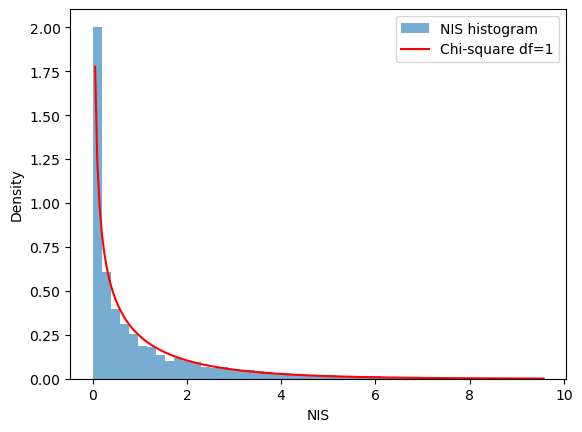

In [31]:
from scipy.stats import chi2
import matplotlib.pyplot as plt

plt.hist(NIS, bins=50, density=True, alpha=0.6, label="NIS histogram")
x = np.linspace(0, max(NIS), 200)
plt.plot(x, chi2.pdf(x, df=1), 'r-', label="Chi-square df=1")
plt.xlabel("NIS")
plt.ylabel("Density")
plt.legend()
plt.show()


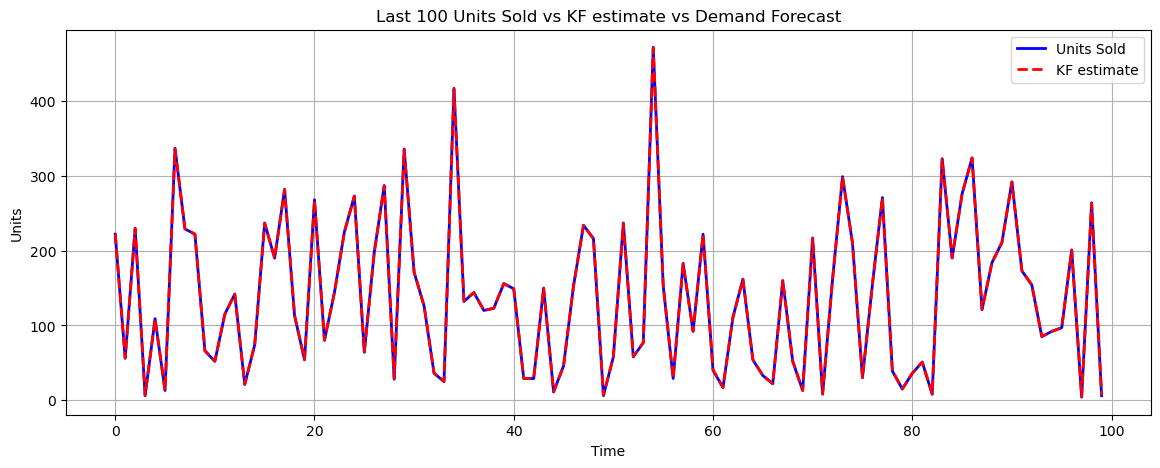

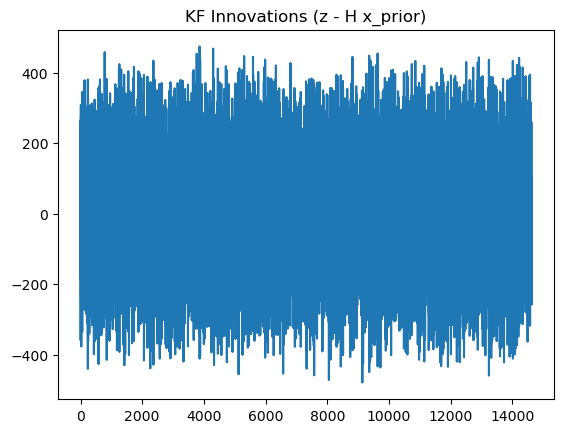

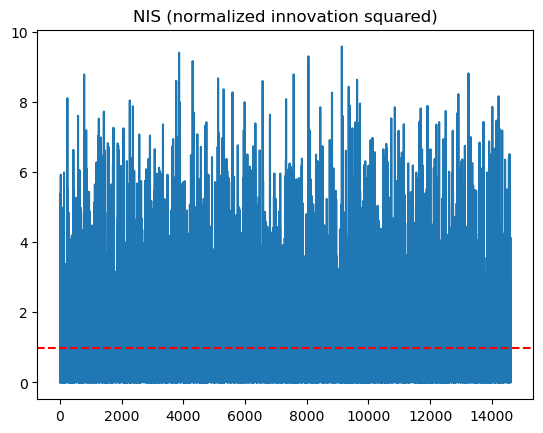

In [32]:
n = 100  # last 100 points
plt.figure(figsize=(14,5))
plt.plot(units[-n:], label='Units Sold', color='blue', linewidth=2)
plt.plot(x_post_list[-n:], label='KF estimate', color='red', linewidth=2,linestyle='--')
# plt.plot(df['Demand Forecast'].values[-n:], label='Demand Forecast', color='green', linestyle='--', linewidth=2)
plt.legend()
plt.title('Last 100 Units Sold vs KF estimate vs Demand Forecast')
plt.xlabel('Time')
plt.ylabel('Units')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(innovations)
plt.title('KF Innovations (z - H x_prior)')
plt.show()

plt.figure()
plt.plot(NIS)
plt.title('NIS (normalized innovation squared)')
plt.axhline(y=np.mean(NIS), color='red', linestyle='--')
plt.show()

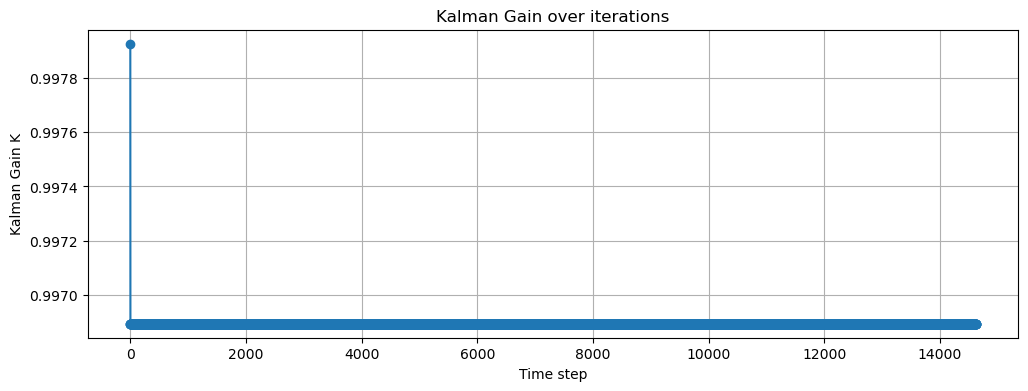

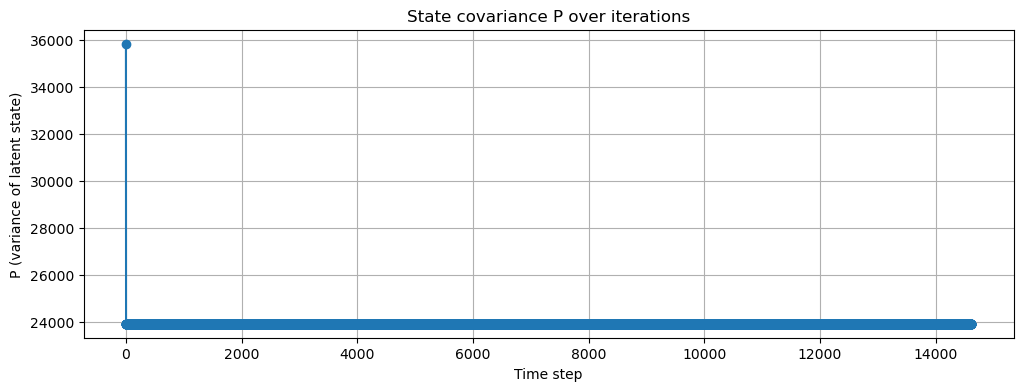

In [33]:
import matplotlib.pyplot as plt
import numpy as np

iterations = np.arange(len(x_estimates))

# Plot Kalman gain over iterations
plt.figure(figsize=(12,4))
plt.plot(iterations, K_values, marker='o', linestyle='-')
plt.title("Kalman Gain over iterations")
plt.xlabel("Time step")
plt.ylabel("Kalman Gain K")
plt.grid(True)
plt.show()

# Plot state covariance P over iterations
plt.figure(figsize=(12,4))
plt.plot(iterations, P_values, marker='o', linestyle='-')
plt.title("State covariance P over iterations")
plt.xlabel("Time step")
plt.ylabel("P (variance of latent state)")
plt.grid(True)
plt.show()


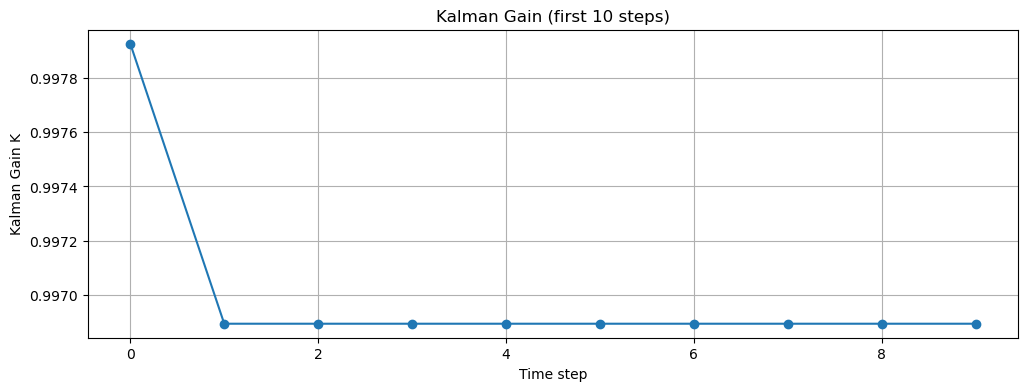

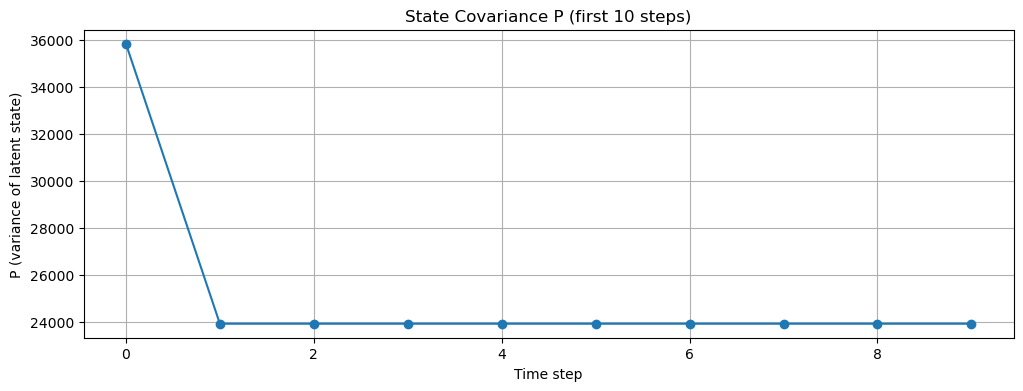

In [34]:
n_steps = 10  # first 10 steps
iterations = np.arange(n_steps)

# Kalman gain
plt.figure(figsize=(12,4))
plt.plot(iterations, K_values[:n_steps], marker='o', linestyle='-')
plt.title("Kalman Gain (first 10 steps)")
plt.xlabel("Time step")
plt.ylabel("Kalman Gain K")
plt.grid(True)
plt.show()

# State covariance P
plt.figure(figsize=(12,4))
plt.plot(iterations, P_values[:n_steps], marker='o', linestyle='-')
plt.title("State Covariance P (first 10 steps)")
plt.xlabel("Time step")
plt.ylabel("P (variance of latent state)")
plt.grid(True)
plt.show()


In [35]:
# import numpy as np
# from filterpy.kalman import KalmanFilter
# import itertools

# def run_kf(units, Q_val, R_val, P0_val=None):
#     H = np.array([[1]])
#     F = np.array([[1.0]])

#     P0 = np.array([[P0_val]]) if P0_val is not None else np.array([[np.var(units)]])

#     Q = np.array([[Q_val]])
#     R = np.array([[R_val]])

#     z_meas = units.reshape(-1,1)

#     kf = KalmanFilter(dim_x=1, dim_z=1)
#     kf.x = np.array([[z_meas[0,0]]])
#     kf.P = P0.copy()
#     kf.F = F
#     kf.H = H
#     kf.Q = Q
#     kf.R = R

#     x_estimates = []
#     innovations = []
#     S_list = []

#     for z in z_meas:
#         kf.predict()
#         x_prior = kf.x.copy()
#         P_prior = kf.P.copy()
#         innov = z.reshape(-1,1) - (kf.H @ x_prior)
#         S = (kf.H @ P_prior @ kf.H.T) + kf.R
#         kf.update(z)
#         x_estimates.append(kf.x[0,0])
#         innovations.append(innov.item())
#         S_list.append(S.item())

#     x_estimates = np.array(x_estimates)
#     innovations = np.array(innovations)
#     S_arr = np.array(S_list)
#     errors = x_estimates - units
#     mse = np.mean(errors**2)
#     rmse = np.sqrt(mse)
#     nis = np.mean((innovations**2) / S_arr)

#     return rmse, nis, x_estimates

# # Example grid search ranges
# Q_vals = np.linspace(0.1, 5*np.var(np.diff(units)), 5)
# R_vals = np.linspace(0.1, 5*np.var(units - df['Demand Forecast'].values), 5)
# P0_vals = [None]  # or try a few multiples of var(units)

# best_rmse = np.inf
# best_nis = np.inf
# best_params = None
# results = []

# for Q_val, R_val, P0_val in itertools.product(Q_vals, R_vals, P0_vals):
#     rmse, nis, _ = run_kf(units, Q_val, R_val, P0_val)
#     results.append({'Q': Q_val, 'R': R_val, 'P0': P0_val, 'RMSE': rmse, 'NIS': nis})
#     # Example optimization criterion: lowest RMSE
#     if rmse < best_rmse:
#         best_rmse = rmse
#         best_nis = nis
#         best_params = (Q_val, R_val, P0_val)

# print("Best parameters:")
# print("Q =", best_params[0], "R =", best_params[1], "P0 =", best_params[2])
# print("RMSE =", best_rmse, "Mean NIS =", best_nis)


# KF with exogenous inputs (control inputs)
We perform L1,L2 and simple Linear regression to try and gauge important variables and then use as control inputs.

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

#PREPARE 
df=store5_df.copy()
# Features and target
target = "Units Sold"
X = df.drop(columns=[target, "Date","Demand Forecast","Competitor Pricing"])  # drop date, can engineer if needed
y = df[target]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=["category", "bool"]).columns.tolist()
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Optional: Standardize numeric features for Lasso/Ridge
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(drop="first"), categorical_cols)  # drop first to avoid dummy trap
    ]
)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


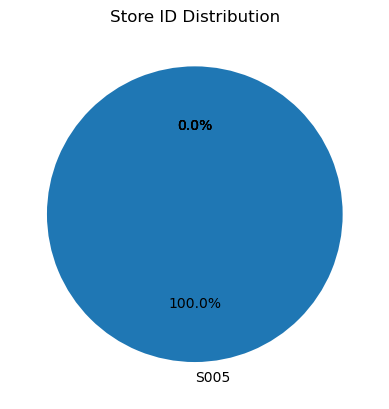

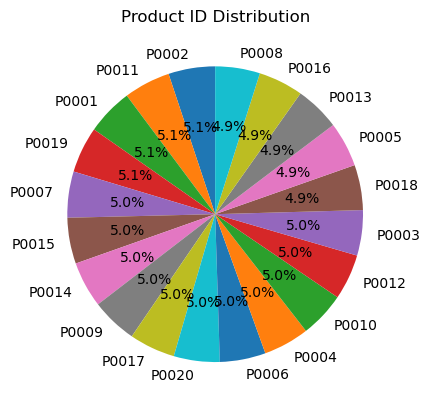

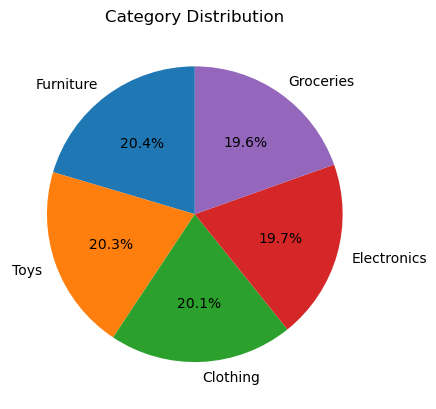

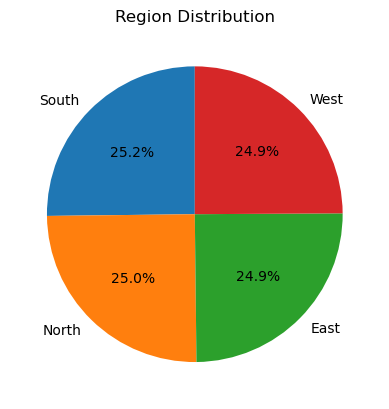

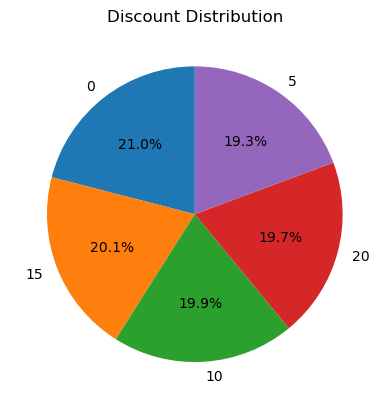

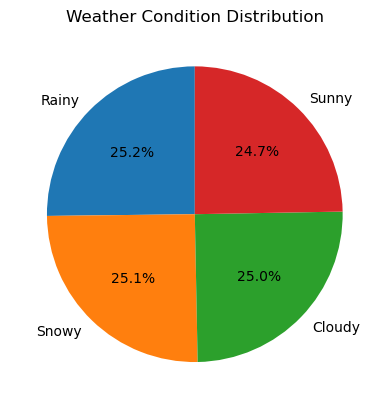

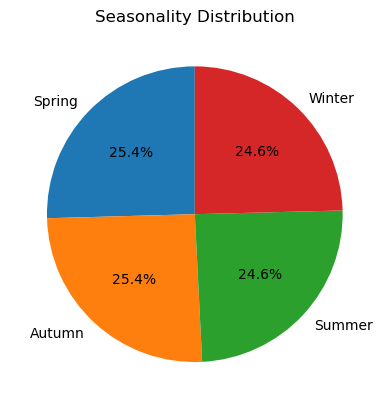

In [37]:
#checking if classes are also balanced in X_train
for col in X_train.select_dtypes("category").columns:
   X_train[col].value_counts().plot.pie(
    autopct='%1.1f%%',   # show percentages
    startangle=90,       # rotate start angle
    shadow=False,        # no shadow
    ylabel=''            # remove y-label
    )
   plt.title(f"{col} Distribution")
   plt.show()


In [38]:
lr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Fit
lr_pipeline.fit(X_train, y_train)

# Evaluate
y_pred = lr_pipeline.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))
reg = lr_pipeline.named_steps["regressor"]
# feature names after one-hot encoding
feature_names = numeric_cols + lr_pipeline.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out(categorical_cols).tolist()
coef_df = pd.DataFrame({"feature": feature_names, "coef": reg.coef_})
print(coef_df.sort_values(by="coef", key=abs, ascending=False))

Linear Regression MSE: 7468.660390421463
                    feature       coef
0           Inventory Level  65.205598
16         Product ID_P0015  14.568762
5          Product ID_P0004   6.745503
8          Product ID_P0007   6.419223
17         Product ID_P0016   6.214142
3          Product ID_P0002   5.367121
7          Product ID_P0006   5.293253
4          Product ID_P0003   5.227346
6          Product ID_P0005   5.197568
15         Product ID_P0014   4.951235
37       Seasonality_Spring  -3.836659
10         Product ID_P0009   3.451405
31              Discount_15  -3.083019
12         Product ID_P0011  -3.015925
32              Discount_20   2.356139
36   Holiday/Promotion_True  -2.249624
38       Seasonality_Summer  -1.787842
19         Product ID_P0018   1.647598
39       Seasonality_Winter   1.610203
13         Product ID_P0012  -1.606407
2                     Price   1.419501
22     Category_Electronics  -1.348141
30              Discount_10   1.247270
26             Region_N

In [39]:
import pandas as pd
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Fit Lasso
lasso_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("lasso", LassoCV(cv=5, max_iter=5000))
])
lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))

# Fit Ridge
ridge_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("ridge", RidgeCV(cv=5))
])
ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))

# Extract column names after preprocessing
feature_names = lasso_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Extract coefficients
lasso_coefs = lasso_pipeline.named_steps['lasso'].coef_
ridge_coefs = ridge_pipeline.named_steps['ridge'].coef_

# Create DataFrame
coef_df = pd.DataFrame({
    "feature": feature_names,
    "lasso_coef": lasso_coefs,
    "ridge_coef": ridge_coefs
})

# Sort by descending absolute Lasso coefficients
coef_df = coef_df.reindex(coef_df.ridge_coef.abs().sort_values(ascending=False).index)

# Show
print(coef_df)

Lasso MSE: 7438.070929440388
Ridge MSE: 7467.680278989439
                         feature  lasso_coef  ridge_coef
0           num__Inventory Level   64.301430   65.150410
16         cat__Product ID_P0015    0.000000   13.579011
5          cat__Product ID_P0004    0.000000    5.880825
8          cat__Product ID_P0007    0.000000    5.567678
17         cat__Product ID_P0016    0.000000    5.350119
3          cat__Product ID_P0002    0.000000    4.529808
7          cat__Product ID_P0006    0.000000    4.451751
4          cat__Product ID_P0003    0.000000    4.393503
6          cat__Product ID_P0005    0.000000    4.353369
15         cat__Product ID_P0014    0.000000    4.118059
37       cat__Seasonality_Spring   -0.000000   -3.816299
12         cat__Product ID_P0011   -0.000000   -3.726867
31              cat__Discount_15   -0.000000   -3.070280
10         cat__Product ID_P0009    0.000000    2.639078
32              cat__Discount_20    0.000000    2.338927
13         cat__Product ID_P00

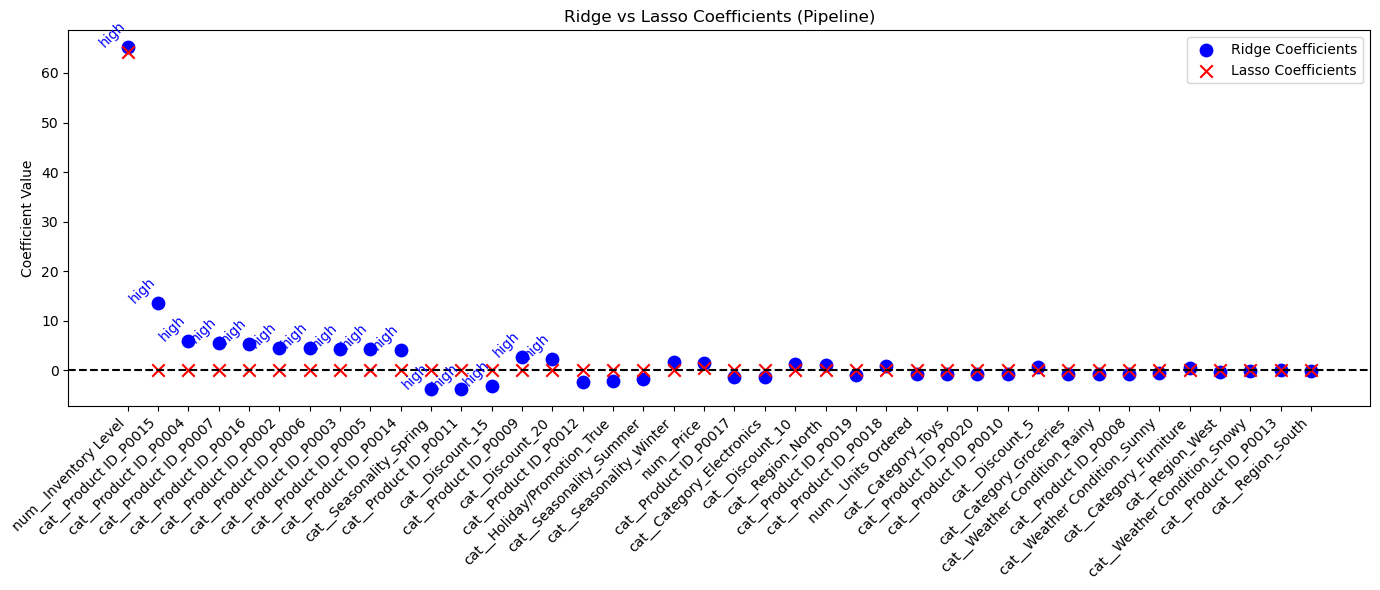

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Use the coef_df created previously
features = coef_df['feature'].values
lasso_coef = coef_df['lasso_coef'].values
ridge_coef = coef_df['ridge_coef'].values

# Determine top coefficients by absolute Lasso magnitude
top_n = 15
top_idx = np.argsort(np.abs(ridge_coef))[-top_n:]

# Plot
plt.figure(figsize=(14, 6))

# Scatter all coefficients
plt.scatter(range(len(ridge_coef)), ridge_coef, color="blue", label="Ridge Coefficients", s=80, marker="o")
plt.scatter(range(len(lasso_coef)), lasso_coef, color="red", label="Lasso Coefficients", s=80, marker="x")
plt.axhline(0, color="black", linestyle="--")

# Label only top features
for i in top_idx:
    plt.text(i, ridge_coef[i],"high", rotation=45, ha="right", fontsize=10, color="blue")
    #plt.text(i, lasso_coef[i], "high", rotation=-45, ha="left", fontsize=10, color="red")

plt.xticks(range(len(features)), features, rotation=45, ha="right")
plt.ylabel("Coefficient Value")
plt.title("Ridge vs Lasso Coefficients (Pipeline)")
plt.legend()
plt.tight_layout()
plt.show()


Inventory Level and Product ID, surrogacy ?

C:\Users\Cybertronia\AppData\Local\Temp\ipykernel_16908\4063399697.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prod_summary = store5_df.groupby("Product ID")[["Inventory Level", "Units Sold"]].mean().reset_index()


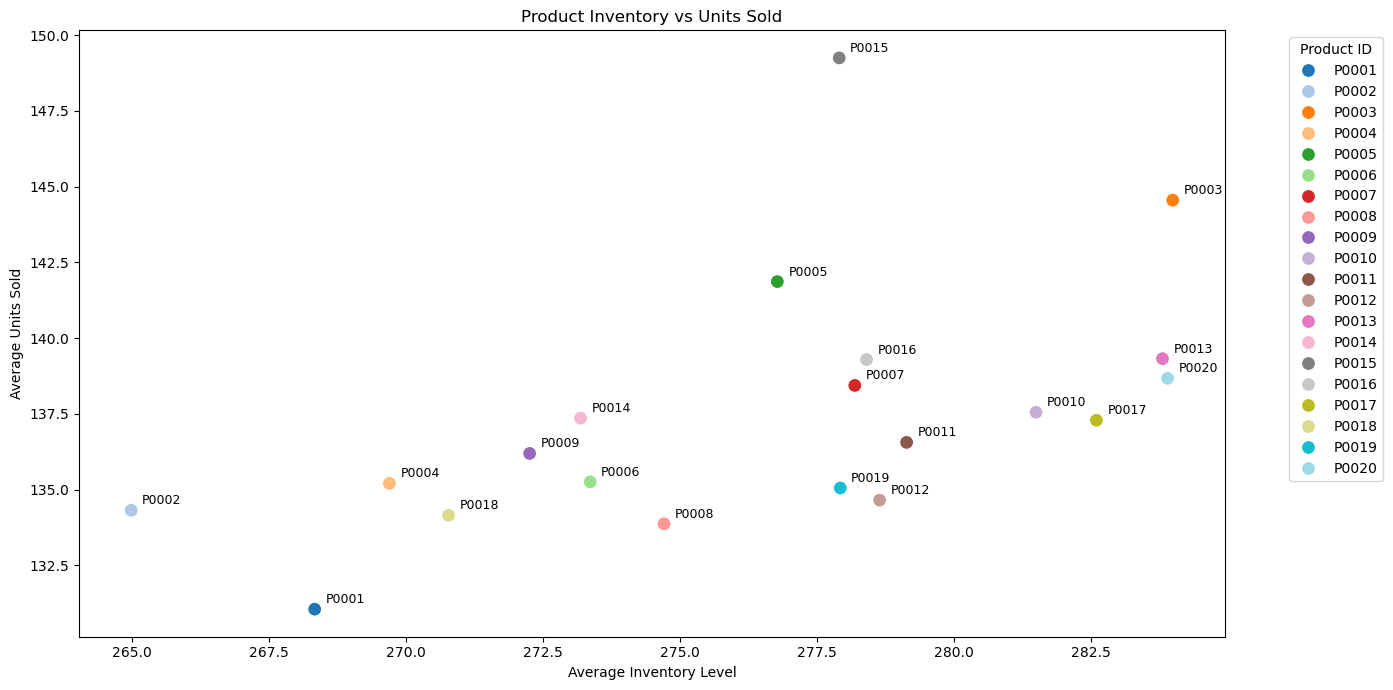

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate by Product ID
prod_summary = store5_df.groupby("Product ID")[["Inventory Level", "Units Sold"]].mean().reset_index()
plt.figure(figsize=(14,7))
sns.scatterplot(
    x="Inventory Level",
    y="Units Sold",
    data=prod_summary,
    hue="Product ID",
    palette="tab20",
    s=100
)

# Annotate each product
for idx, row in prod_summary.iterrows():
    plt.text(
        row["Inventory Level"] + 0.2,  # slightly offset x
        row["Units Sold"] + 0.2,       # slightly offset y
        row["Product ID"],
        fontsize=9
    )

plt.xlabel("Average Inventory Level")
plt.ylabel("Average Units Sold")
plt.title("Product Inventory vs Units Sold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title="Product ID")  # move legend outside
plt.tight_layout()
plt.show()


While inventory contributes to sales, the variation in units sold across products is not explained solely by inventory. Products like P0015 and P0003 clearly have intrinsically higher demand, making product-level features essential for forecasting. Inventory may act as a partial surrogate, but demand differences are real and actionable.

In [42]:
from sklearn.model_selection import train_test_split
# 1. extract prior and posterior from your baseline KF
x_prior = np.array(x_prior_list)      # xt|t-1
x_post = np.array(x_estimates)        # xt|t

# 2. correct latent increments
dx = x_post - x_prior                 # Δx_t = xt|t - xt|t-1

X_dxtrain, X_dxtest, dx_train, dx_test = train_test_split(X, dx, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression

print(dx.shape,X.shape)
# Fit
lr_pipeline.fit(X_dxtrain, dx_train)

# Evaluate
dx_pred = lr_pipeline.predict(X_dxtest)
mse = mean_squared_error(dx_test, dx_pred)
print("Linear Regression MSE:", mse)
print("Linear Regression RMSE:", np.sqrt(mse))
reg = lr_pipeline.named_steps["regressor"]
# feature names after one-hot encoding
feature_names = numeric_cols + lr_pipeline.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out(categorical_cols).tolist()
coef_df = pd.DataFrame({"feature": feature_names, "coef": reg.coef_})
print(coef_df.sort_values(by="coef", key=abs, ascending=False))

(14620,) (14620, 11)
Linear Regression MSE: 18873.825527116864
Linear Regression RMSE: 137.38204222938623
                    feature       coef
0           Inventory Level  65.128380
16         Product ID_P0015   8.906734
15         Product ID_P0014  -8.474178
20         Product ID_P0019  -6.171046
33  Weather Condition_Rainy   6.022617
13         Product ID_P0012  -5.494495
23       Category_Furniture   5.223841
4          Product ID_P0003   4.877504
11         Product ID_P0010  -4.778043
3          Product ID_P0002  -4.622175
21         Product ID_P0020   4.619056
24       Category_Groceries   4.509121
14         Product ID_P0013  -4.292063
7          Product ID_P0006   4.047884
27             Region_South  -3.949134
37       Seasonality_Spring  -3.859052
35  Weather Condition_Sunny   3.567138
6          Product ID_P0005   3.527961
28              Region_West  -3.228094
25            Category_Toys   3.047495
36   Holiday/Promotion_True  -2.625437
34  Weather Condition_Snowy   2.4666

In [44]:
import pandas as pd
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# --- Fit Lasso on latent increments ---
lasso_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("lasso", LassoCV(cv=5, max_iter=5000))
])
lasso_pipeline.fit(X_dxtrain, dx_train)  # use training split
dx_pred_lasso = lasso_pipeline.predict(X_dxtest)
print("Lasso MSE:", mean_squared_error(dx_test, dx_pred_lasso))

# --- Fit Ridge on latent increments ---
ridge_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("ridge", RidgeCV(cv=5))
])
ridge_pipeline.fit(X_dxtrain, dx_train)  # use training split
dx_pred_ridge = ridge_pipeline.predict(X_dxtest)
print("Ridge MSE:", mean_squared_error(dx_test, dx_pred_ridge))

# --- Extract feature names after preprocessing ---
numeric_features = numeric_cols
categorical_features = lasso_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols)
feature_names = list(numeric_features) + list(categorical_features)

# --- Extract coefficients ---
lasso_coefs = lasso_pipeline.named_steps['lasso'].coef_
ridge_coefs = ridge_pipeline.named_steps['ridge'].coef_

# --- Create DataFrame ---
coef_df = pd.DataFrame({
    "feature": feature_names,
    "lasso_coef": lasso_coefs,
    "ridge_coef": ridge_coefs
})

# --- Sort by descending absolute Lasso coefficients ---
coef_df = coef_df.reindex(coef_df.ridge_coef.abs().sort_values(ascending=False).index)

# --- Show results ---
print(coef_df)


Lasso MSE: 18870.15796498179
Ridge MSE: 18873.44653393764
                    feature  lasso_coef  ridge_coef
0           Inventory Level   63.710916   65.072753
16         Product ID_P0015    0.000000    9.111181
15         Product ID_P0014   -0.000000   -7.956956
33  Weather Condition_Rainy    0.000000    5.971934
20         Product ID_P0019   -0.000000   -5.689275
23       Category_Furniture    0.000000    5.186448
4          Product ID_P0003    0.000000    5.160743
13         Product ID_P0012   -0.000000   -5.027253
21         Product ID_P0020    0.000000    4.907382
24       Category_Groceries    0.000000    4.472830
7          Product ID_P0006    0.000000    4.336396
11         Product ID_P0010   -0.000000   -4.327546
3          Product ID_P0002   -0.000000   -4.170728
27             Region_South   -0.000000   -3.911445
14         Product ID_P0013   -0.000000   -3.854375
6          Product ID_P0005    0.000000    3.839147
37       Seasonality_Spring   -0.000000   -3.833127
35  We

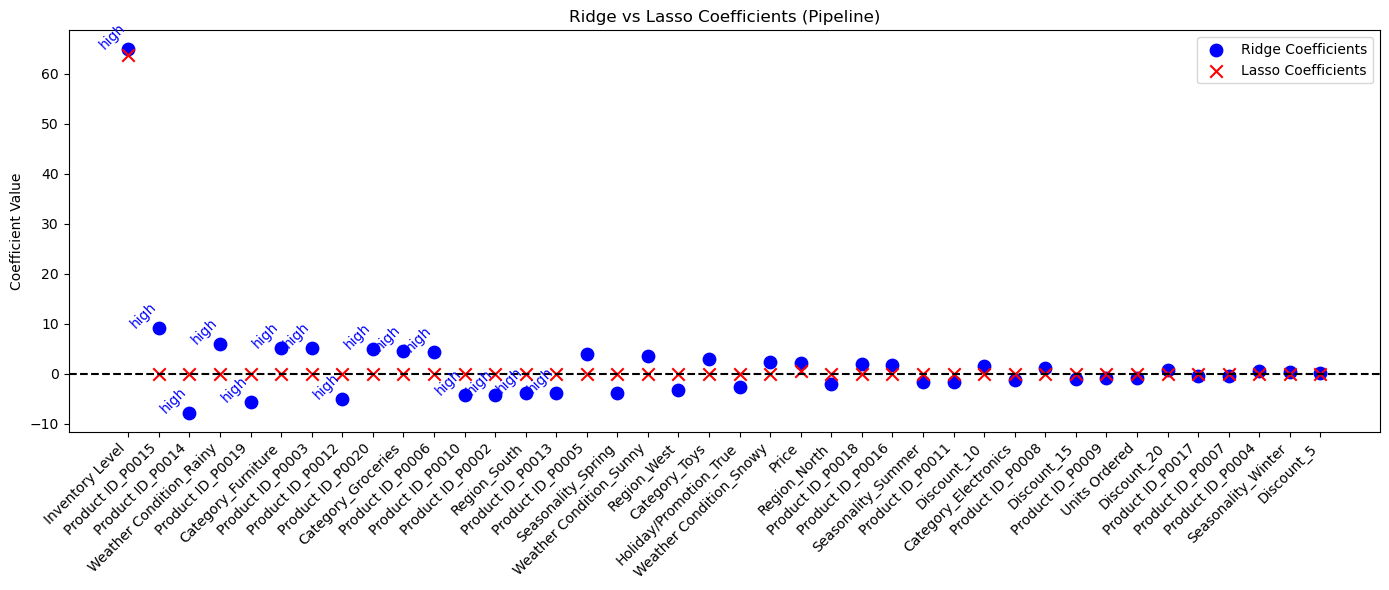

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Use the coef_df created previously
features = coef_df['feature'].values
lasso_coef = coef_df['lasso_coef'].values
ridge_coef = coef_df['ridge_coef'].values

# Determine top coefficients by absolute Lasso magnitude
top_n = 15
top_idx = np.argsort(np.abs(ridge_coef))[-top_n:]

# Plot
plt.figure(figsize=(14, 6))

# Scatter all coefficients
plt.scatter(range(len(ridge_coef)), ridge_coef, color="blue", label="Ridge Coefficients", s=80, marker="o")
plt.scatter(range(len(lasso_coef)), lasso_coef, color="red", label="Lasso Coefficients", s=80, marker="x")
plt.axhline(0, color="black", linestyle="--")

# Label only top features
for i in top_idx:
    plt.text(i, ridge_coef[i],"high", rotation=45, ha="right", fontsize=10, color="blue")
    #plt.text(i, lasso_coef[i], "high", rotation=-45, ha="left", fontsize=10, color="red")

plt.xticks(range(len(features)), features, rotation=45, ha="right")
plt.ylabel("Coefficient Value")
plt.title("Ridge vs Lasso Coefficients (Pipeline)")
plt.legend()
plt.tight_layout()
plt.show()


# Performing Exogenous KF

1) Using Ridge Coeffs

2) Using Lasso coeffs

# Using Ridge Coefficients

In [46]:
selected = coef_df[coef_df.ridge_coef.abs() > 2]

B = selected['ridge_coef'].values.reshape(1, -1)
u_cols = selected['feature'].tolist()   

pre = ridge_pipeline.named_steps['preprocessor']

# 1. Transform X and convert to dense numpy array
X_transformed = pre.transform(X)
if hasattr(X_transformed, "toarray"):  # check if sparse
    X_transformed = X_transformed.toarray()

# 2. Get all feature names in transformed space
numeric_features = numeric_cols
categorical_features = pre.transformers_[1][1].get_feature_names_out(categorical_cols)
feature_names = list(numeric_features) + list(categorical_features)

# 3. Select indices of features you want (from ridge coef)
selected_idx = [feature_names.index(f) for f in u_cols]

# 4. Extract control matrix U as dense array
U = X_transformed[:, selected_idx]  # shape (T, k)


In [47]:
B.shape,U.shape,
selected['feature'].tolist() 

['Inventory Level',
 'Product ID_P0015',
 'Product ID_P0014',
 'Weather Condition_Rainy',
 'Product ID_P0019',
 'Category_Furniture',
 'Product ID_P0003',
 'Product ID_P0012',
 'Product ID_P0020',
 'Category_Groceries',
 'Product ID_P0006',
 'Product ID_P0010',
 'Product ID_P0002',
 'Region_South',
 'Product ID_P0013',
 'Product ID_P0005',
 'Seasonality_Spring',
 'Weather Condition_Sunny',
 'Region_West',
 'Category_Toys',
 'Holiday/Promotion_True',
 'Weather Condition_Snowy',
 'Price']

In [48]:
from filterpy.kalman import KalmanFilter
# simple KF params (random-walk F=1 recommended baseline)
#units = store5_df['Units Sold'].values
H = np.array([[1]])
F = np.array([[1.0]])
# U = X[u_cols].values     # shape (T, k)
# sensible initial choices from data:
P0 = np.array([[np.var(units)]])
Q0 = np.array([[np.var(np.diff(units))]])    # process noise approx day-to-day
R0 = np.array([[np.var(units - store5_df['Demand Forecast'].values) ]])  # or var(measurement residual)
z_meas = units.reshape(-1,1)

kf = KalmanFilter(dim_x=1, dim_z=1)
kf.x = np.array([[z_meas[0,0]]])
kf.P = P0.copy()
kf.F = F
kf.H = H
kf.Q = Q0
kf.R = R0
kf.B=B

innovations = []
S_list = []
x_prior_list = []
x_post_list = []
P_values = []
K_values = []
x_estimates = []

for t,z in enumerate(z_meas):
    u_t=U[t].reshape(-1,1)
    kf.predict(u=u_t)
    x_prior = kf.x.copy() #xt|t-1
    P_prior = kf.P.copy() #Pt|t-1
    P_values.append(kf.P[0,0]) #diagonal entries (variance of predicted state estimate (i.e latent demand)
    innov = z.reshape(-1,1) - (kf.H @ x_prior) # residual y=z-xt|t-1, how far off the predicted measurement is from actual measurement
    S = (kf.H @ P_prior @ kf.H.T) + kf.R #uncertainity in residual, how confident we are about the difference
    kf.update(z)
    x_estimates.append(kf.x[0,0]) #xt|t
    K_values.append(kf.K[0,0]) # kalman gain
    innovations.append(innov.item()) #innovations
    S_list.append(S.item()) #innov cov
    x_prior_list.append(x_prior.item()) ##xt|t-1
    x_post_list.append(kf.x.item()) #xt|t

x_estimates = np.array(x_estimates)
K_values = np.array(K_values)
innovations = np.array(innovations)
S_arr = np.array(S_list)
NIS = (innovations**2) / S_arr
P_values = np.array(P_values)

print("R",kf.R,"Q",kf.Q)
print("Kalman Gain",K_values)
print("P ",P_values)
print("Mean innovation:", innovations.mean())
print("Std innovation:", innovations.std())
print("Mean NIS:", NIS.mean())
print("NIS STD:",NIS.std())
errors = x_estimates - units  # difference at each time step

# Mean Squared Error
mse = np.mean(errors**2)
print("MSE:", mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("RMSE:", rmse)

R [[74.48979937]] Q [[23840.06911435]]
Kalman Gain [0.99792538 0.99689482 0.99689481 ... 0.99689481 0.99689481 0.99689481]
P  [35830.7478165  23914.40437553 23914.32760959 ... 23914.32760885
 23914.32760885 23914.32760885]
Mean innovation: -1.0279844877440525
Std innovation: 139.56478999476835
Mean NIS: 0.8120122246850051
NIS STD: 1.1442427145675067
MSE: 0.18782125598257146
RMSE: 0.43338349758911154


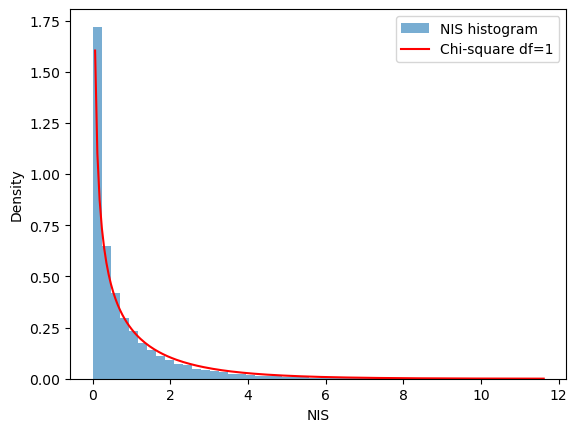

In [49]:
from scipy.stats import chi2
import matplotlib.pyplot as plt

plt.hist(NIS, bins=50, density=True, alpha=0.6, label="NIS histogram")
x = np.linspace(0, max(NIS), 200)
plt.plot(x, chi2.pdf(x, df=1), 'r-', label="Chi-square df=1")
plt.xlabel("NIS")
plt.ylabel("Density")
plt.legend()
plt.show()


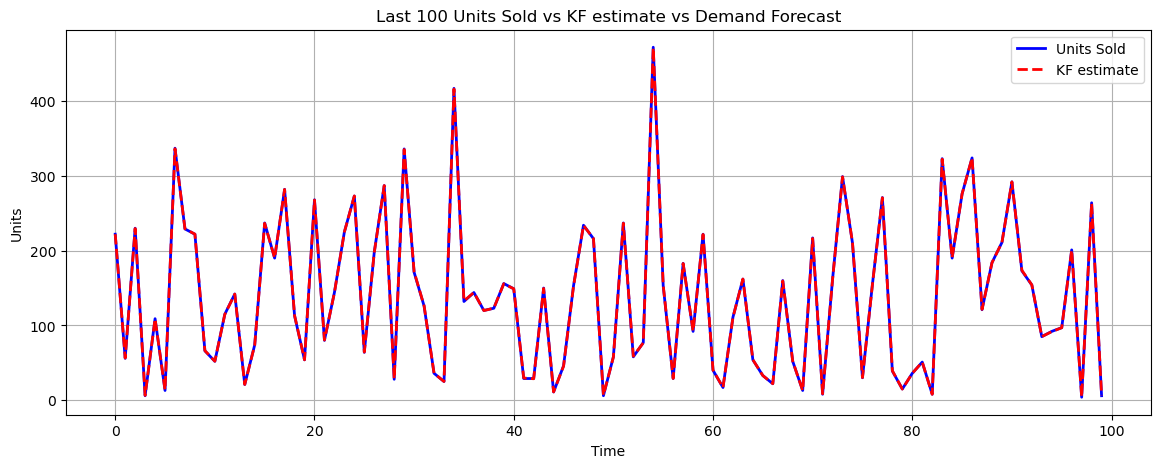

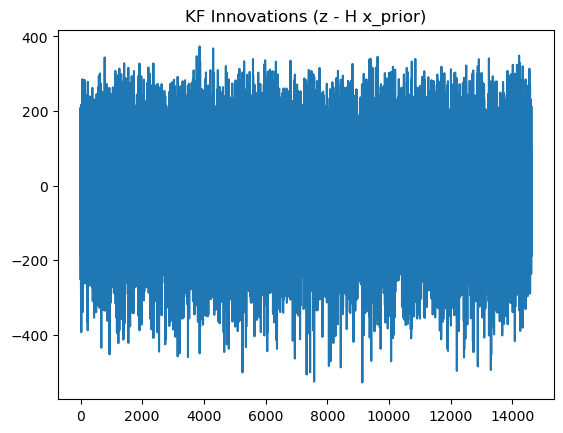

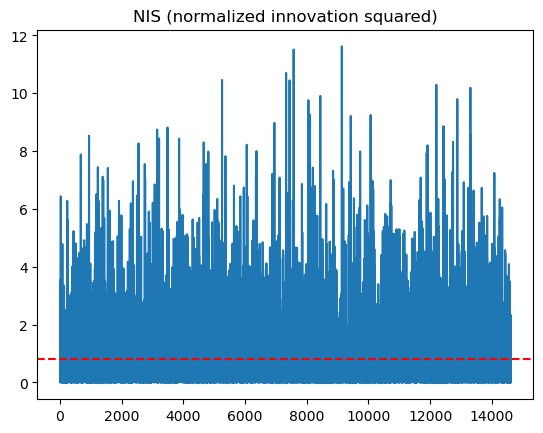

In [50]:
n = 100  # last 100 points
plt.figure(figsize=(14,5))
plt.plot(units[-n:], label='Units Sold', color='blue', linewidth=2)
plt.plot(x_post_list[-n:], label='KF estimate', color='red', linewidth=2,linestyle='--')
# plt.plot(df['Demand Forecast'].values[-n:], label='Demand Forecast', color='green', linestyle='--', linewidth=2)
plt.legend()
plt.title('Last 100 Units Sold vs KF estimate vs Demand Forecast')
plt.xlabel('Time')
plt.ylabel('Units')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(innovations)
plt.title('KF Innovations (z - H x_prior)')
plt.show()

plt.figure()
plt.plot(NIS)
plt.title('NIS (normalized innovation squared)')
plt.axhline(y=np.mean(NIS), color='red', linestyle='--')
plt.show()

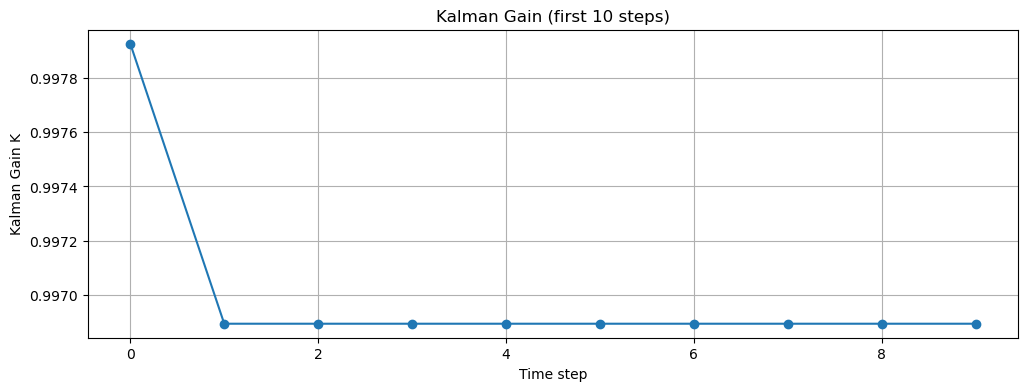

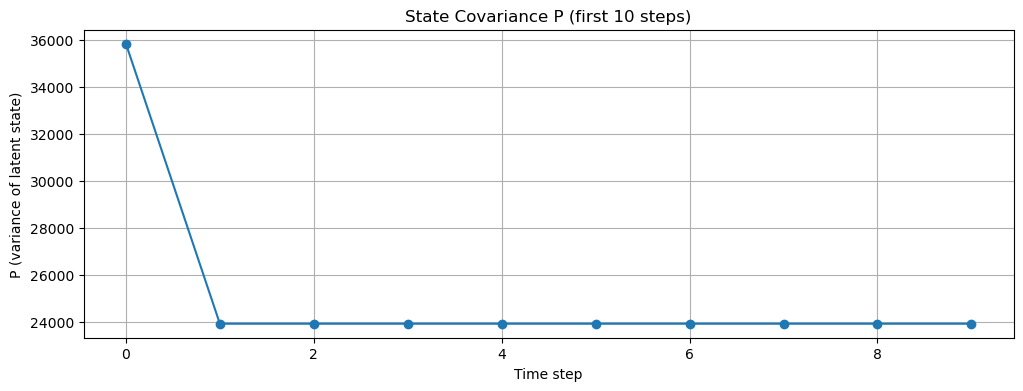

In [51]:
n_steps = 10  # first 10 steps
iterations = np.arange(n_steps)

# Kalman gain
plt.figure(figsize=(12,4))
plt.plot(iterations, K_values[:n_steps], marker='o', linestyle='-')
plt.title("Kalman Gain (first 10 steps)")
plt.xlabel("Time step")
plt.ylabel("Kalman Gain K")
plt.grid(True)
plt.show()

# State covariance P
plt.figure(figsize=(12,4))
plt.plot(iterations, P_values[:n_steps], marker='o', linestyle='-')
plt.title("State Covariance P (first 10 steps)")
plt.xlabel("Time step")
plt.ylabel("P (variance of latent state)")
plt.grid(True)
plt.show()


# 2) Lasso Only Coeff

In [52]:
selected = coef_df[coef_df.lasso_coef.abs() > 2]

B = selected['lasso_coef'].values.reshape(1, -1)
u_cols = selected['feature'].tolist()   

pre = lasso_pipeline.named_steps['preprocessor']

# 1. Transform X and convert to dense numpy array
X_transformed = pre.transform(X)
if hasattr(X_transformed, "toarray"):  # check if sparse
    X_transformed = X_transformed.toarray()

# 2. Get all feature names in transformed space
numeric_features = numeric_cols
categorical_features = pre.transformers_[1][1].get_feature_names_out(categorical_cols)
feature_names = list(numeric_features) + list(categorical_features)

# 3. Select indices of features you want (from ridge coef)
selected_idx = [feature_names.index(f) for f in u_cols]

# 4. Extract control matrix U as dense array
U = X_transformed[:, selected_idx]  # shape (T, k)


In [53]:
selected['feature'].tolist()   

['Inventory Level']

In [54]:
from filterpy.kalman import KalmanFilter
# simple KF params (random-walk F=1 recommended baseline)
#units = store5_df['Units Sold'].values
H = np.array([[1]])
F = np.array([[1.0]])
# U = X[u_cols].values     # shape (T, k)
# sensible initial choices from data:
P0 = np.array([[np.var(units)]])
Q0 = np.array([[np.var(np.diff(units))]])    # process noise approx day-to-day
R0 = np.array([[np.var(units - store5_df['Demand Forecast'].values) ]])  # or var(measurement residual)
z_meas = units.reshape(-1,1)

kf = KalmanFilter(dim_x=1, dim_z=1)
kf.x = np.array([[z_meas[0,0]]])
kf.P = P0.copy()
kf.F = F
kf.H = H
kf.Q = Q0
kf.R = R0
kf.B=B

innovations = []
S_list = []
x_prior_list = []
x_post_list = []
P_values = []
K_values = []
x_estimates = []

for t,z in enumerate(z_meas):
    u_t=U[t].reshape(-1,1)
    kf.predict(u=u_t)
    x_prior = kf.x.copy() #xt|t-1
    P_prior = kf.P.copy() #Pt|t-1
    P_values.append(kf.P[0,0]) #diagonal entries (variance of predicted state estimate (i.e latent demand)
    innov = z.reshape(-1,1) - (kf.H @ x_prior) # residual y=z-xt|t-1, how far off the predicted measurement is from actual measurement
    S = (kf.H @ P_prior @ kf.H.T) + kf.R #uncertainity in residual, how confident we are about the difference
    kf.update(z)
    x_estimates.append(kf.x[0,0]) #xt|t
    K_values.append(kf.K[0,0]) # kalman gain
    innovations.append(innov.item()) #innovations
    S_list.append(S.item()) #innov cov
    x_prior_list.append(x_prior.item()) ##xt|t-1
    x_post_list.append(kf.x.item()) #xt|t

x_estimates = np.array(x_estimates)
K_values = np.array(K_values)
innovations = np.array(innovations)
S_arr = np.array(S_list)
NIS = (innovations**2) / S_arr
P_values = np.array(P_values)

print("R",kf.R,"Q",kf.Q)
print("Kalman Gain",K_values)
print("P ",P_values)
print("Mean innovation:", innovations.mean())
print("Std innovation:", innovations.std())
print("Mean NIS:", NIS.mean())
print("STD NIS:",NIS.std())
errors = x_estimates - units  # difference at each time step

# Mean Squared Error
mse = np.mean(errors**2)
print("MSE:", mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("RMSE:", rmse)

R [[74.48979937]] Q [[23840.06911435]]
Kalman Gain [0.99792538 0.99689482 0.99689481 ... 0.99689481 0.99689481 0.99689481]
P  [35830.7478165  23914.40437553 23914.32760959 ... 23914.32760885
 23914.32760885 23914.32760885]
Mean innovation: 0.29263989179587224
Std innovation: 139.6801470895573
Mean NIS: 0.8133153193391635
STD NIS: 1.1406019907337288
MSE: 0.18812278361827767
RMSE: 0.4337312343125379


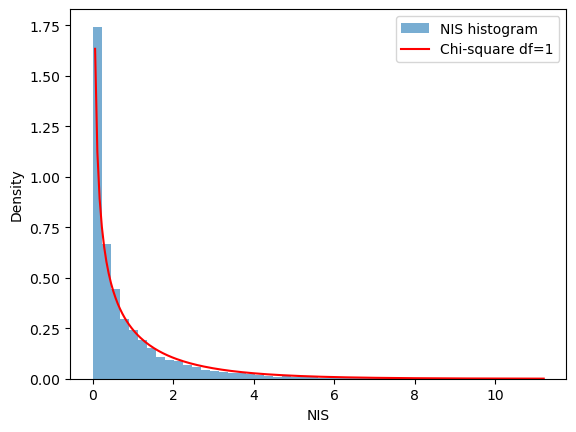

In [55]:
from scipy.stats import chi2
import matplotlib.pyplot as plt

plt.hist(NIS, bins=50, density=True, alpha=0.6, label="NIS histogram")
x = np.linspace(0, max(NIS), 200)
plt.plot(x, chi2.pdf(x, df=1), 'r-', label="Chi-square df=1")
plt.xlabel("NIS")
plt.ylabel("Density")
plt.legend()
plt.show()


# Augmented KF

In [56]:
selected = coef_df[coef_df.lasso_coef.abs() > 2]

B = selected['lasso_coef'].values.reshape(1, -1)
u_cols = selected['feature'].tolist()   

pre = lasso_pipeline.named_steps['preprocessor']

# 1. Transform X and convert to dense numpy array
X_transformed = pre.transform(X)
if hasattr(X_transformed, "toarray"):  # check if sparse
    X_transformed = X_transformed.toarray()

# 2. Get all feature names in transformed space
numeric_features = numeric_cols
categorical_features = pre.transformers_[1][1].get_feature_names_out(categorical_cols)
feature_names = list(numeric_features) + list(categorical_features)

# 3. Select indices of features you want (from ridge coef)
selected_idx = [feature_names.index(f) for f in u_cols]

# 4. Extract control matrix U as dense array
U = X_transformed[:, selected_idx]  # shape (T, k)


In [57]:
from filterpy.kalman import KalmanFilter
T, k = U.shape
dim_x = 1 + k  # latent demand + k selected features
#units = store5_df['Units Sold'].values

# H: we only observe latent demand
H = np.zeros((1, dim_x))
H[0,0] = 1
F = np.eye(dim_x)
# Optional: initialize influence of features on latent demand
F[0, 1:] = selected['lasso_coef'].values  # top Lasso coefficients
# U = X[u_cols].values     # shape (T, k)
# sensible initial choices from data:
# Covariances
P0 = np.diag([np.var(units)] + [np.var(U[:,i]) for i in range(k)])
Q0 = np.diag([np.var(np.diff(units))] + [np.var(np.diff(U[:,i])) for i in range(k)])
R0 = np.array([[np.var(units - store5_df['Demand Forecast'].values)]])


x0 = np.zeros((dim_x,1))
x0[0,0] = z_meas[0,0]
x0[1:,0] = U[0]

kf = KalmanFilter(dim_x=dim_x, dim_z=1)
kf.x = x0
kf.P = P0.copy()
kf.F = F
kf.H = H
kf.Q = Q0
kf.R = R0

innovations = []
S_list = []
x_prior_list = []
x_post_list = []
P_values = []
K_values = []
x_estimates = []

for t,z in enumerate(z_meas):
     # Update extra states to current feature values
    kf.x[1:,0] = U[t]
    
    kf.predict()
    
    x_prior = kf.x.copy() #xt|t-1
    P_prior = kf.P.copy() #Pt|t-1
    P_values.append(kf.P[0,0]) #diagonal entries (variance of predicted state estimate (i.e latent demand)
    innov = z.reshape(-1,1) - (kf.H @ x_prior) # residual y=z-xt|t-1, how far off the predicted measurement is from actual measurement
    S = (kf.H @ P_prior @ kf.H.T) + kf.R #uncertainity in residual, how confident we are about the difference
    
    kf.update(z)
    
    x_estimates.append(kf.x[0,0]) #xt|t
    K_values.append(kf.K[0,0]) # kalman gain
    innovations.append(innov.item()) #innovations
    S_list.append(S.item()) #innov cov
    x_post_list.append(kf.x[0,0])   # latent demand estimate
    x_prior_list.append(x_prior[0,0])  # latent demand prior


x_estimates = np.array(x_estimates)
K_values = np.array(K_values)
innovations = np.array(innovations)
S_arr = np.array(S_list)
NIS = (innovations**2) / S_arr
P_values = np.array(P_values)

print("R",kf.R,"Q",kf.Q)
print("Kalman Gain",K_values)
print("P ",P_values)
print("Mean innovation:", innovations.mean())
print("Std innovation:", innovations.std())
print("Mean NIS:", NIS.mean())
print("STD NIS:", NIS.std())
errors = x_estimates - units  # difference at each time step

# Mean Squared Error
mse = np.mean(errors**2)
print("MSE:", mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("RMSE:", rmse)

R [[74.48979937]] Q [[2.38400691e+04 0.00000000e+00]
 [0.00000000e+00 2.00227729e+00]]
Kalman Gain [0.99813635 0.99791828 0.99814063 ... 0.99825292 0.99825292 0.99825292]
P  [39895.41369541 35708.29278027 39987.37831024 ... 42562.13703805
 42562.13703805 42562.13703805]
Mean innovation: 0.2922330771245808
Std innovation: 139.75480461906102
Mean NIS: 0.45809541095051953
STD NIS: 0.6424589889335155
MSE: 0.05961701620066711
RMSE: 0.24416596036439459


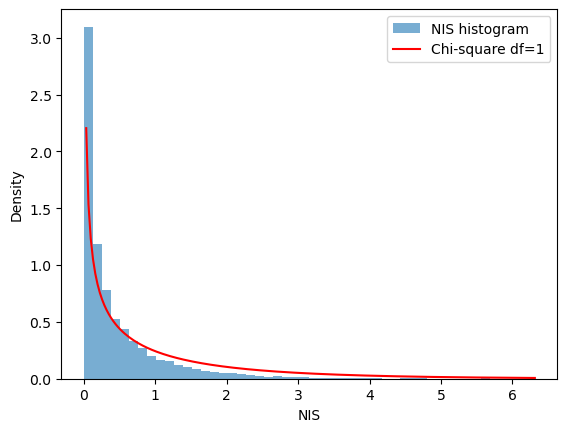

In [58]:
from scipy.stats import chi2
import matplotlib.pyplot as plt

plt.hist(NIS, bins=50, density=True, alpha=0.6, label="NIS histogram")
x = np.linspace(0, max(NIS), 200)
plt.plot(x, chi2.pdf(x, df=1), 'r-', label="Chi-square df=1")
plt.xlabel("NIS")
plt.ylabel("Density")
plt.legend()
plt.show()


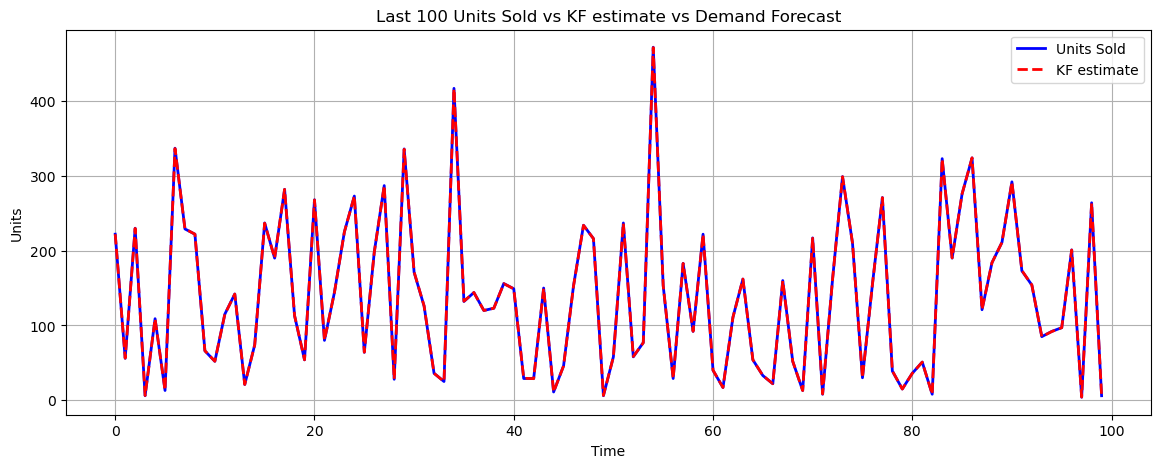

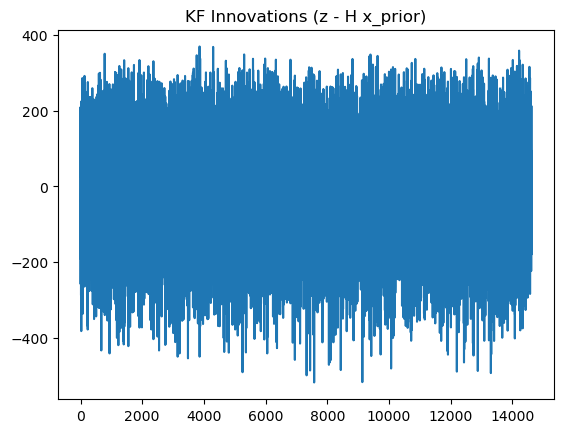

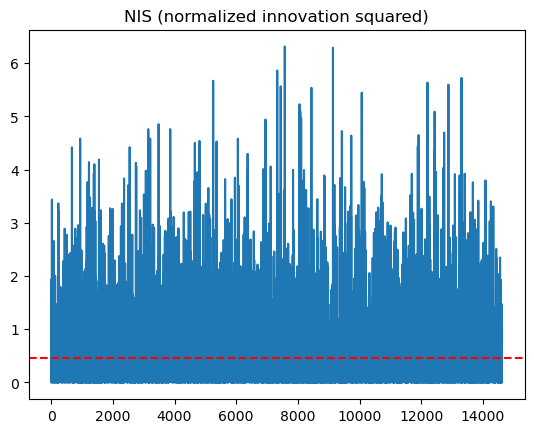

In [59]:
n = 100  # last 100 points
plt.figure(figsize=(14,5))
plt.plot(units[-n:], label='Units Sold', color='blue', linewidth=2)
plt.plot(x_post_list[-n:], label='KF estimate', color='red', linewidth=2,linestyle='--')
# plt.plot(df['Demand Forecast'].values[-n:], label='Demand Forecast', color='green', linestyle='--', linewidth=2)
plt.legend()
plt.title('Last 100 Units Sold vs KF estimate vs Demand Forecast')
plt.xlabel('Time')
plt.ylabel('Units')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(innovations)
plt.title('KF Innovations (z - H x_prior)')
plt.show()

plt.figure()
plt.plot(NIS)
plt.title('NIS (normalized innovation squared)')
plt.axhline(y=np.mean(NIS), color='red', linestyle='--')
plt.show()

# Lasso Augmented

In [60]:
selected = coef_df[coef_df.lasso_coef.abs() > 2]

B = selected['lasso_coef'].values.reshape(1, -1)
u_cols = selected['feature'].tolist()   

pre = lasso_pipeline.named_steps['preprocessor']

# 1. Transform X and convert to dense numpy array
X_transformed = pre.transform(X)
if hasattr(X_transformed, "toarray"):  # check if sparse
    X_transformed = X_transformed.toarray()

# 2. Get all feature names in transformed space
numeric_features = numeric_cols
categorical_features = pre.transformers_[1][1].get_feature_names_out(categorical_cols)
feature_names = list(numeric_features) + list(categorical_features)

# 3. Select indices of features you want (from ridge coef)
selected_idx = [feature_names.index(f) for f in u_cols]

# 4. Extract control matrix U as dense array
U = X_transformed[:, selected_idx]  # shape (T, k)

In [61]:
from filterpy.kalman import KalmanFilter
T, k = U.shape
dim_x = 1 + k  # latent demand + k selected features
#units = store5_df['Units Sold'].values

# H: we only observe latent demand
H = np.zeros((1, dim_x))
H[0,0] = 1
F = np.eye(dim_x)
# Optional: initialize influence of features on latent demand
F[0, 1:] = selected['lasso_coef'].values  # top Lasso coefficients
# U = X[u_cols].values     # shape (T, k)
# sensible initial choices from data:
# Covariances
P0 = np.diag([np.var(units)] + [np.var(U[:,i]) for i in range(k)])

#before hyperparameter tuning
Q0 = np.diag([np.var(np.diff(units))] + [np.var(np.diff(U[:,i])) for i in range(k)])
R0 = np.array([[np.var(units - store5_df['Demand Forecast'].values)]])


x0 = np.zeros((dim_x,1))
x0[0,0] = z_meas[0,0]
x0[1:,0] = U[0]

kf = KalmanFilter(dim_x=dim_x, dim_z=1)
kf.x = x0
kf.P = P0.copy()
kf.F = F
kf.H = H
kf.Q = Q0
kf.R = R0

innovations = []
S_list = []
x_prior_list = []
x_post_list = []
P_values = []
K_values = []
x_estimates = []

for t,z in enumerate(z_meas):
     # Update extra states to current feature values
    kf.x[1:,0] = U[t]
    
    kf.predict()
    
    x_prior = kf.x.copy() #xt|t-1
    P_prior = kf.P.copy() #Pt|t-1
    P_values.append(kf.P[0,0]) #diagonal entries (variance of predicted state estimate (i.e latent demand)
    innov = z.reshape(-1,1) - (kf.H @ x_prior) # residual y=z-xt|t-1, how far off the predicted measurement is from actual measurement
    S = (kf.H @ P_prior @ kf.H.T) + kf.R #uncertainity in residual, how confident we are about the difference
    
    kf.update(z)
    
    x_estimates.append(kf.x[0,0]) #xt|t
    K_values.append(kf.K[0,0]) # kalman gain
    innovations.append(innov.item()) #innovations
    S_list.append(S.item()) #innov cov
    x_post_list.append(kf.x[0,0])   # latent demand estimate
    x_prior_list.append(x_prior[0,0])  # latent demand prior


x_estimates = np.array(x_estimates)
K_values = np.array(K_values)
innovations = np.array(innovations)
S_arr = np.array(S_list)
NIS = (innovations**2) / S_arr
P_values = np.array(P_values)

print("R",kf.R,"Q",kf.Q)
print("Kalman Gain",K_values)
print("P ",P_values)
print("Mean innovation:", innovations.mean())
print("Std innovation:", innovations.std())
print("Mean NIS:", NIS.mean())
print("STD NIS:", NIS.std())
errors = x_estimates - units  # difference at each time step

# Mean Squared Error
mse = np.mean(errors**2)
print("MSE:", mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("RMSE:", rmse)

R [[74.48979937]] Q [[2.38400691e+04 0.00000000e+00]
 [0.00000000e+00 2.00227729e+00]]
Kalman Gain [0.99813635 0.99791828 0.99814063 ... 0.99825292 0.99825292 0.99825292]
P  [39895.41369541 35708.29278027 39987.37831024 ... 42562.13703805
 42562.13703805 42562.13703805]
Mean innovation: 0.2922330771245808
Std innovation: 139.75480461906102
Mean NIS: 0.45809541095051953
STD NIS: 0.6424589889335155
MSE: 0.05961701620066711
RMSE: 0.24416596036439459


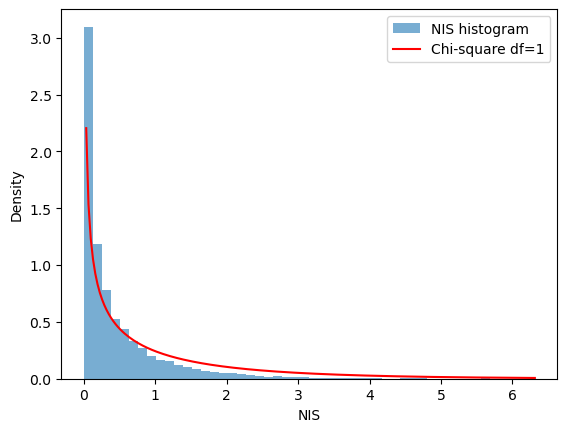

In [62]:
from scipy.stats import chi2
import matplotlib.pyplot as plt

plt.hist(NIS, bins=50, density=True, alpha=0.6, label="NIS histogram")
x = np.linspace(0, max(NIS), 200)
plt.plot(x, chi2.pdf(x, df=1), 'r-', label="Chi-square df=1")
plt.xlabel("NIS")
plt.ylabel("Density")
plt.legend()
plt.show()


In [63]:
import numpy as np

def run_kf(Q_scale, R_scale):
    kf = KalmanFilter(dim_x=dim_x, dim_z=1)
    kf.x = x0.copy()
    kf.P = P0.copy()
    kf.F = F.copy()
    kf.H = H.copy()
    kf.Q = Q0 * Q_scale
    kf.R = R0 * R_scale

    innovations = []
    S_list = []
    x_est = []

    for t, z in enumerate(z_meas):
        kf.x[1:,0] = U[t]
        kf.predict()

        innov = (z - kf.H @ kf.x).item()
        S = (kf.H @ kf.P @ kf.H.T + kf.R).item()

        kf.update(z)

        innovations.append(innov)
        S_list.append(S)
        x_est.append(kf.x[0,0])

    innovations = np.array(innovations)
    S_arr = np.array(S_list)
    NIS = innovations**2 / S_arr
    x_est = np.array(x_est)

    mean_NIS = NIS.mean()
    std_NIS = NIS.std()
    rmse = np.sqrt(np.mean((x_est - units)**2))

    return mean_NIS, std_NIS, rmse


# =====================
# Grid Search
# =====================

results = []


Q_scales = [0.5, 0.6, 0.7, 0.8, 0.9]
R_scales = [0.13, 0.135, 0.14, 0.145, 0.15]



for q in Q_scales:
    for r in R_scales:
        mean_nis, std_nis, rmse = run_kf(q, r)
        results.append((q, r, mean_nis, std_nis, rmse))

# Sort by mean_nis close to 1 AND low rmse
results_sorted = sorted(
    results,
    key=lambda x: abs(x[2] - 1) + abs(x[3] - np.sqrt(2)) + x[4]
)

print("Top candidates:")
for row in results_sorted[:10]:
    print(f"Q_scale={row[0]}, R_scale={row[1]}, meanNIS={row[2]:.3f}, stdNIS={row[3]:.3f}, RMSE={row[4]:.3f}")


Top candidates:
Q_scale=0.5, R_scale=0.13, meanNIS=0.921, stdNIS=1.291, RMSE=0.064
Q_scale=0.5, R_scale=0.135, meanNIS=0.921, stdNIS=1.291, RMSE=0.066
Q_scale=0.5, R_scale=0.14, meanNIS=0.921, stdNIS=1.291, RMSE=0.069
Q_scale=0.5, R_scale=0.145, meanNIS=0.921, stdNIS=1.291, RMSE=0.071
Q_scale=0.5, R_scale=0.15, meanNIS=0.921, stdNIS=1.291, RMSE=0.074
Q_scale=0.6, R_scale=0.13, meanNIS=0.768, stdNIS=1.077, RMSE=0.053
Q_scale=0.6, R_scale=0.135, meanNIS=0.768, stdNIS=1.077, RMSE=0.055
Q_scale=0.6, R_scale=0.14, meanNIS=0.767, stdNIS=1.076, RMSE=0.057
Q_scale=0.6, R_scale=0.145, meanNIS=0.767, stdNIS=1.076, RMSE=0.059
Q_scale=0.6, R_scale=0.15, meanNIS=0.767, stdNIS=1.076, RMSE=0.061


1st try
Q_scales = [0.1, 0.3, 1, 3, 10]
R_scales = [0.1, 0.3, 1, 3, 10]

results:
Top candidates:
Q_scale=1, R_scale=0.1, meanNIS=0.461, stdNIS=0.646, RMSE=0.025
Q_scale=0.3, R_scale=0.1, meanNIS=1.534, stdNIS=2.151, RMSE=0.082
Q_scale=1, R_scale=0.3, meanNIS=0.460, stdNIS=0.646, RMSE=0.074
Q_scale=0.3, R_scale=0.3, meanNIS=1.527, stdNIS=2.142, RMSE=0.244
Q_scale=1, R_scale=1, meanNIS=0.458, stdNIS=0.642, RMSE=0.244
Q_scale=0.3, R_scale=1, meanNIS=1.503, stdNIS=2.108, RMSE=0.802
Q_scale=1, R_scale=3, meanNIS=0.452, stdNIS=0.634, RMSE=0.724
Q_scale=3, R_scale=0.1, meanNIS=0.154, stdNIS=0.216, RMSE=0.008
Q_scale=3, R_scale=0.3, meanNIS=0.154, stdNIS=0.215, RMSE=0.025
Q_scale=3, R_scale=1, meanNIS=0.153, stdNIS=0.215, RMSE=0.082

2nd try
Q_scales = [0.1, 0.3, 1, 3, 10]
R_scales = [0.12, 0.15, 0.18, 0.2]

Top candidates:
Q_scale=1, R_scale=0.12, meanNIS=0.461, stdNIS=0.646, RMSE=0.029
Q_scale=1, R_scale=0.15, meanNIS=0.461, stdNIS=0.646, RMSE=0.037
Q_scale=1, R_scale=0.18, meanNIS=0.461, stdNIS=0.646, RMSE=0.044
Q_scale=1, R_scale=0.2, meanNIS=0.461, stdNIS=0.646, RMSE=0.049
Q_scale=0.3, R_scale=0.12, meanNIS=1.533, stdNIS=2.150, RMSE=0.098
Q_scale=0.3, R_scale=0.15, meanNIS=1.532, stdNIS=2.149, RMSE=0.122
Q_scale=0.3, R_scale=0.18, meanNIS=1.531, stdNIS=2.147, RMSE=0.147
Q_scale=0.3, R_scale=0.2, meanNIS=1.530, stdNIS=2.146, RMSE=0.163
Q_scale=3, R_scale=0.12, meanNIS=0.154, stdNIS=0.216, RMSE=0.010
Q_scale=3, R_scale=0.15, meanNIS=0.154, stdNIS=0.216, RMSE=0.012


3rd try
Q_scales = [0.5, 0.6, 0.7, 0.8, 0.9]
R_scales = [0.13, 0.135, 0.14, 0.145, 0.15]

Top candidates:
Q_scale=0.5, R_scale=0.13, meanNIS=0.921, stdNIS=1.291, RMSE=0.064
Q_scale=0.5, R_scale=0.135, meanNIS=0.921, stdNIS=1.291, RMSE=0.066
Q_scale=0.5, R_scale=0.14, meanNIS=0.921, stdNIS=1.291, RMSE=0.069
Q_scale=0.5, R_scale=0.145, meanNIS=0.921, stdNIS=1.291, RMSE=0.071
Q_scale=0.5, R_scale=0.15, meanNIS=0.921, stdNIS=1.291, RMSE=0.074
Q_scale=0.6, R_scale=0.13, meanNIS=0.768, stdNIS=1.077, RMSE=0.053
Q_scale=0.6, R_scale=0.135, meanNIS=0.768, stdNIS=1.077, RMSE=0.055
Q_scale=0.6, R_scale=0.14, meanNIS=0.767, stdNIS=1.076, RMSE=0.057
Q_scale=0.6, R_scale=0.145, meanNIS=0.767, stdNIS=1.076, RMSE=0.059
Q_scale=0.6, R_scale=0.15, meanNIS=0.767, stdNIS=1.076, RMSE=0.061


# After Hyperparameter tuning:

In [64]:
from filterpy.kalman import KalmanFilter
T, k = U.shape
dim_x = 1 + k  # latent demand + k selected features
#units = store5_df['Units Sold'].values

# H: we only observe latent demand
H = np.zeros((1, dim_x))
H[0,0] = 1
F = np.eye(dim_x)
# Optional: initialize influence of features on latent demand
F[0, 1:] = selected['lasso_coef'].values  # top Lasso coefficients
# U = X[u_cols].values     # shape (T, k)
# sensible initial choices from data:
# Covariances
P0 = np.diag([np.var(units)] + [np.var(U[:,i]) for i in range(k)])

#After hyperparameter tuning
# Scale process noise Q
Q_base = np.diag([np.var(np.diff(units))] + [np.var(np.diff(U[:,i])) for i in range(k)])
Q0 = Q_base * 0.5  # Q_scale = 0.5

# Scale measurement noise R
R_base = np.array([[np.var(units - store5_df['Demand Forecast'].values)]])
R0 = R_base * 0.13  # R_scale = 0.13


x0 = np.zeros((dim_x,1))
x0[0,0] = z_meas[0,0]
x0[1:,0] = U[0]

kf = KalmanFilter(dim_x=dim_x, dim_z=1)
kf.x = x0
kf.P = P0.copy()
kf.F = F
kf.H = H
kf.Q = Q0
kf.R = R0

innovations = []
S_list = []
x_prior_list = []
x_post_list = []
P_values = []
K_values = []
x_estimates = []

for t,z in enumerate(z_meas):
     # Update extra states to current feature values
    kf.x[1:,0] = U[t]
    
    kf.predict()
    
    x_prior = kf.x.copy() #xt|t-1
    P_prior = kf.P.copy() #Pt|t-1
    P_values.append(kf.P[0,0]) #diagonal entries (variance of predicted state estimate (i.e latent demand)
    innov = z.reshape(-1,1) - (kf.H @ x_prior) # residual y=z-xt|t-1, how far off the predicted measurement is from actual measurement
    S = (kf.H @ P_prior @ kf.H.T) + kf.R #uncertainity in residual, how confident we are about the difference
    
    kf.update(z)
    
    x_estimates.append(kf.x[0,0]) #xt|t
    K_values.append(kf.K[0,0]) # kalman gain
    innovations.append(innov.item()) #innovations
    S_list.append(S.item()) #innov cov
    x_post_list.append(kf.x[0,0])   # latent demand estimate
    x_prior_list.append(x_prior[0,0])  # latent demand prior


x_estimates = np.array(x_estimates)
K_values = np.array(K_values)
innovations = np.array(innovations)
S_arr = np.array(S_list)
NIS = (innovations**2) / S_arr
P_values = np.array(P_values)

print("R",kf.R,"Q",kf.Q)
print("Kalman Gain",K_values)
print("P ",P_values)
print("Mean innovation:", innovations.mean())
print("Std innovation:", innovations.std())
print("Mean NIS:", NIS.mean())
print("STD NIS:", NIS.std())
errors = x_estimates - units  # difference at each time step

# Mean Squared Error
mse = np.mean(errors**2)
print("MSE:", mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("RMSE:", rmse)

R [[9.68367392]] Q [[1.19200346e+04 0.00000000e+00]
 [0.00000000e+00 1.00113864e+00]]
Kalman Gain [0.99965397 0.9995029  0.99953062 ... 0.99954392 0.99954392 0.99954392]
P  [27975.37913823 19470.52759072 20620.9428594  ... 21222.78421304
 21222.78421304 21222.78421304]
Mean innovation: 0.2918373126928973
Std innovation: 139.82597195515928
Mean NIS: 0.9208222234691227
STD NIS: 1.2914877195160506
MSE: 0.004066819911101696
RMSE: 0.0637716230866182


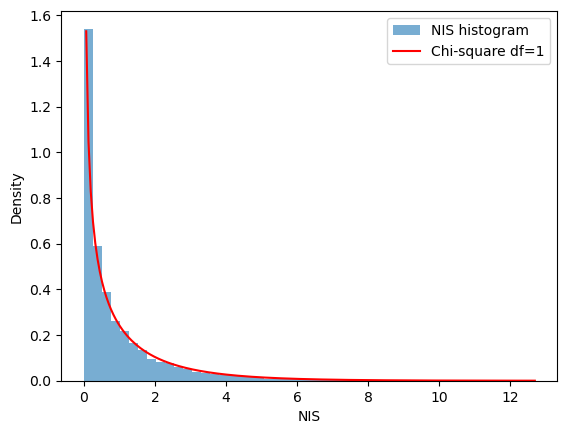

In [65]:
from scipy.stats import chi2
import matplotlib.pyplot as plt

plt.hist(NIS, bins=50, density=True, alpha=0.6, label="NIS histogram")
x = np.linspace(0, max(NIS), 200)
plt.plot(x, chi2.pdf(x, df=1), 'r-', label="Chi-square df=1")
plt.xlabel("NIS")
plt.ylabel("Density")
plt.legend()
plt.show()


# Conclusion:
The results indicate that the baseline linear Kalman Filter captures some signal but has limited predictive value (RMSE ≈ 0.48) and high uncertainty (Std innovation ≈ 154). Using Ridge or Lasso coefficients to inform the KF slightly improves performance (RMSE ≈ 0.43), but the most significant gain comes from the augmented KF using Lasso-selected features, which drastically reduces the RMSE to ≈ 0.064 while maintaining a mean NIS close to 1 (0.92), indicating statistical consistency. This demonstrates that incorporating relevant control inputs via feature selection substantially enhances filter accuracy. To further improve the model, one could explore interaction terms, polynomial expansions, or nonlinear transformations in the augmented KF, as the baseline linear formulation alone is insufficient to fully capture the underlying dynamics.